## Вводные по кейсу

### Описание кейса.

Анализируем данные быстрорастущего маркетплейса за 2024 год, который уже нашёл свою нишу, начал приносить прибыль. 
Команда хочет понять, как чувствует себя продукт: кто приходит, кто остаётся, кто платит, кто уходит. А ещё: на каких каналах держится рост, какие категории товаров приносят деньги, а какие висят мёртвым грузом.

### Дерево метрик через unit-подход:

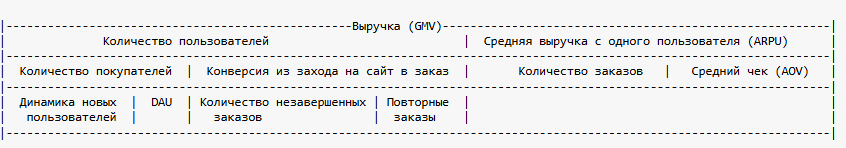


**Ключевые матрики:**  Revenue (profit), ARPU, AOV.

**Вспомогательные метрики:** ARPPU, MAU, DAU, CR в заказ.

**Барьерная метрика:**  Retention.

# Описание данных

### Таблица `Users`

| Поле              | Описание                                                                                       |
|-------------------|------------------------------------------------------------------------------------------------|
| `user_id`         | Уникальный идентификатор пользователя.                                                         |
| `registration_date`| Дата регистрации пользователя.                                                                |
| `os`              | Операционная система (Windows, macOS, iOS, Android).                                           |
| `age`             | Возраст.                                                                                       |
| `device`          | Тип устройства (`desktop`, `mobile`, `tablet`).                                                |
| `gender`          | Пол (`M`, `F`).                                                                                |
| `region`          | Регион (город).                                                                                |
| `browser`         | Браузер (Chrome, Firefox, Safari, Edge).                                                       |
| `country`         | Страна.                                                                                        |
| `acq_channel`     | Канал привлечения.                                                                             |
| `campaign_id`     | Идентификатор рекламной кампании (если применимо).                                             |
| `user_segment`    | Пользовательский сегмент (новичок, активный, VIP, спящий).                                     |
| `buyer_segment`   | Сегмент покупателя.                                                                            |
| `cohort_week`     | Неделя когорты.                                                                                |	
| `cohort_month`    | Месяц когорты.                                                                                 |

---

### Таблица `Orders`

| Поле           | Описание                                                                 |
|----------------|--------------------------------------------------------------------------|
| `order_id`     | Уникальный идентификатор заказа.                                         |
| `user_id`      | Идентификатор пользователя, который сделал заказ (внешний ключ на Users).|
| `order_date`   | Дата и время оформления заказа.                                          |
| `product_name`| Наименование товара.                                                     |
| `quantity`     | Количество единиц товара в заказе.                                       |
| `unit_price`   | Цена за одну единицу товара на момент заказа.                            |
| `total_price`  | Общая стоимость позиции в заказе (`quantity × unit_price`).              |
| `category_name`|	Наименование категории товара.                                          |
| `order_week`   |  Неделя заказа.                                                          |	
| `order_month`  |  Месяц заказа.                                                           |

---

### Таблица `Campaign costs`

| Поле          | Описание                                                  |
|---------------|-----------------------------------------------------------|
| `Unnamed: 0`  | Дублироние индекса строки.                                |
| `acq_channel` | Канал привлечения.                                        |
| `spend_month` | Месяц привлечения.                                        |
| `budget`      | Расходы (бюджет) на привлечение.                          |

---

### Таблица `Events`

| Поле         | Описание                                                                                      |
|--------------|-----------------------------------------------------------------------------------------------|
| `event_id`   | Уникальный идентификатор события.                                                             |
| `session_id` | Идентификатор сессии пользователя, во время которой произошло событие.                        |
| `user_id`    | Уникальный идентификатор пользователя.                                                        |
| `event_date` | Время и дата события.                                                                         |
| `event_type` | Тип события (например, вход пользователя, просмотр страницы, просмотр товара, добавление в корзину). |
| `os`         | Операционная система (Windows, macOS, iOS, Android).                                          |
| `device`     | Тип устройства (`desktop`, `mobile`, `tablet`).                                               |
| `event_index`| Порядковый номер события в сессии.                                                            |
| `user_segment`| Пользовательский сегмент (новичок, активный, VIP, спящий).                                   |
| `product_name`| Наименование товара.                                                                         |
| `event_week`  |  Неделя события.                                                                             |	
| `event_month` |  Месяц события.                                                                              |

---

### Таблица `Sessions`

| Поле           | Описание                                                                                      |
|----------------|-----------------------------------------------------------------------------------------------|
| `session_id`   | Уникальный идентификатор сессии пользователя.                                                 |
| `user_id`      | Уникальный идентификатор пользователя.                                                        |
| `session_start`| Дата и время начала сессии.                                                                   |
| `os`           | Операционная система (например, macOS).                                                       |
| `device`       | Тип устройства (например, desktop).                                                           |
| `region`       | Регион или город (например, Москва).                                                          |
| `browser`      | Браузер пользователя (например, Firefox).                                                     |
| `country`      | Страна пользователя (например, Россия).                                                       |
| `entry_path`   | Страница входа в сессию (например, /product, /promo).                                         |
| `path_start`   | Первая страница или путь кампании (например, /campaign/5).                                    |
| `utm_source`   | Источник трафика из UTM-меток (например, direct).                                             |
| `screen_size`  | Разрешение экрана (например, 1920×1080).                                                      |
| `scroll_depth` | Глубина прокрутки страницы в процентах (например, 96).                                        |
| `user_segment` | Сегмент пользователя (например, regular).                                                     |
| `session_week` |  Неделя сессии.                                                                               |	
| `session_month`|  Месяц сессии.                                                                                |


### Описание событий

| Событие             | Описание                                                                                  |
|---------------------|-------------------------------------------------------------------------------------------|
| `page_view`         | Открытие любой страницы сайта или приложения пользователем.                                |
| `product_view`      | Просмотр страницы конкретного товара.                                                     |
| `product_click`     | Клик по товару (например, из списка товаров или на баннере).                              |
| `add_to_cart`       | Добавление товара в корзину.                                                              |
| `remove_from_cart`  | Удаление товара из корзины.                                                               |
| `search`            | Выполнение поиска по сайту или приложению.                                                |
| `filter_apply`      | Применение фильтра (например, по цене, бренду, категории).                                |
| `checkout_start`    | Начало оформления заказа (переход к оформлению корзины).                                  |
| `checkout_complete` | Завершение оформления заказа (не гарантирует покупку, покупка зависит от факта оплаты).                                          |
| `user_login`        | Вход пользователя в личный кабинет или аккаунт.                                           |
| `user_logout`       | Выход пользователя из аккаунта.                                                           |
| `wishlist_add`      | Добавление товара в список желаемого (wishlist).                                          |
| `category_view`     | Просмотр страницы категории товаров.                                                      |
| `banner_click`      | Клик по рекламному баннеру на сайте или в приложении.                                     |
| `promo_view`        | Просмотр промо-акции или специального предложения.                                        |


# План проекта
1. Загрузка данных и их предобработка
2. Обзор ключевых метрик
3. Оценка метрик монетизации и юнит-экономики
4. Выводы по этапу 2 и 3
5. Подготовка эксперимента и подведение его результатов
6. Выводы по этапу 5

# Блок кода и расчета метрик

Загрузим данные из датасетов и получим основную информацию о них. Проведем предобработку.

In [1]:
!pip install matplotlib-venn -q

In [2]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from datetime import datetime
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

pd.set_option("mode.chained_assignment", None)

In [3]:
def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    before_size = df.memory_usage().sum() / 1024**2    
    for column in df.columns:
        column_type = df[column].dtypes
        if column_type in numerics:
            column_min = df[column].min()
            column_max = df[column].max()
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)
                elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)  
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)    
    after_size = df.memory_usage().sum() / 1024**2
    if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                         .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
    return df

In [4]:
def check_duplicates(dfs):
    for name, df in dfs.items():
        n_dupes = df.duplicated().sum()
        nan_count = df.isna().sum().sum()
        print(f"В {name} содержится {n_dupes} дубликатов")
        print(f"В {name} содержится {nan_count} NAN")
        print('-'*25)

In [5]:
def unique_values_info(column):
    print(f"Столбец: {column.name}")
    print(column.unique())
    print(f"Количество уникальных значений: {column.nunique()}")
    print('---'*30)

In [7]:
display(pa_diploma_campaign_costs.head())
display(pa_diploma_campaign_costs.info())

Unnamed: 0 acq_channel spend_month       budget
0           0   Affiliate  2024-01-01  179343.3875
1           1   Affiliate  2024-02-01  175488.4875
2           2   Affiliate  2024-03-01  164543.4750
3           3   Affiliate  2024-04-01  186869.9750
4           4   Affiliate  2024-05-01  166443.7750

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   88 non-null     int64         
 1   acq_channel  88 non-null     object        
 2   spend_month  88 non-null     datetime64[ns]
 3   budget       88 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.9+ KB


None

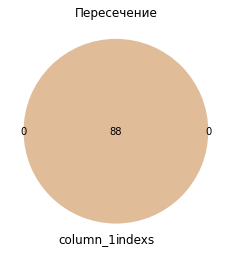

In [8]:
column_1 = set(pa_diploma_campaign_costs['Unnamed: 0'].unique())
indexs = set(pa_diploma_campaign_costs.index.dropna().unique())

# Строим диаграмму Венна для проверки пересечения пользователей
venn2([column_1, indexs], set_labels=('column_1', 'indexs'))

plt.title("Пересечение")
plt.show()

In [9]:
pa_diploma_campaign_costs = pa_diploma_campaign_costs.drop(columns=['Unnamed: 0'])

In [10]:
display(pa_diploma_orders.head())
display(pa_diploma_orders.info())

order_id  user_id          order_date       product_name  quantity  \
0         1        3 2024-01-19 01:52:52         Шуруповерт         2   
1         2        3 2024-01-19 01:52:52  Молоток слесарный         1   
2         3        3 2024-01-19 01:52:52    Секатор садовый         2   
3         4        3 2024-01-25 13:59:38         Шуруповерт         2   
4         5        3 2024-01-25 13:59:38         Чай черный         1   

   unit_price  total_price                    category_name order_week  \
0     5539.13     11078.26  Инструменты и садовый инвентарь 2024-01-15   
1    11340.38     11340.38  Инструменты и садовый инвентарь 2024-01-15   
2    10892.09     21784.18  Инструменты и садовый инвентарь 2024-01-15   
3     5539.13     11078.26  Инструменты и садовый инвентарь 2024-01-22   
4     2099.59      2099.59                 Продукты питания 2024-01-22   

  order_month  
0  2024-01-01  
1  2024-01-01  
2  2024-01-01  
3  2024-01-01  
4  2024-01-01

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31357 entries, 0 to 31356
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       31357 non-null  int64         
 1   user_id        31357 non-null  int64         
 2   order_date     31357 non-null  datetime64[ns]
 3   product_name   31357 non-null  object        
 4   quantity       31357 non-null  int64         
 5   unit_price     31357 non-null  float64       
 6   total_price    31357 non-null  float64       
 7   category_name  31357 non-null  object        
 8   order_week     31357 non-null  datetime64[ns]
 9   order_month    31357 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 2.4+ MB


None

In [11]:
display(pa_diploma_sessions.head())
display(pa_diploma_sessions.info())

session_id  user_id       session_start       os  device  region browser  \
0         705      160 2024-01-12 02:30:37  Windows  mobile  Москва  Safari   
1         706      160 2024-01-10 06:04:41  Windows  mobile  Москва  Safari   
2         707      160 2024-01-23 03:31:16  Windows  mobile  Москва  Safari   
3         708      160 2024-01-18 13:43:45  Windows  mobile  Москва  Safari   
4         709      160 2024-01-21 01:09:58  Windows  mobile  Москва  Safari   

  country entry_path     path_start utm_source screen_size  scroll_depth  \
0  Россия      /home  /recommend/10    unknown    768x1024            51   
1  Россия      /home        /sale/2    unknown     375x667            71   
2  Россия  /checkout      /click/20    unknown    768x1024            84   
3  Россия  /category   /campaign/20    unknown    768x1024            20   
4  Россия     /promo        /sale/3    unknown    1366x768            88   

  user_segment  utm_campaign_id session_week session_month  
0      regular               14   2024-01-08    2024-01-01  
1      regular               14   2024-01-08    2024-01-01  
2      regular               14   2024-01-22    2024-01-01  
3      regular               14   2024-01-15    2024-01-01  
4      regular               14   2024-01-15    2024-01-01

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119535 entries, 0 to 119534
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   session_id       119535 non-null  int64         
 1   user_id          119535 non-null  int64         
 2   session_start    119535 non-null  datetime64[ns]
 3   os               119535 non-null  object        
 4   device           119535 non-null  object        
 5   region           119535 non-null  object        
 6   browser          119535 non-null  object        
 7   country          119535 non-null  object        
 8   entry_path       119535 non-null  object        
 9   path_start       119535 non-null  object        
 10  utm_source       119535 non-null  object        
 11  screen_size      119535 non-null  object        
 12  scroll_depth     119535 non-null  int64         
 13  user_segment     119535 non-null  object        
 14  utm_campaign_id  119

None

In [12]:
display(pa_diploma_users.head())
display(pa_diploma_users.info())

user_id   registration_date       os  age   device gender           region  \
0        1 2024-01-01 00:47:00    macOS   35  desktop      M           Москва   
1        2 2024-01-01 19:01:00      iOS   53  desktop      M           Москва   
2        3 2024-01-01 04:13:00  Android   66   mobile      F  Санкт-Петербург   
3        4 2024-01-01 17:18:00  Windows   58  desktop      M        Краснодар   
4        5 2024-01-01 08:29:00  Android   58  desktop      F   Другие регионы   

   browser country      acq_channel  campaign_id user_segment buyer_segment  \
0  Firefox  Россия       Google Ads           33       спящий       regular   
1     Edge  Россия  Email Marketing           18       спящий          rare   
2   Chrome  Россия       Google Ads            6          VIP       regular   
3  Firefox  Россия        Affiliate           25      новичок      one_time   
4     Edge  Россия       Google Ads           18      новичок       regular   

  cohort_week cohort_month  
0  2024-01-01   2024-01-01  
1  2024-01-01   2024-01-01  
2  2024-01-01   2024-01-01  
3  2024-01-01   2024-01-01  
4  2024-01-01   2024-01-01

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44151 entries, 0 to 44150
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            44151 non-null  int64         
 1   registration_date  44151 non-null  datetime64[ns]
 2   os                 44151 non-null  object        
 3   age                44151 non-null  int64         
 4   device             44151 non-null  object        
 5   gender             44151 non-null  object        
 6   region             44151 non-null  object        
 7   browser            44151 non-null  object        
 8   country            44151 non-null  object        
 9   acq_channel        44151 non-null  object        
 10  campaign_id        44151 non-null  int64         
 11  user_segment       44151 non-null  object        
 12  buyer_segment      44151 non-null  object        
 13  cohort_week        44151 non-null  datetime64[ns]
 14  cohort

None

In [13]:
display(pa_diploma_events.head())
display(pa_diploma_events.info())

event_id  session_id  user_id          event_date      event_type   os  \
0      3132         479      100 2024-01-01 15:23:56       page_view  iOS   
1      3133         479      100 2024-01-01 15:24:01    product_view  iOS   
2      3134         479      100 2024-01-01 15:24:10   product_click  iOS   
3      3135         479      100 2024-01-01 15:25:10     add_to_cart  iOS   
4      3136         479      100 2024-01-01 15:25:46  checkout_start  iOS   

   device  event_index user_segment          product_name event_week  \
0  mobile            1      regular                   NaN 2024-01-01   
1  mobile            2      regular  Шорты для тренировок 2024-01-01   
2  mobile            3      regular        Куртка детская 2024-01-01   
3  mobile            4      regular  Балетки классические 2024-01-01   
4  mobile            5      regular                   NaN 2024-01-01   

  event_month  
0  2024-01-01  
1  2024-01-01  
2  2024-01-01  
3  2024-01-01  
4  2024-01-01

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785859 entries, 0 to 785858
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_id      785859 non-null  int64         
 1   session_id    785859 non-null  int64         
 2   user_id       785859 non-null  int64         
 3   event_date    785859 non-null  datetime64[ns]
 4   event_type    785859 non-null  object        
 5   os            785859 non-null  object        
 6   device        785859 non-null  object        
 7   event_index   785859 non-null  int64         
 8   user_segment  785859 non-null  object        
 9   product_name  385740 non-null  object        
 10  event_week    785859 non-null  datetime64[ns]
 11  event_month   785859 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(4), object(5)
memory usage: 71.9+ MB


None

In [14]:
dfs = {'pa_diploma_campaign_costs': pa_diploma_campaign_costs,
      'pa_diploma_orders': pa_diploma_orders,
      'pa_diploma_sessions': pa_diploma_sessions,
      'pa_diploma_users': pa_diploma_users,
      'pa_diploma_events': pa_diploma_events}

check_duplicates(dfs)

В pa_diploma_campaign_costs содержится 0 дубликатов
В pa_diploma_campaign_costs содержится 0 NAN
-------------------------
В pa_diploma_orders содержится 0 дубликатов
В pa_diploma_orders содержится 0 NAN
-------------------------
В pa_diploma_sessions содержится 0 дубликатов
В pa_diploma_sessions содержится 0 NAN
-------------------------
В pa_diploma_users содержится 0 дубликатов
В pa_diploma_users содержится 0 NAN
-------------------------
В pa_diploma_events содержится 0 дубликатов
В pa_diploma_events содержится 400119 NAN
-------------------------


In [15]:
count_duplicates = pa_diploma_orders[['user_id', 'order_date','product_name','total_price']].duplicated().sum() 
count_original_data_rows = pa_diploma_orders[['user_id', 'order_date','product_name','total_price']].shape[0]
print(f'Количество неявных дубликатов: {count_duplicates}')

Количество неявных дубликатов: 270


In [16]:
pa_diploma_orders = pa_diploma_orders.drop_duplicates(subset=['user_id', 'order_date', 'product_name', 'total_price'])

count_duplicates = pa_diploma_orders[['user_id', 'order_date','product_name','total_price']].duplicated().sum() 
count_original_data_rows = pa_diploma_orders[['user_id', 'order_date','product_name','total_price']].shape[0]
print(f'Количество неявных дубликатов: {count_duplicates}')

Количество неявных дубликатов: 0


In [17]:
pa_diploma_events[pa_diploma_events['product_name'].isna()].head()

event_id  session_id  user_id          event_date         event_type   os  \
0       3132         479      100 2024-01-01 15:23:56          page_view  iOS   
4       3136         479      100 2024-01-01 15:25:46     checkout_start  iOS   
5       1239         187       33 2024-01-01 15:50:27          page_view  iOS   
9       1243         187       33 2024-01-01 15:52:23     checkout_start  iOS   
10      1244         187       33 2024-01-01 15:52:52  checkout_complete  iOS   

     device  event_index user_segment product_name event_week event_month  
0    mobile            1      regular          NaN 2024-01-01  2024-01-01  
4    mobile            5      regular          NaN 2024-01-01  2024-01-01  
5   desktop            1         rare          NaN 2024-01-01  2024-01-01  
9   desktop            5         rare          NaN 2024-01-01  2024-01-01  
10  desktop            6         rare          NaN 2024-01-01  2024-01-01

In [18]:
unique_values_info(pa_diploma_campaign_costs['acq_channel'])

Столбец: acq_channel
['Affiliate' 'Direct' 'Email Marketing' 'Facebook/Instagram' 'Google Ads'
 'SEO' 'TikTok']
Количество уникальных значений: 7
------------------------------------------------------------------------------------------


In [19]:
unique_values_info(pa_diploma_orders['category_name'])

Столбец: category_name
['Инструменты и садовый инвентарь' 'Продукты питания' 'Женская одежда'
 'Аксессуары для гаджетов' 'Одежда для спорта' 'Декор и освещение'
 'Детская одежда' 'Детские игрушки' 'Книги и канцтовары'
 'Медицинские товары' 'Косметика и парфюмерия' 'Товары для туризма'
 'Сумки и аксессуары' 'Автотовары' 'Обувь мужская' 'Обувь женская'
 'Мужская одежда' 'Бытовая техника' 'Зоотовары' 'Товары для кухни'
 'Средства для ухода' 'Мебель для дома' 'Спортивный инвентарь'
 'Товары для новорожденных' 'Украшения и часы']
Количество уникальных значений: 25
------------------------------------------------------------------------------------------


In [20]:
unique_values_info(pa_diploma_sessions['os'])
unique_values_info(pa_diploma_sessions['device'])
unique_values_info(pa_diploma_sessions['region'])
unique_values_info(pa_diploma_sessions['browser'])
unique_values_info(pa_diploma_sessions['country'])
unique_values_info(pa_diploma_sessions['user_segment'])

Столбец: os
['Windows' 'macOS' 'Android' 'iOS']
Количество уникальных значений: 4
------------------------------------------------------------------------------------------
Столбец: device
['mobile' 'tablet' 'desktop']
Количество уникальных значений: 3
------------------------------------------------------------------------------------------
Столбец: region
['Москва' 'Московская область' 'Другие регионы' 'Краснодар' 'Новосибирск'
 'Санкт-Петербург' 'Нижний Новгород' 'Екатеринбург' 'Ростов-на-Дону']
Количество уникальных значений: 9
------------------------------------------------------------------------------------------
Столбец: browser
['Safari' 'Firefox' 'Chrome' 'Edge']
Количество уникальных значений: 4
------------------------------------------------------------------------------------------
Столбец: country
['Россия']
Количество уникальных значений: 1
------------------------------------------------------------------------------------------
Столбец: user_segment
['regular' 'rare'

In [21]:
segments = pa_diploma_sessions.groupby('user_segment')['user_id'].nunique().reset_index()

segments

user_segment  user_id
0       medium     9200
1     one_time     1313
2         rare     5653
3      regular     5415

In [22]:
unique_values_info(pa_diploma_users['os'])
unique_values_info(pa_diploma_users['device'])
unique_values_info(pa_diploma_users['gender'])
unique_values_info(pa_diploma_users['region'])
unique_values_info(pa_diploma_users['browser'])
unique_values_info(pa_diploma_users['country'])
unique_values_info(pa_diploma_users['acq_channel'])
unique_values_info(pa_diploma_users['user_segment'])

Столбец: os
['macOS' 'iOS' 'Android' 'Windows']
Количество уникальных значений: 4
------------------------------------------------------------------------------------------
Столбец: device
['desktop' 'mobile' 'tablet']
Количество уникальных значений: 3
------------------------------------------------------------------------------------------
Столбец: gender
['M' 'F']
Количество уникальных значений: 2
------------------------------------------------------------------------------------------
Столбец: region
['Москва' 'Санкт-Петербург' 'Краснодар' 'Другие регионы' 'Нижний Новгород'
 'Екатеринбург' 'Московская область' 'Новосибирск' 'Ростов-на-Дону']
Количество уникальных значений: 9
------------------------------------------------------------------------------------------
Столбец: browser
['Firefox' 'Edge' 'Chrome' 'Safari']
Количество уникальных значений: 4
------------------------------------------------------------------------------------------
Столбец: country
['Россия']
Количество ун

In [23]:
segments = pa_diploma_users.groupby('user_segment')['user_id'].nunique().reset_index()

segments

user_segment  user_id
0          VIP    11040
1     активный    11148
2      новичок    11070
3       спящий    10893

In [24]:
unique_values_info(pa_diploma_events['event_type'])
unique_values_info(pa_diploma_events['os'])
unique_values_info(pa_diploma_events['device'])
unique_values_info(pa_diploma_events['user_segment'])

Столбец: event_type
['page_view' 'product_view' 'product_click' 'add_to_cart' 'checkout_start'
 'checkout_complete' 'user_logout' 'search' 'category_view' 'filter_apply'
 'promo_view' 'wishlist_add' 'user_login' 'banner_click'
 'remove_from_cart']
Количество уникальных значений: 15
------------------------------------------------------------------------------------------
Столбец: os
['iOS' 'Windows' 'macOS' 'Android']
Количество уникальных значений: 4
------------------------------------------------------------------------------------------
Столбец: device
['mobile' 'desktop' 'tablet']
Количество уникальных значений: 3
------------------------------------------------------------------------------------------
Столбец: user_segment
['regular' 'rare' 'medium' 'one_time']
Количество уникальных значений: 4
------------------------------------------------------------------------------------------


In [25]:
segments = pa_diploma_events.groupby('user_segment')['user_id'].nunique().reset_index()

segments

user_segment  user_id
0       medium     9609
1     one_time     1330
2         rare     5735
3      regular     5464

In [26]:
summary = pa_diploma_campaign_costs['budget'].agg(['min','max','mean'])
summary = summary.map('{:,.2f}'.format)
summary


min         6,674.10
max     1,533,683.38
mean      219,626.91
Name: budget, dtype: object

In [27]:
pa_diploma_campaign_costs[pa_diploma_campaign_costs['budget'] == pa_diploma_campaign_costs['budget'].max()]

acq_channel spend_month       budget
81      TikTok  2024-12-01  1533683.375

In [28]:
pd.set_option('display.float_format', '{:,.2f}'.format)
tik_tok = pa_diploma_campaign_costs[pa_diploma_campaign_costs['acq_channel'] == 'TikTok']
tik_tok

acq_channel spend_month       budget
70      TikTok  2024-01-01   170,131.14
71      TikTok  2024-02-01   155,786.24
72      TikTok  2024-03-01   171,643.86
73      TikTok  2024-04-01   151,009.36
74      TikTok  2024-05-01   207,239.02
75      TikTok  2024-06-01   313,311.47
76      TikTok  2024-07-01   709,542.44
77      TikTok  2024-08-01   966,783.50
78      TikTok  2024-09-01 1,179,445.38
79      TikTok  2024-10-01 1,389,180.75
80      TikTok  2024-11-01 1,454,911.00
81      TikTok  2024-12-01 1,533,683.38
87      TikTok  2025-01-01 1,292,708.62

In [29]:
print(pa_diploma_orders['unit_price'].agg(['min','max', 'mean']))

min       339.00
max    63,932.38
mean    6,992.37
Name: unit_price, dtype: float64


In [30]:
pa_diploma_orders[pa_diploma_orders['unit_price'] == pa_diploma_orders['unit_price'].max()]

order_id  user_id          order_date   product_name  quantity  \
118         119      100 2024-01-17 08:10:57  Диван угловой         3   
127         128      100 2024-02-24 01:25:44  Диван угловой         1   
605         606      451 2024-01-25 10:10:17  Диван угловой         3   
688         689      533 2024-01-31 16:46:18  Диван угловой         2   
907         908      855 2024-02-24 07:46:37  Диван угловой         1   
...         ...      ...                 ...            ...       ...   
29963     30106    37227 2024-12-16 16:31:45  Диван угловой         2   
30423     30601    38899 2024-11-28 01:10:04  Диван угловой         2   
30480     30663    39141 2024-12-31 10:20:52  Диван угловой         3   
30604     30795    39738 2024-12-24 06:03:52  Диван угловой         3   
30741     30968    40399 2024-12-15 00:10:20  Диван угловой         1   

       unit_price  total_price    category_name order_week order_month  
118     63,932.38   191,797.14  Мебель для дома 2024-01-15  2024-01-01  
127     63,932.38    63,932.38  Мебель для дома 2024-02-19  2024-02-01  
605     63,932.38   191,797.14  Мебель для дома 2024-01-22  2024-01-01  
688     63,932.38   127,864.76  Мебель для дома 2024-01-29  2024-01-01  
907     63,932.38    63,932.38  Мебель для дома 2024-02-19  2024-02-01  
...           ...          ...              ...        ...         ...  
29963   63,932.38   127,864.76  Мебель для дома 2024-12-16  2024-12-01  
30423   63,932.38   127,864.76  Мебель для дома 2024-11-25  2024-11-01  
30480   63,932.38   191,797.14  Мебель для дома 2024-12-30  2024-12-01  
30604   63,932.38   191,797.14  Мебель для дома 2024-12-23  2024-12-01  
30741   63,932.38    63,932.38  Мебель для дома 2024-12-09  2024-12-01  

[117 rows x 10 columns]

In [31]:
print(pa_diploma_campaign_costs['spend_month'].agg(['min','max']))

min   2024-01-01
max   2025-01-01
Name: spend_month, dtype: datetime64[ns]


In [32]:
pa_diploma_campaign_costs[pa_diploma_campaign_costs['spend_month']=='2025-01-01']

acq_channel spend_month       budget
82           Affiliate  2025-01-01   114,323.68
83              Direct  2025-01-01     6,882.22
84     Email Marketing  2025-01-01    26,617.49
85  Facebook/Instagram  2025-01-01    84,167.21
86                 SEO  2025-01-01    40,257.70
87              TikTok  2025-01-01 1,292,708.62

In [33]:
# Удалим лишние данные, т.к. анализ проводится только за 2024 год
pa_diploma_campaign_costs = pa_diploma_campaign_costs[pa_diploma_campaign_costs['spend_month']<'2025-01-01']

In [34]:
print(pa_diploma_orders['order_date'].agg(['min','max']))

min   2024-01-01 08:03:45
max   2024-12-31 23:00:53
Name: order_date, dtype: datetime64[ns]


In [35]:
print(pa_diploma_sessions['session_start'].agg(['min','max']))

min   2024-01-01 08:34:27
max   2024-12-31 23:49:43
Name: session_start, dtype: datetime64[ns]


In [36]:
print(pa_diploma_users['registration_date'].agg(['min','max']))

min   2024-01-01 00:07:00
max   2024-12-31 23:44:00
Name: registration_date, dtype: datetime64[ns]


In [37]:
print(pa_diploma_events['event_date'].agg(['min','max']))

min   2024-01-01 15:23:56
max   2024-12-31 23:54:44
Name: event_date, dtype: datetime64[ns]


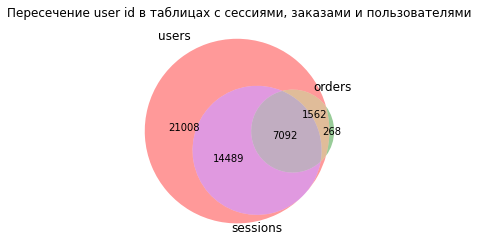

In [38]:
users = set(pa_diploma_users['user_id'].dropna().unique())
orders = set(pa_diploma_orders['user_id'].dropna().unique())
sessions = set(pa_diploma_sessions['user_id'].dropna().unique())

# Строим диаграмму Венна для проверки пересечения пользователей
venn3([users, orders, sessions], set_labels=('users', 'orders', 'sessions'))

plt.title("Пересечение user id в таблицах с сессиями, заказами и пользователями")
plt.show()

In [39]:
# Удалим данные, о которых нет информации в таблице с пользователями

pa_diploma_orders = pa_diploma_orders[pa_diploma_orders['user_id'].isin(users)]

pa_diploma_orders['user_id'].nunique()

8654

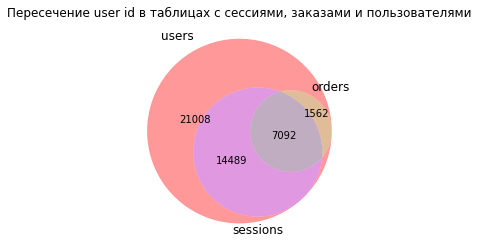

In [40]:
users = set(pa_diploma_users['user_id'].dropna().unique())
orders = set(pa_diploma_orders['user_id'].dropna().unique())
sessions = set(pa_diploma_sessions['user_id'].dropna().unique())

# Строим диаграмму Венна для проверки пересечения пользователей
venn3([users, orders, sessions], set_labels=('users', 'orders', 'sessions'))

plt.title("Пересечение user id в таблицах с сессиями, заказами и пользователями")
plt.show()

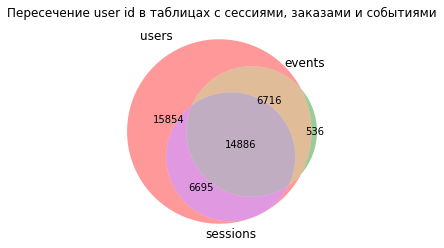

In [41]:
users = set(pa_diploma_users['user_id'].dropna().unique())
events = set(pa_diploma_events['user_id'].dropna().unique())
sessions = set(pa_diploma_sessions['user_id'].dropna().unique())

# Строим диаграмму Венна для проверки пересечения пользователей
venn3([users, events, sessions], set_labels=('users', 'events', 'sessions'))

plt.title("Пересечение user id в таблицах с сессиями, заказами и событиями")
plt.show()

In [42]:
# Удалим данные, о которых нет информации в таблице с пользователями

pa_diploma_events = pa_diploma_events[pa_diploma_events['user_id'].isin(users)]

pa_diploma_events['user_id'].nunique()

21602

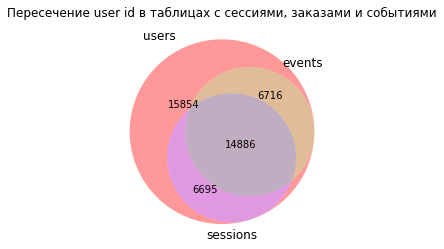

In [43]:
users = set(pa_diploma_users['user_id'].dropna().unique())
events = set(pa_diploma_events['user_id'].dropna().unique())
sessions = set(pa_diploma_sessions['user_id'].dropna().unique())

# Строим диаграмму Венна для проверки пересечения пользователей
venn3([users, events, sessions], set_labels=('users', 'events', 'sessions'))

plt.title("Пересечение user id в таблицах с сессиями, заказами и событиями")
plt.show()

In [44]:
pa_diploma_events.head()

event_id  session_id  user_id          event_date      event_type   os  \
0      3132         479      100 2024-01-01 15:23:56       page_view  iOS   
1      3133         479      100 2024-01-01 15:24:01    product_view  iOS   
2      3134         479      100 2024-01-01 15:24:10   product_click  iOS   
3      3135         479      100 2024-01-01 15:25:10     add_to_cart  iOS   
4      3136         479      100 2024-01-01 15:25:46  checkout_start  iOS   

   device  event_index user_segment          product_name event_week  \
0  mobile            1      regular                   NaN 2024-01-01   
1  mobile            2      regular  Шорты для тренировок 2024-01-01   
2  mobile            3      regular        Куртка детская 2024-01-01   
3  mobile            4      regular  Балетки классические 2024-01-01   
4  mobile            5      regular                   NaN 2024-01-01   

  event_month  
0  2024-01-01  
1  2024-01-01  
2  2024-01-01  
3  2024-01-01  
4  2024-01-01

In [45]:
unique_pairs = pa_diploma_events.groupby('event_type')['event_index'].unique().reset_index()

unique_pairs

event_type                                   event_index
0         add_to_cart                                           [4]
1        banner_click      [5, 8, 7, 4, 9, 6, 3, 10, 2, 11, 12, 13]
2       category_view  [7, 5, 6, 4, 8, 3, 10, 9, 14, 11, 12, 2, 13]
3   checkout_complete                                           [6]
4      checkout_start                                           [5]
5        filter_apply      [4, 7, 5, 6, 8, 9, 12, 10, 3, 2, 11, 13]
6           page_view                                           [1]
7       product_click                                           [3]
8        product_view                                           [2]
9          promo_view      [7, 5, 8, 4, 9, 6, 11, 10, 3, 12, 2, 13]
10   remove_from_cart      [7, 4, 8, 9, 2, 6, 5, 3, 11, 10, 12, 13]
11             search      [8, 5, 6, 7, 4, 3, 9, 10, 11, 2, 12, 13]
12         user_login      [5, 6, 7, 3, 2, 4, 8, 13, 9, 10, 11, 12]
13        user_logout      [7, 5, 11, 6, 8, 4, 9, 3, 10, 2, 12, 13]
14       wishlist_add      [7, 6, 5, 4, 10, 8, 3, 9, 11, 2, 12, 13]

In [46]:
optimize_memory_usage(pa_diploma_campaign_costs)
optimize_memory_usage(pa_diploma_orders)
optimize_memory_usage(pa_diploma_sessions)
optimize_memory_usage(pa_diploma_users)
optimize_memory_usage(pa_diploma_events)

Размер использования памяти: до  0.00 Mb - после  0.00 Mb (12.5%)
Размер использования памяти: до  2.53 Mb - после  1.81 Mb (28.4%)
Размер использования памяти: до 15.50 Mb - после 13.00 Mb (16.2%)
Размер использования памяти: до  5.05 Mb - после  4.29 Mb (15.0%)
Размер использования памяти: до 74.48 Mb - после 60.87 Mb (18.3%)


event_id  session_id  user_id          event_date         event_type  \
0           3132         479      100 2024-01-01 15:23:56          page_view   
1           3133         479      100 2024-01-01 15:24:01       product_view   
2           3134         479      100 2024-01-01 15:24:10      product_click   
3           3135         479      100 2024-01-01 15:25:10        add_to_cart   
4           3136         479      100 2024-01-01 15:25:46     checkout_start   
...          ...         ...      ...                 ...                ...   
785854    838155      134817    44749 2024-12-31 23:53:01  checkout_complete   
785855    838156      134817    44749 2024-12-31 23:53:07       filter_apply   
785856    838157      134817    44749 2024-12-31 23:53:13       wishlist_add   
785857    807643      129386    41393 2024-12-31 23:54:38          page_view   
785858    807644      129386    41393 2024-12-31 23:54:44       product_view   

             os  device  event_index user_segment          product_name  \
0           iOS  mobile            1      regular                   NaN   
1           iOS  mobile            2      regular  Шорты для тренировок   
2           iOS  mobile            3      regular        Куртка детская   
3           iOS  mobile            4      regular  Балетки классические   
4           iOS  mobile            5      regular                   NaN   
...         ...     ...          ...          ...                   ...   
785854  Android  mobile            6      regular                   NaN   
785855  Android  mobile            7      regular                   NaN   
785856  Android  mobile            8      regular   Лоферы лакированные   
785857  Windows  tablet            1         rare                   NaN   
785858  Windows  tablet            2         rare        Лак для ногтей   

       event_week event_month  
0      2024-01-01  2024-01-01  
1      2024-01-01  2024-01-01  
2      2024-01-01  2024-01-01  
3      2024-01-01  2024-01-01  
4      2024-01-01  2024-01-01  
...           ...         ...  
785854 2024-12-30  2024-12-01  
785855 2024-12-30  2024-12-01  
785856 2024-12-30  2024-12-01  
785857 2024-12-30  2024-12-01  
785858 2024-12-30  2024-12-01  

[750926 rows x 12 columns]

Мы загрузили данные в датасеты  и провели следующую предобработку:
 - провели оптимизацию используемой памяти;
 - преобразовали столбцы с датами в датасете к формату `datetime64[ns]`;
 - проверили датасет на наличие пропусков и явных дубликатов;
 - изучили временной период, за которых предоставленны данные;
 - изучили уникальные значения по некоторым столбцам;
 - изучили разброс данных (минимум, максимум и среднее) в расходах на рекламные компании и стоимость единицы товара;
 - проверили пересечение(совпадение) `user id` в датасетах, чтобы не было лишних данных.
 
 В результате получили 5 датасетов:
 
 1. `pa_diploma_users`: 44151 строк и 15 столбцов. В датасете отсутствуют явные дубликаты и пропуски, период дат совпадает с период, за который проводится анализ.
 2. `pa_diploma_orders`: 31357 строк и 10 столбцов. В датасете отсутствуют явные дубликаты и пропуски, период дат совпадает с период, за который проводится анализ. В датасете присутсоввало 270 неявных дубликатов, которые были удалены. В датасете присутствовала информация о заказах(небольшое количество строк - 268), которые по `user id` больше нигде не совпадают, поэтому данные строки были удалены.
 3. `pa_diploma_sessions`: 119535 строк и 17 столбцов. В датасете отсутствуют явные дубликаты и пропуски, период дат совпадает с период, за который проводится анализ. Указанный сегмент пользователя (`user_segment`) не совпадает с данными из датасета `pa_diploma_users`.
 4. `pa_diploma_events`: 785859 строк и 12 столбцов. В датасете отсутствуют явные дубликаты и пропуски, период дат совпадает с период, за который проводится анализ. В датасете присутствовала информация о событиях(небольшое количество строк - 536), которые по `user id` больше нигде не совпадают, поэтому данные строки были удалены. Указанный сегмент пользователя (`user_segment`) не совпадает с данными из датасета `pa_diploma_users`.
 5. `pa_diploma_campaign_costs`: 82 строки и 3 столбца. В датасете отсутствуют явные дубликаты и пропуски, период дат не совпадал с анализируемым периодом - присутствовали данные за январь 2025 года, которые были удалены. Также был дополнительный столбец, дублирующий индексы строк, который также был удален. 

### 2. Строим обзор ключевых метрик

Выполним верхнеуровневую оценку состояния продукта с помощью собранных витрин, без глубокой сегментации и оценки сложных метрик. 

Выручка бизнеса — 5% комиссии от стоимости любой продажи.

Посмотрим на общую динамику ключевых метрик: Revenue, ARPU, ARPPU, MAU, WAU, DAU, AOV, Retention, CR в заказ. 

In [47]:
pa_diploma_users['registration_day'] = pd.to_datetime(pa_diploma_users['registration_date']).dt.date

new_users = pa_diploma_users[pa_diploma_users['cohort_week']<'2024-12-30'].groupby('registration_day')['user_id'].nunique().reset_index(name='dau')

new_users['day'] = pd.to_datetime(new_users['registration_day'])
new_users['cohort_month'] = new_users['day'].dt.to_period('M').dt.to_timestamp()

dau_monthly_average = new_users.groupby('cohort_month')['dau'].mean().reset_index()

new_users.head()

registration_day  dau        day cohort_month
0       2024-01-01  100 2024-01-01   2024-01-01
1       2024-01-02   72 2024-01-02   2024-01-01
2       2024-01-03   97 2024-01-03   2024-01-01
3       2024-01-04  119 2024-01-04   2024-01-01
4       2024-01-05   86 2024-01-05   2024-01-01

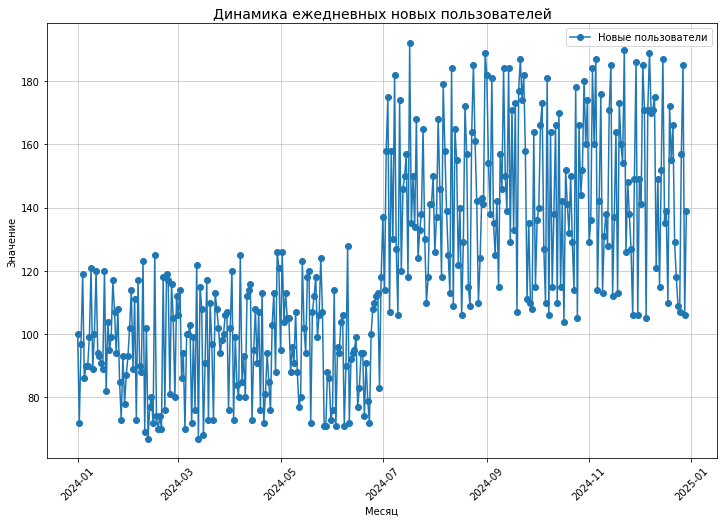

In [48]:
plt.figure(figsize=(12, 8))

plt.plot(new_users['day'], new_users['dau'], marker='o', label=f'Новые пользователи')

plt.title('Динамика ежедневных новых пользователей', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Значение')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

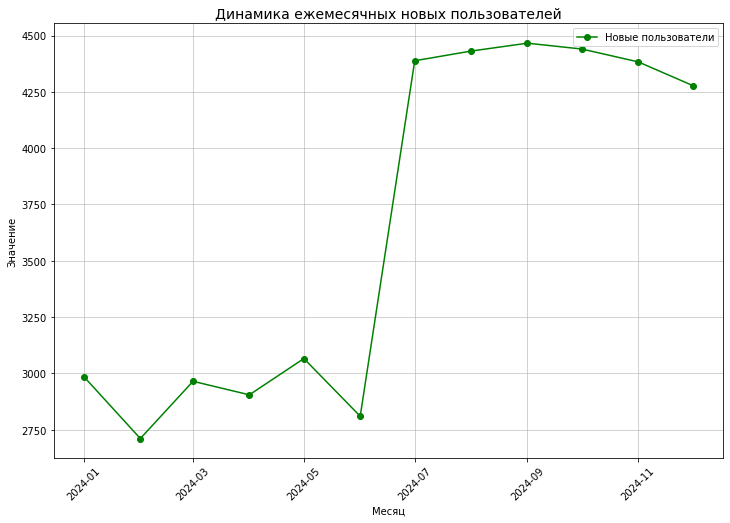

In [49]:
mau = pa_diploma_users[pa_diploma_users['cohort_week']<'2024-12-30'].groupby('cohort_month')['user_id'].nunique().reset_index(name='mau')


plt.figure(figsize=(12, 8))

plt.plot(mau['cohort_month'], mau['mau'], marker='o', label=f'Новые пользователи', color='green')

plt.title('Динамика ежемесячных новых пользователей', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Значение')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

In [50]:
pa_diploma_sessions.head()

session_id  user_id       session_start       os  device  region browser  \
0         705      160 2024-01-12 02:30:37  Windows  mobile  Москва  Safari   
1         706      160 2024-01-10 06:04:41  Windows  mobile  Москва  Safari   
2         707      160 2024-01-23 03:31:16  Windows  mobile  Москва  Safari   
3         708      160 2024-01-18 13:43:45  Windows  mobile  Москва  Safari   
4         709      160 2024-01-21 01:09:58  Windows  mobile  Москва  Safari   

  country entry_path     path_start utm_source screen_size  scroll_depth  \
0  Россия      /home  /recommend/10    unknown    768x1024            51   
1  Россия      /home        /sale/2    unknown     375x667            71   
2  Россия  /checkout      /click/20    unknown    768x1024            84   
3  Россия  /category   /campaign/20    unknown    768x1024            20   
4  Россия     /promo        /sale/3    unknown    1366x768            88   

  user_segment  utm_campaign_id session_week session_month  
0      regular               14   2024-01-08    2024-01-01  
1      regular               14   2024-01-08    2024-01-01  
2      regular               14   2024-01-22    2024-01-01  
3      regular               14   2024-01-15    2024-01-01  
4      regular               14   2024-01-15    2024-01-01

In [51]:
pa_diploma_sessions['session_start'] = pd.to_datetime(pa_diploma_sessions['session_start']).dt.date

dau = pa_diploma_sessions[pa_diploma_sessions['session_week']<'2024-12-30'].groupby('session_start')['user_id'].nunique().reset_index(name='dau')

dau['day'] = pd.to_datetime(dau['session_start'])
dau['cohort_month'] = dau['day'].dt.to_period('M').dt.to_timestamp()

dau_monthly_average = dau.groupby('cohort_month')['dau'].mean().reset_index()

dau.head()

session_start  dau        day cohort_month
0    2024-01-01    3 2024-01-01   2024-01-01
1    2024-01-02    9 2024-01-02   2024-01-01
2    2024-01-03   23 2024-01-03   2024-01-01
3    2024-01-04   26 2024-01-04   2024-01-01
4    2024-01-05   42 2024-01-05   2024-01-01

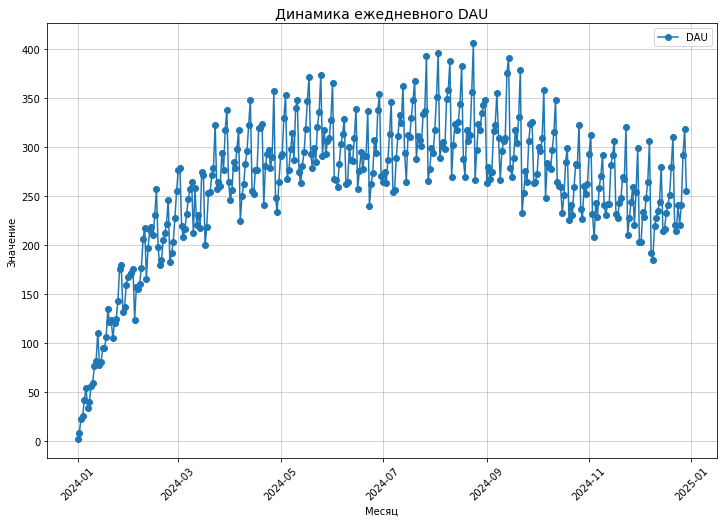

In [52]:
plt.figure(figsize=(12, 8))

plt.plot(dau['day'], dau['dau'], marker='o', label=f'DAU')

plt.title('Динамика ежедневного DAU', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Значение')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

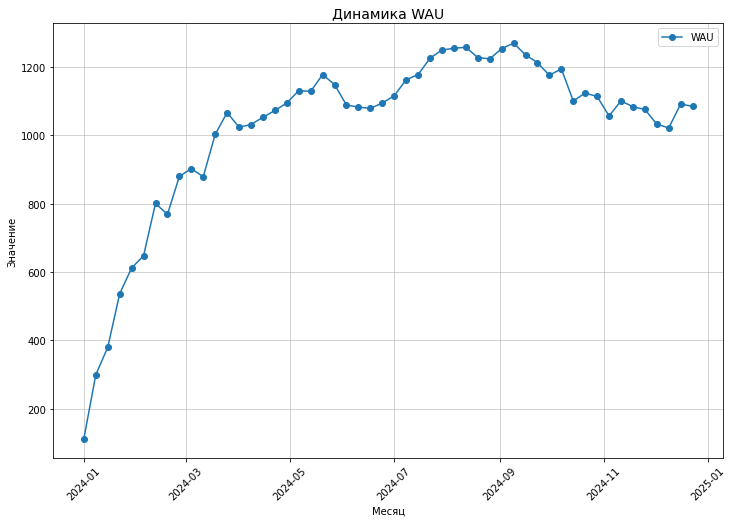

In [53]:
wau = pa_diploma_sessions[pa_diploma_sessions['session_week']<'2024-12-30'].groupby('session_week')['user_id'].nunique().reset_index(name='wau')

plt.figure(figsize=(12, 8))

plt.plot(wau['session_week'], wau['wau'], marker='o', label=f'WAU')

plt.title('Динамика WAU', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Значение')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

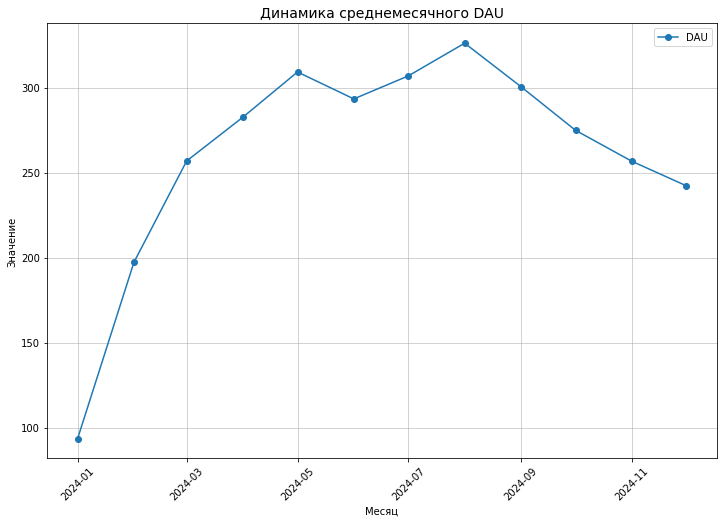

In [54]:
plt.figure(figsize=(12, 8))

plt.plot(dau_monthly_average['cohort_month'], dau_monthly_average['dau'], marker='o', label=f'DAU')

plt.title('Динамика среднемесячного DAU', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Значение')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

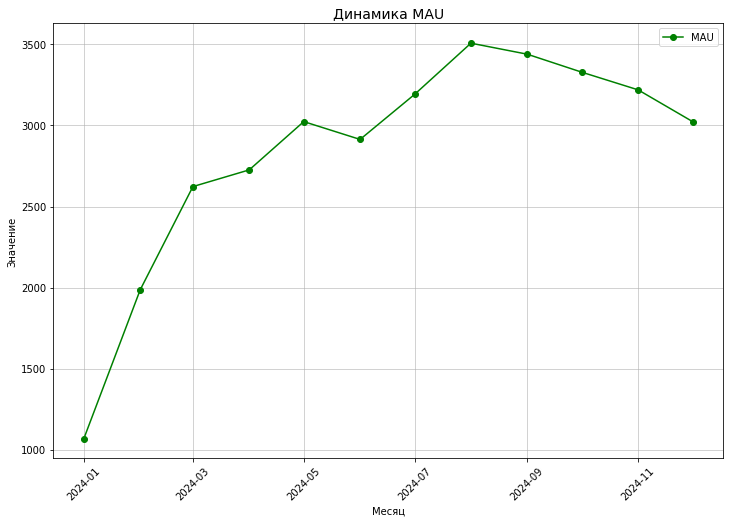

In [55]:
mau = pa_diploma_sessions[pa_diploma_sessions['session_week']<'2024-12-30'].groupby('session_month')['user_id'].nunique().reset_index(name='mau')
mau = mau.rename(columns={'session_month':'cohort_month'})

plt.figure(figsize=(12, 8))

plt.plot(mau['cohort_month'], mau['mau'], marker='o', label=f'MAU', color='green')

plt.title('Динамика MAU', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Значение')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

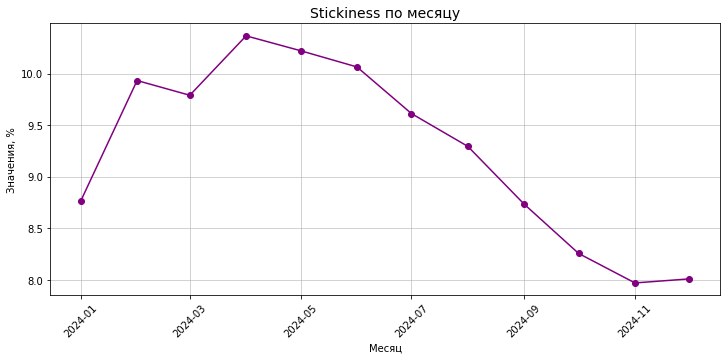

In [56]:
stickiness_table = mau.merge(dau_monthly_average, how='inner', on='cohort_month')

stickiness_table['stick'] = 100*(stickiness_table['dau']/stickiness_table['mau'])

plt.subplots(figsize=(12,5))
plt.plot(stickiness_table['cohort_month'], stickiness_table['stick'], marker='o', color='purple')

plt.title('Stickiness по месяцу', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Значения, %')
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

In [57]:
br_left = pa_diploma_events[(pa_diploma_events['event_week']<'2024-12-30') &
                            (pa_diploma_events['event_type']=='user_logout') &
                            (pa_diploma_events['event_index'].isin([2, 3, 4]))].groupby('event_week')['user_id'].nunique().reset_index(name='users_left')

br_all = pa_diploma_events[pa_diploma_events['event_type']=='user_login'].groupby('event_week')['user_id'].nunique().reset_index(name='all_users')

br = pd.merge(br_left, br_all, on='event_week', how='inner')

br['BR_%'] = round(br['users_left']/br['all_users']*100,2)

br.head()

event_week  users_left  all_users  BR_%
0 2024-01-01           1         22  4.55
1 2024-01-08           7         54 12.96
2 2024-01-15           9         87 10.34
3 2024-01-22          10        128  7.81
4 2024-01-29          14        140 10.00

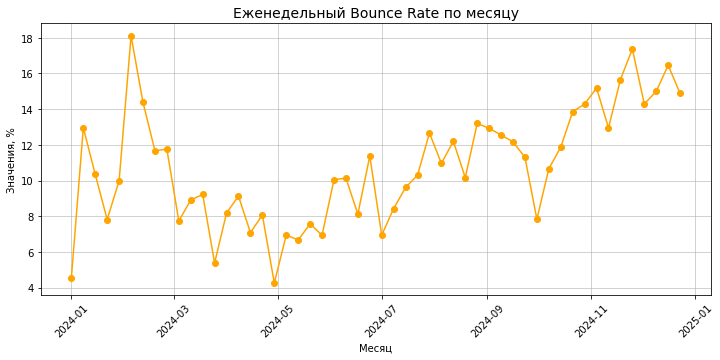

In [58]:
plt.subplots(figsize=(12,5))
plt.plot(br['event_week'], br['BR_%'], marker='o', color='orange')

plt.title('Еженедельный Bounce Rate по месяцу', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Значения, %')
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

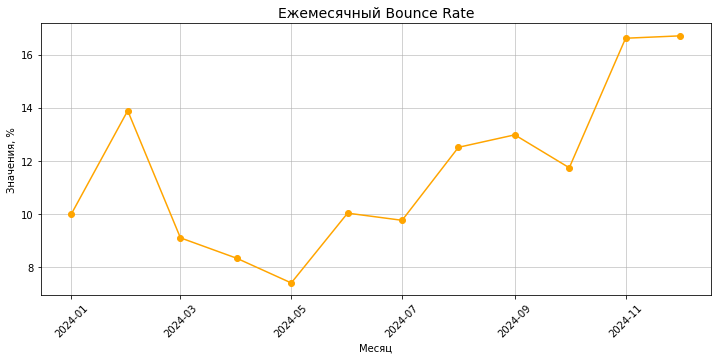

In [59]:
br_left = pa_diploma_events[(pa_diploma_events['event_type']=='user_logout') &
                            (pa_diploma_events['event_index'].isin([2, 3, 4]))].groupby('event_month')['user_id'].nunique().reset_index(name='users_left')

br_all = pa_diploma_events[pa_diploma_events['event_type']=='user_login'].groupby('event_month')['user_id'].nunique().reset_index(name='all_users')

br = pd.merge(br_left, br_all, on='event_month', how='inner')

br['BR_%'] = round(br['users_left']/br['all_users']*100,2)

plt.subplots(figsize=(12,5))
plt.plot(br['event_month'], br['BR_%'], marker='o', color='orange')

plt.title('Ежемесячный Bounce Rate', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Значения, %')
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

In [60]:
funnel_steps = ['page_view', 'product_view', 'product_click', 'add_to_cart', 'checkout_start', 'checkout_complete']

funnel_df_steps = pa_diploma_events[pa_diploma_events['event_type'].isin(funnel_steps)]

funnel_counts = funnel_df_steps.groupby('event_type')['user_id'].nunique().reindex(funnel_steps)

funnel_df = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts.values
})

funnel_df['conversion_from_first_%'] = (funnel_df['users']/funnel_df['users'].iloc[0]*100).round(1)
funnel_df['conversion_from_previous_%'] = (funnel_df['users']/funnel_df['users'].shift(1)*100).round(1)

funnel_df.head(8)

step  users  conversion_from_first_%  \
0          page_view  21562                   100.00   
1       product_view  21533                    99.90   
2      product_click  21211                    98.40   
3        add_to_cart  19887                    92.20   
4     checkout_start  16293                    75.60   
5  checkout_complete  13486                    62.50   

   conversion_from_previous_%  
0                         NaN  
1                       99.90  
2                       98.50  
3                       93.80  
4                       81.90  
5                       82.80

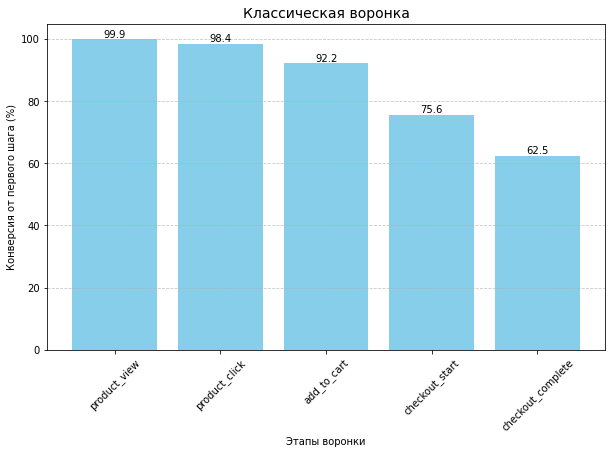

In [61]:
plt.figure(figsize=(10, 6))

plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_first_%'][1:], color='skyblue')

for i, v in enumerate(funnel_df['conversion_from_first_%'][1:]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Классическая воронка', fontsize=14)
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.grid(axis='x', linestyle='--')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

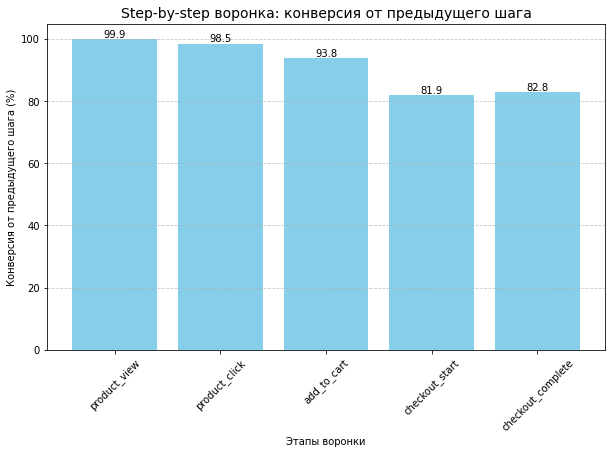

In [62]:
plt.figure(figsize=(10, 6))

plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_previous_%'][1:], color='skyblue')

for i, v in enumerate(funnel_df['conversion_from_previous_%'][1:]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Step-by-step воронка: конверсия от предыдущего шага', fontsize=14)
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.grid(axis='x', linestyle='--')
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [63]:
funnel_1_step = pa_diploma_events[pa_diploma_events['event_type']
                                  =='page_view'].groupby('event_month')['user_id'].nunique().reset_index(name='1_step')
funnel_1_step = funnel_1_step.rename(columns={'event_month':'month'})

funnel_order = pa_diploma_orders.groupby('order_month')['user_id'].nunique().reset_index(name='purchase')
funnel_order = funnel_order.rename(columns={'order_month':'month'})


funnel_df = pd.merge(funnel_1_step, funnel_order, on='month', how='inner')

funnel_df['conversion_%'] = (funnel_df['purchase']/funnel_df['1_step']*100).round(1)

funnel_df.head()

month  1_step  purchase  conversion_%
0 2024-01-01    1045       439         42.00
1 2024-02-01    1967       804         40.90
2 2024-03-01    2580      1128         43.70
3 2024-04-01    2776      1287         46.40
4 2024-05-01    3023      1362         45.10

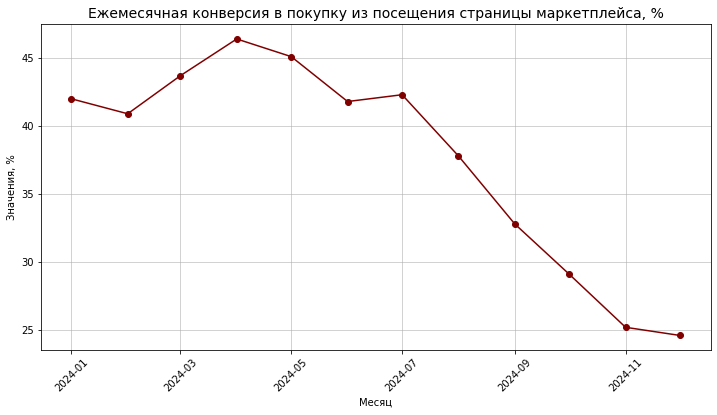

In [64]:
plt.subplots(figsize=(12,6))
plt.plot(funnel_df['month'], funnel_df['conversion_%'], marker='o', color='maroon')

plt.title('Ежемесячная конверсия в покупку из посещения страницы маркетплейса, %', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Значения, %')
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

In [65]:
funnel_1_step = pa_diploma_users.groupby('cohort_month')['user_id'].nunique().reset_index(name='1_step')
funnel_1_step = funnel_1_step.rename(columns={'cohort_month':'month'})

funnel_order = pa_diploma_orders.groupby('order_month')['user_id'].nunique().reset_index(name='purchase')
funnel_order = funnel_order.rename(columns={'order_month':'month'})


funnel_df = pd.merge(funnel_1_step, funnel_order, on='month', how='inner')

funnel_df['conversion_%'] = (funnel_df['purchase']/funnel_df['1_step']*100).round(1)

funnel_df.head()

month  1_step  purchase  conversion_%
0 2024-01-01    2985       439         14.70
1 2024-02-01    2711       804         29.70
2 2024-03-01    2965      1128         38.00
3 2024-04-01    2905      1287         44.30
4 2024-05-01    3066      1362         44.40

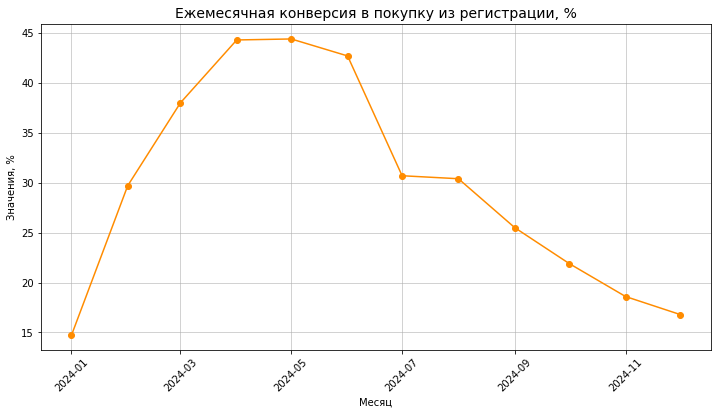

In [66]:
plt.subplots(figsize=(12,6))
plt.plot(funnel_df['month'], funnel_df['conversion_%'], marker='o', color='darkorange')

plt.title('Ежемесячная конверсия в покупку из регистрации, %', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Значения, %')
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

In [67]:
pa_diploma_orders['first_order_month'] = pa_diploma_orders.groupby('user_id')['order_month'].transform('min')

pa_diploma_orders['n_period'] = (pa_diploma_orders['order_month'].values.astype('datetime64[M]')
                                 - pa_diploma_orders['first_order_month'].values.astype('datetime64[M]')).astype(int)

pa_diploma_orders.head()

order_id  user_id          order_date       product_name  quantity  \
0         1        3 2024-01-19 01:52:52         Шуруповерт         2   
1         2        3 2024-01-19 01:52:52  Молоток слесарный         1   
2         3        3 2024-01-19 01:52:52    Секатор садовый         2   
3         4        3 2024-01-25 13:59:38         Шуруповерт         2   
4         5        3 2024-01-25 13:59:38         Чай черный         1   

   unit_price  total_price                    category_name order_week  \
0    5,539.13    11,078.26  Инструменты и садовый инвентарь 2024-01-15   
1   11,340.38    11,340.38  Инструменты и садовый инвентарь 2024-01-15   
2   10,892.09    21,784.18  Инструменты и садовый инвентарь 2024-01-15   
3    5,539.13    11,078.26  Инструменты и садовый инвентарь 2024-01-22   
4    2,099.59     2,099.59                 Продукты питания 2024-01-22   

  order_month first_order_month  n_period  
0  2024-01-01        2024-01-01         0  
1  2024-01-01        2024-01-01         0  
2  2024-01-01        2024-01-01         0  
3  2024-01-01        2024-01-01         0  
4  2024-01-01        2024-01-01         0

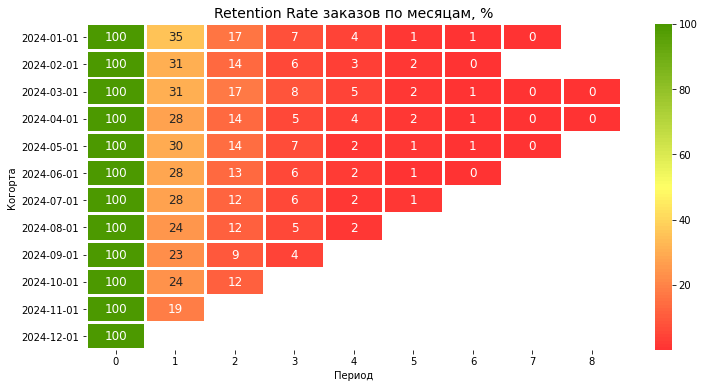

In [68]:
cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)
pa_diploma_orders['first_order_month'] = pa_diploma_orders['first_order_month'].astype('str')


df_pivot = pa_diploma_orders.pivot_table(index='first_order_month', 
                            columns='n_period', values='user_id', aggfunc='nunique')

df_pivot_retention = df_pivot.div(df_pivot[0], axis=0) * 100

plt.figure(figsize=(12, 6))

sns.heatmap(df_pivot_retention, cmap=cmap, annot=True, fmt='.0f', linewidths=2, annot_kws={"size": 12})

plt.title('Retention Rate заказов по месяцам, %', fontsize=14)
plt.xlabel('Период')
plt.ylabel('Когорта')

plt.show()

**Промежуточный вывод:**

Динамика привлечения новых пользователей (считаем регистрации) показывает резкий скачек значений после июля 2024 года, что говорит об изменении стратегии привлечения новых пользователей или начале какой-то маркетинговой акции. Однако, в декабре у ежемесячных значений новых пользователей наблюдается небольшой спад, что может говорить об окончании акции или ухужшении пользовательского опыта.

Динамика `DAU`, `WAU` и `MAU` за год показывает общую положительную динамику, с постепенным снижением значений после сентября 2024 года. Это может говорить о том, что изменение политики привлечения новых пользователей увеличило общее количество активных пользователей, однако данный тренд был достаточно кратковременным и может говорить в целом о привлечении низко вовлеченных пользователей, которым данный сервис оказательно не очень актуальным.

Значения `Stickiness` за год колебаются в переделах 8-11%, наблюдался резкий рост показателя до апреля 2024 года, после этого значения начинают снижатся и достигают минимума в ноябре 2024 года. Таким образом, можно сказать, что несмотря на увеличение количества новых пользователей после июля 2024 года, изменения в `Stickiness` не наблюдается, что говорит о привлечении нецелевой или незаинтересованной аудитории.

При оценке значений `Bounce Rate`, мы исходили из того, что ушедшими пользователями будут считаться пользователи, которые завершили сессию на 2,3 или 4 шаге (`user_logout`) от количества авторизованных пользователей (`user_login`). С мая 2024 года наблюдается рост  `Bounce Rate`, который выходит к своему максимуму в ноябре 2024 года. Это может говорить о том, что изменился пользовательский опыт с середины года, что приводит к более частому выходу из маркетплейс, или может говорить о том, что увеличилось количество незаинтересованной аудитории, которая покидает маркетплейс после недолго пребывания на странице.

При рассмотрении конверсии, мы брали следующие шаги для воронки: `'page_view'`, `'product_view'`, `'product_click'`, `'add_to_cart'`, `'checkout_start'` и `'checkout_complete'`. При подобном анализе, отсутствуют резкие подения значений на каком-либо этапе и при рассмотрении классической воронки и при рассмотрении воронки `step-by-step`. Однако, поскольку завершение оформления заказа (`'checkout_complete'`) не означает покупку, мы также рассмотрели конверсию из захода на маркетплейс (`'page_view'`) в покупку (датафрейм `'pa_diploma_orders'`), и там наблюдается резкое снижение значений конверсии начиная с июля 2024 года. Таким образом, несмотря на отсутствие ухудшения пользовательского опыта при оценке конверсии до факта оплаты, с середины года наблюдается увеличение количества пользователей не совершающих покупку.

При рассмотрении конверсии из регистрации в покупку, то можно увидеть, что негативный тренд начинается в мае 2024 года, с небольшим замедлением с июля по август 2024 года, однако после августа наблшюдается сильное снижение значений и достижение практически минимума по всей метрике. Данные значения дополняют картину - можно с уверенностью говорить, что новая привлеченная аудитория практически не конвертируется в покупателей и соответственно, не только не приносит ожидаемого дохода, но и увеличивает расходы на привлечение.

Если проводить анализ значений `'Retention Rate'` по количеству повторных заказов в зависимости от месяца первого заказа, то можно увидеть, что не существует пользователей, которые использовали маркетплейс дольше 8 месяцев и количество повторных заказов начинает падать со второго месяца. При этом, дополнительное ухудшение метрики можно увидеть также начиная со второй половины года, что говорит о том, что пользователи, пришедшие во второй половине года совершают совсем мало повторных заказов.

### 3. Оценка метрик монетизации и юнит-экономики

Выполним анализ монетизации. Определим, сколько зарабатывает продукт и сколько тратит на привлечение. 

Оценим как агрегированные метрики (ARPU, AOV), так и показатели эффективности (CAC, ROI, Payback Period).

In [69]:
pa_diploma_orders['revenue'] = pa_diploma_orders['total_price']*0.05

pa_diploma_orders.head()

order_id  user_id          order_date       product_name  quantity  \
0         1        3 2024-01-19 01:52:52         Шуруповерт         2   
1         2        3 2024-01-19 01:52:52  Молоток слесарный         1   
2         3        3 2024-01-19 01:52:52    Секатор садовый         2   
3         4        3 2024-01-25 13:59:38         Шуруповерт         2   
4         5        3 2024-01-25 13:59:38         Чай черный         1   

   unit_price  total_price                    category_name order_week  \
0    5,539.13    11,078.26  Инструменты и садовый инвентарь 2024-01-15   
1   11,340.38    11,340.38  Инструменты и садовый инвентарь 2024-01-15   
2   10,892.09    21,784.18  Инструменты и садовый инвентарь 2024-01-15   
3    5,539.13    11,078.26  Инструменты и садовый инвентарь 2024-01-22   
4    2,099.59     2,099.59                 Продукты питания 2024-01-22   

  order_month first_order_month  n_period  revenue  
0  2024-01-01        2024-01-01         0   553.91  
1  2024-01-01        2024-01-01         0   567.02  
2  2024-01-01        2024-01-01         0 1,089.21  
3  2024-01-01        2024-01-01         0   553.91  
4  2024-01-01        2024-01-01         0   104.98

In [70]:
revenue_df = pa_diploma_orders.groupby('order_month').agg(total_revenue=('revenue', 'sum'),
                AOV=('total_price','mean'), paid_users=('user_id','nunique')).reset_index()
revenue_df = revenue_df.rename(columns={'order_month': 'month'})

total_users = pa_diploma_events.groupby('event_month')['user_id'].nunique().reset_index(name='total_users')
total_users = total_users.rename(columns={'event_month': 'month'})

costs = pa_diploma_campaign_costs.groupby('spend_month')['budget'].sum().reset_index(name='total_costs')
costs = costs.rename(columns={'spend_month': 'month'})

revenue_df = revenue_df.merge(total_users, how='inner', on='month')
revenue_df = revenue_df.merge(costs, how='inner', on='month')

revenue_df['ARPU'] = round(revenue_df['total_revenue']/revenue_df['total_users'],2)

revenue_df['ARPPU'] = round(revenue_df['total_revenue']/revenue_df['paid_users'],2)

revenue_df['profit_ml'] = round((revenue_df['total_revenue'] - revenue_df['total_costs'])/1000000,2)

revenue_df['total_costs'] = round(revenue_df['total_costs']/1000000,2)

revenue_df['total_revenue'] = round(revenue_df['total_revenue']/1000000,2)

revenue_df.head()

month  total_revenue       AOV  paid_users  total_users  total_costs  \
0 2024-01-01           0.62 13,375.01         439         1102         1.18   
1 2024-02-01           1.24 13,562.50         804         2079         1.06   
2 2024-03-01           1.86 13,920.37        1128         2753         1.17   
3 2024-04-01           2.07 13,714.40        1287         2961         1.15   
4 2024-05-01           2.39 14,145.67        1362         3220         1.23   

    ARPU    ARPPU  profit_ml  
0 560.12 1,406.05      -0.56  
1 595.60 1,540.12       0.18  
2 674.53 1,646.26       0.69  
3 699.62 1,609.60       0.92  
4 743.53 1,757.82       1.17

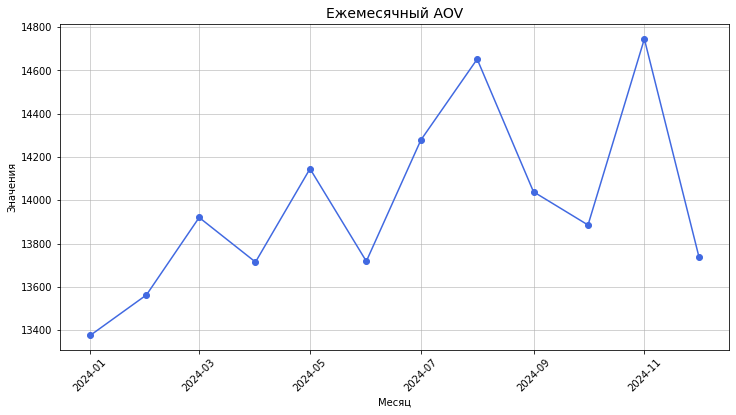

In [71]:
plt.subplots(figsize=(12,6))
plt.plot(revenue_df['month'], revenue_df['AOV'], marker='o', color='royalblue')

plt.title('Ежемесячный AOV', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Значения')
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

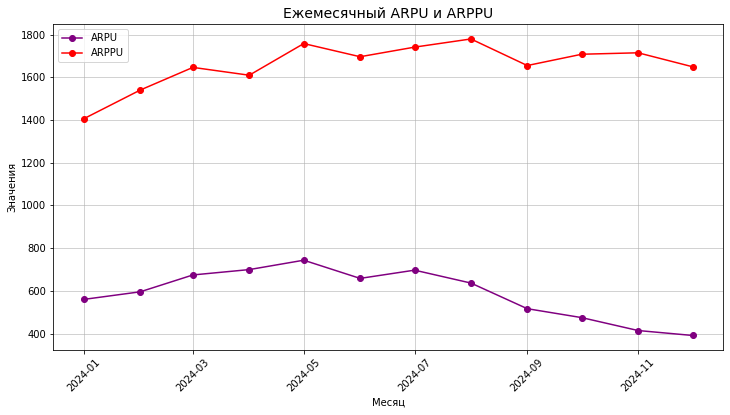

In [72]:
plt.subplots(figsize=(12,6))
plt.plot(revenue_df['month'], revenue_df['ARPU'], marker='o', color='purple', label='ARPU')
plt.plot(revenue_df['month'], revenue_df['ARPPU'], marker='o', color='red', label='ARPPU')

plt.title('Ежемесячный ARPU и ARPPU', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Значения')
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.legend()
plt.show()

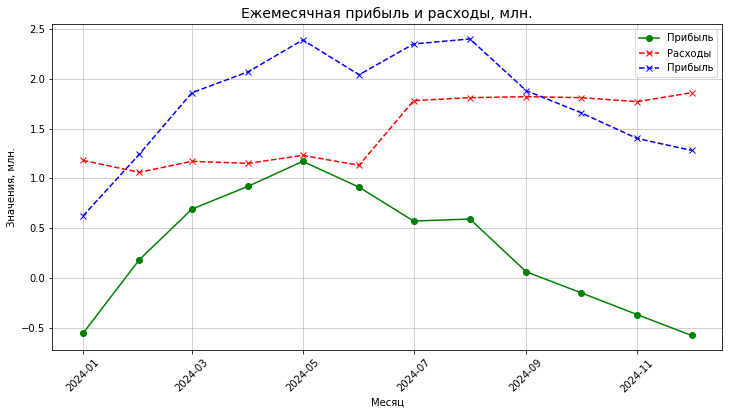

In [73]:
plt.subplots(figsize=(12,6))
plt.plot(revenue_df['month'], revenue_df['profit_ml'], marker='o', color='green', label='Прибыль')
plt.plot(revenue_df['month'], revenue_df['total_costs'],  marker='x', linestyle='--', color='red', label='Расходы')
plt.plot(revenue_df['month'], revenue_df['total_revenue'],  marker='x', linestyle='--', color='blue', label='Прибыль')

plt.title('Ежемесячная прибыль и расходы, млн.', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Значения, млн.')
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.legend()
plt.show()

In [76]:
cohort_orders = pa_diploma_orders.merge(pa_diploma_users[['user_id','cohort_month']],
                        how='left', on='user_id')

In [77]:
raw_ltv = cohort_orders.sort_values(by=['user_id', 'cohort_month'])
raw_ltv = raw_ltv.groupby('cohort_month')['revenue'].sum().reset_index(name='total_revenue')

total_users = pa_diploma_users.groupby('cohort_month')['user_id'].nunique().reset_index(name='total_users')

costs = pa_diploma_campaign_costs.groupby('spend_month')['budget'].sum().reset_index(name='total_costs')
costs = costs.rename(columns={'spend_month': 'cohort_month'})

ltv_df = raw_ltv.merge(total_users, how='inner', on='cohort_month')
ltv_df = ltv_df.merge(costs, how='inner', on='cohort_month')

ltv_df = ltv_df.assign(LTV=lambda x: x['total_revenue']/x['total_users'],CAC=lambda x: x['total_costs']/x['total_users'],
         ROI = lambda x: (x['LTV']-x['CAC'])/x['CAC']*100)

ltv_df.head()

cohort_month  total_revenue  total_users  total_costs    LTV    CAC    ROI
0   2024-01-01   2,096,537.88         2985 1,177,457.00 702.36 394.46  78.06
1   2024-02-01   2,025,391.75         2711 1,061,385.88 747.10 391.51  90.83
2   2024-03-01   2,449,055.75         2965 1,167,680.38 825.99 393.82 109.74
3   2024-04-01   2,436,117.50         2905 1,147,739.88 838.59 395.09 112.25
4   2024-05-01   2,235,008.25         3066 1,225,322.25 728.97 399.65  82.40

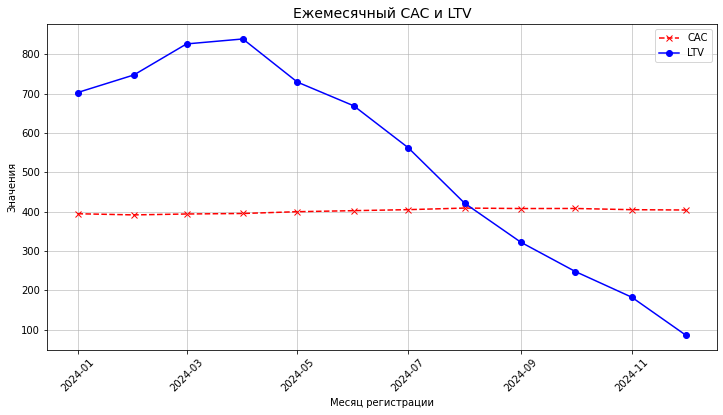

In [78]:
plt.subplots(figsize=(12,6))
plt.plot(ltv_df['cohort_month'], ltv_df['CAC'],  marker='x', linestyle='--', color='red', label='CAC')
plt.plot(ltv_df['cohort_month'], ltv_df['LTV'], marker='o', color='blue', label='LTV')

plt.title('Ежемесячный CAC и LTV', fontsize=14)
plt.xlabel('Месяц регистрации')
plt.ylabel('Значения')
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.legend()
plt.show()

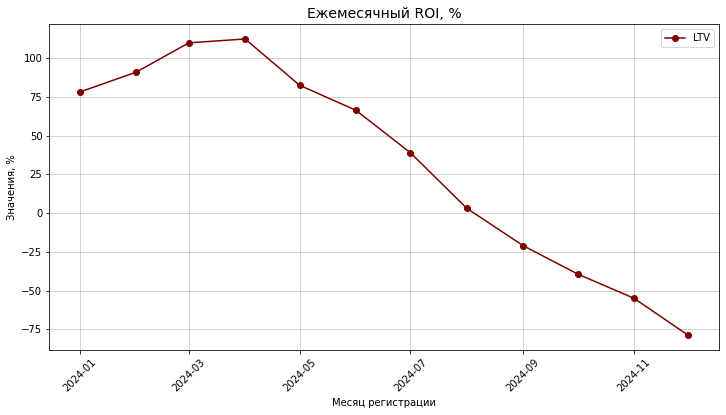

In [79]:
plt.subplots(figsize=(12,6))
plt.plot(ltv_df['cohort_month'], ltv_df['ROI'], marker='o', color='maroon', label='LTV')

plt.title('Ежемесячный ROI, %', fontsize=14)
plt.xlabel('Месяц регистрации')
plt.ylabel('Значения, %')
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.legend()
plt.show()

In [81]:
pa_diploma_orders_merge = pa_diploma_orders.merge(pa_diploma_users[['user_id','cohort_month', 'acq_channel']], how='left', on='user_id')

raw_ltv_2 = pa_diploma_orders_merge.sort_values(by=['user_id', 'cohort_month'])
raw_ltv_2 = raw_ltv_2.groupby(['cohort_month', 'n_period'])['revenue'].sum().reset_index(name='total_revenue')
raw_ltv_2['period_month'] = raw_ltv_2['cohort_month'].dt.to_period('M').add(raw_ltv_2['n_period']).dt.to_timestamp() 

total_users = pa_diploma_users.groupby('cohort_month')['user_id'].nunique().reset_index(name='total_users')
total_users = total_users.rename(columns={'cohort_month': 'period_month'})

costs = pa_diploma_campaign_costs.groupby('spend_month')['budget'].sum().reset_index(name='total_costs')
costs = costs.rename(columns={'spend_month': 'period_month'})

ltv_df_2 = raw_ltv_2.merge(total_users, how='inner', on='period_month')
ltv_df_2 = ltv_df_2.merge(costs, how='inner', on='period_month')
ltv_df_2 = ltv_df_2.drop(columns='period_month')

ltv_df_2 = ltv_df_2.assign(LTV=lambda x: x['total_revenue']/x['total_users'],CAC=lambda x: x['total_costs']/x['total_users'],
         ROI = lambda x: (x['LTV']-x['CAC'])/x['CAC']*100)

ltv_df_2.head()

cohort_month  n_period  total_revenue  total_users  total_costs    LTV  \
0   2024-01-01         0   1,113,239.62         2985 1,177,457.00 372.94   
1   2024-01-01         1     497,013.91         2711 1,061,385.88 183.33   
2   2024-02-01         0   1,121,495.00         2711 1,061,385.88 413.68   
3   2024-01-01         2     230,945.77         2965 1,167,680.38  77.89   
4   2024-02-01         1     506,431.62         2965 1,167,680.38 170.80   

     CAC    ROI  
0 394.46  -5.45  
1 391.51 -53.17  
2 391.51   5.66  
3 393.82 -80.22  
4 393.82 -56.63

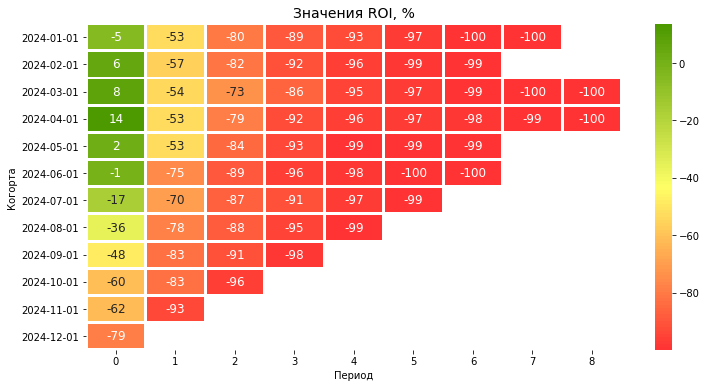

In [82]:
cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)
ltv_df_2['cohort_month'] = ltv_df_2['cohort_month'].astype('str')


df_pivot = ltv_df_2.pivot_table(index='cohort_month', columns='n_period', values='ROI')

plt.figure(figsize=(12, 6))

sns.heatmap(df_pivot, cmap=cmap, annot=True, fmt='.0f', linewidths=2, annot_kws={"size": 12})

plt.title('Значения ROI, %', fontsize=14)
plt.xlabel('Период')
plt.ylabel('Когорта')

plt.show()

In [83]:
# Рассмотрим окупаемость только пользователей, которые оформляли заказы

cohort_size = pa_diploma_orders.groupby('first_order_month')['user_id'].nunique().reset_index(name='cohort_size')
cohort_size['first_order_month'] = pd.to_datetime(cohort_size['first_order_month'])

pa_diploma_orders['n_period'] = (
    pa_diploma_orders['order_month'].values.astype('datetime64[M]')
  - pa_diploma_orders['first_order_month'].values.astype('datetime64[M]')).astype(int)

cohort_rev = pa_diploma_orders.groupby(['first_order_month','n_period'])['revenue'].sum().reset_index(name='period_revenue')

cum_cohort_rev = cohort_rev.sort_values(['first_order_month','n_period']).groupby('first_order_month').apply(lambda df: 
             df.assign(cum_revenue = df['period_revenue'].cumsum())).reset_index(drop=True)
cum_cohort_rev['first_order_month'] = pd.to_datetime(cum_cohort_rev['first_order_month'])

ltv = cum_cohort_rev.merge(cohort_size, on='first_order_month').assign(LTV=lambda df: 
        (df['cum_revenue']/df['cohort_size']).round(2))[['first_order_month','n_period','LTV']]

costs = pa_diploma_campaign_costs.groupby('spend_month')['budget'].sum().reset_index(
        name='total_costs').rename(columns={'spend_month':'first_order_month'})
costs['first_order_month'] = pd.to_datetime(costs['first_order_month'])
cac = costs.merge(cohort_size, on='first_order_month').assign(CAC=lambda df: 
         (df['total_costs']/df['cohort_size']).round(2))[['first_order_month','CAC']]

cohort_metrics = ltv.merge(cac, on='first_order_month', how='left').rename(
    columns={'first_order_month':'cohort_month'}).assign(ROI = lambda df: (df['LTV'] - df['CAC']) / df['CAC'] * 100)

cohort_metrics.head()

cohort_month  n_period      LTV      CAC    ROI
0   2024-01-01         0 1,406.05 2,682.13 -47.58
1   2024-01-01         1 2,171.05 2,682.13 -19.06
2   2024-01-01         2 2,568.81 2,682.13  -4.23
3   2024-01-01         3 2,688.64 2,682.13   0.24
4   2024-01-01         4 2,848.31 2,682.13   6.20

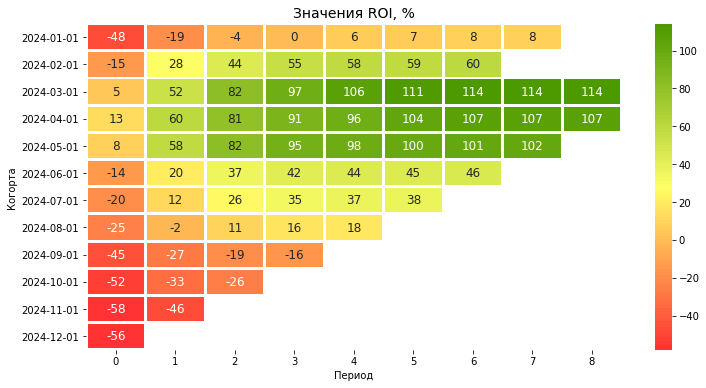

In [84]:
cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)
cohort_metrics['cohort_month'] = cohort_metrics['cohort_month'].astype('str')


df_pivot = cohort_metrics.pivot_table(index='cohort_month', columns='n_period', values='ROI')

plt.figure(figsize=(12, 6))

sns.heatmap(df_pivot, cmap=cmap, annot=True, fmt='.0f', linewidths=2, annot_kws={"size": 12})

plt.title('Значения ROI, %', fontsize=14)
plt.xlabel('Период')
plt.ylabel('Когорта')

plt.show()

**Промежуточный вывод:**

Анализируя значения среднего чека на покупателя (`AOV`) можно увидеть, что несмотря на резкое увеличение значений метрики после июня 2024 года, также наблюдается сильный откат (падение) в октябре и декабре 2024 года. Скорее всего, высокие пики обусловлены сезонной флуктуацией (пик в мае - заупки перед летом и в майские прздники, пик в августе - закупки перед началом учебного года, пик в ноябре - покупки подарков на новый год).

Динамика `ARPPU` показывает отсутствие резких скачков, но в целом наблюдается тенденция на снижение значений метрики после июля 2024 года, что может говорить о том, что количество платящих пользователей снижается. При этом, показатели `ARPU` также демонстрируют общее падение ниже первоначальных значений начиная с июля 2024 года. Это также потверждает общую тендецию снижение вовлеченности общей базы пользователей.

Оценивая прибыль (выручка за вычетом расходов на привлечение пользователей) можно увидеть насколько график показывает  резкий рост прибыли до мая 2024 года (пик), однако после этого периода, особенно после июля 2024 года начинается резкое падение до первоначальных значений. Период, когда выручка превышала расходы был с февраля до сентября 2024 года.

Переходя к оценке `LTV` и `CAC` по месяцу регистрации можно увидеть рост значений `LTV` до мая 2024 года, пик наблюдается в мае 2024 года, с резким снижением после этого, небольшим замедлением в июле-августе 2024 года и снижением до минимальных значений после августа 2024 года. Значения `CAC` остаются неизменными на всем протяжении года, с сентбря значения `LTV` становятся ниже `CAC`. Это только подтверждает предположение, что с июля 2024 года была привлечена нецелевая аудитория, которая не принесла дополнительного дохода (не заказывали товары).

Аналогичная динамика наблюдается при рассмотрении значений `ROI`, рост наблюдается до мая 2024 года, после чего начинается падение значений метрики, с небольшим замедлением в июле-августе 2024 года. 

Если оценивать значения `ROI` разбивая на когорты по первому месяцу заказа и расчитывая помесячный период с месяца первого заказа, то положительная динамика была у когорт с марта по май 2024 года, когда положительные значения `ROI` были в первом месяце, однако со второго месяца наблюдается резкое падение значений и явно негативная тенденция наблюдается с сентября 2024 года.

Немного иная картина наблюдается при анализе значений `ROI` при учете динамики только покупателей (только пользователи, совершившие покупки). При разбивке на когорты по первому месяцу заказа и оценке динамики по месяцам, можно увидеть, что у когорт марта-мая 2024 года видна явная положительная динамика и выход на окупаемость начиная со второго месяца. Однако, данная тенденция резко ухудшается начиная с июня 2024 года и наихушие результаты наблюдаются у когорт с сентября 2024 года.

## Выводы по этапам 2 и 3


**Привлекательность продукта для пользователя.**

Динамика привлечения новых пользователей (считаем регистрации) показывает резкий скачек значений после июля 2024 года, что говорит об изменении стратегии привлечения новых пользователей или начале какой-то маркетинговой акции. Однако, в декабре у ежемесячных значений новых пользователей наблюдается небольшой спад, что может говорить об окончании акции или ухужшении пользовательского опыта.

Динамика `DAU`, `WAU` и `MAU` за год показывает общую положительную динамику, с постепенным снижением значений после сентября 2024 года. Это может говорить о том, что изменение политики привлечения новых пользователей увеличило общее количество активных пользователей, однако данный тренд был достаточно кратковременным и может говорить в целом о привлечении низко вовлеченных пользователей, которым данный сервис оказательно не очень актуальным.

Значения `Stickiness` за год колебаются в переделах 8-11%, наблюдался резкий рост показателя до апреля 2024 года, после этого значения начинают снижатся и достигают минимума в ноябре 2024 года. Таким образом, можно сказать, что несмотря на увеличение количества новых пользователей после июля 2024 года, изменения в `Stickiness` не наблюдается, что говорит о привлечении нецелевой или незаинтересованной аудитории.

При оценке значений `Bounce Rate`, мы исходили из того, что ушедшими пользователями будут считаться пользователи, которые завершили сессию на 2,3 или 4 шаге (`user_logout`) от количества авторизованных пользователей (`user_login`). С мая 2024 года наблюдается рост `Bounce Rate`, который выходит к своему максимуму в ноябре 2024 года. Это может говорить о том, что изменился пользовательский опыт с середины года, что приводит к более частому выходу из маркетплейс, или может говорить о том, что увеличилось количество незаинтересованной аудитории, которая покидает маркетплейс после недолго пребывания на странице.

При рассмотрении конверсии, мы брали следующие шаги для воронки: `'page_view'`, `'product_view'`, `'product_click'`, `'add_to_cart'`, `'checkout_start'` и `'checkout_complete'`. При подобном анализе, отсутствуют резкие подения значений на каком-либо этапе и при рассмотрении классической воронки и при рассмотрении воронки step-by-step. Однако, поскольку завершение оформления заказа (`'checkout_complete'`) не означает покупку, мы также рассмотрели конверсию из захода на маркетплейс (`'page_view'`) в покупку (датафрейм `'pa_diploma_orders'`), и там наблюдается резкое снижение значений конверсии начиная с июля 2024 года. Таким образом, несмотря на отсутствие ухудшения пользовательского опыта при оценке конверсии до факта оплаты, с середины года наблюдается увеличение количества пользователей не совершающих покупку.

При рассмотрении конверсии из регистрации в покупку, то можно увидеть, что негативный тренд начинается в мае 2024 года, с небольшим замедлением с июля по август 2024 года, однако после августа наблшюдается сильное снижение значений и достижение практически минимума по всей метрике. Данные значения дополняют картину - можно с уверенностью говорить, что новая привлеченная аудитория практически не конвертируется в покупателей и соответственно, не только не приносит ожидаемого дохода, но и увеличивает расходы на привлечение.

Если проводить анализ значений `'Retention Rate'` по количеству повторных заказов в зависимости от месяца первого заказа, то можно увидеть, что не существует пользователей, которые использовали маркетплейс дольше 8 месяцев и количество повторных заказов начинает падать со второго месяца. При этом, дополнительное ухудшение метрики можно увидеть также начиная со второй половины года, что говорит о том, что пользователи, пришедшие во второй половине года совершают совсем мало повторных заказов.

**Монетизация продукта.**

Анализируя значения среднего чека на покупателя (`AOV`) можно увидеть, что несмотря на резкое увеличение значений метрики после июня 2024 года, также наблюдается сильный откат (падение) в октябре и декабре 2024 года. Скорее всего, высокие пики обусловлены сезонной флуктуацией (пик в мае - заупки перед летом и в майские прздники, пик в августе - закупки перед началом учебного года, пик в ноябре - покупки подарков на новый год).

Динамика `ARPPU` показывает отсутствие резких скачков, но в целом не наблюдается тенденция на снижение значений метрики после июля 2024 года, что может говорить о том, что количество платящих пользователей снижается. При этом, показатели `ARPU` демонстрируют общее падение ниже первоначальных значений начиная с июля 2024 года. Это также потверждает общую тендецию снижение вовлеченности общей базы пользователей.

Оценивая прибыль (выручка за вычетом расходов на привлечение пользователей) можно увидеть насколько график показывает  резкий рост прибыли до мая 2024 года (пик), однако после этого периода, особенно после июля 2024 года начинается резкое падение до первоначальных значений. Период, когда выручка превышала расходы был с февраля до сентября 2024 года.

Переходя к оценке `LTV` и `CAC` по месяцу регистрации можно увидеть рост значений `LTV` до мая 2024 года, пик наблюдается в мае 2024 года, с резким снижением после этого, небольшим замедлением в июле-августе 2024 года и снижением до минимальных значений после августа 2024 года. Значения `CAC` остаются неизменными на всем протяжении года, с сентбря значения `LTV` становятся ниже `CAC`. Это только подтверждает предположение, что с июля 2024 года была привлечена нецелевая аудитория, которая не принесла дополнительного дохода (не заказывали товары).

Аналогичная динамика наблюдается при рассмотрении значений `ROI`, рост наблюдается до мая 2024 года, после чего начинается падение значений метрики, с небольшим замедлением в июле-августе 2024 года. 

Если оценивать значения `ROI` разбивая на когорты по первому месяцу заказа и расчитывая помесячный период с месяца первого заказа, то положительная динамика была у когорт с марта по май 2024 года, когда положительные значения `ROI` были в первом месяце, однако со второго месяца наблюдается резкое падение значений и явно негативная тенденция наблюдается с сентября 2024 года.

Немного иная картина наблюдается при анализе значений `ROI` при учете динамики только покупателей (только пользователи, совершившие покупки). При разбивке на когорты по первому месяцу заказа и оценке динамики по месяцам, можно увидеть, что у когорт марта-мая 2024 года видна явная положительная динамика и выход на окупаемость начиная со второго месяца. Однако, данная тенденция резко ухудшается начиная с июня 2024 года и наихушие результаты наблюдаются у когорт с сентября 2024 года.

**Общее резюме:**

Во второй половине года упала общая выручка маркетплейса и были рассмотрены возможные причина данного снижения:

1. Значения среднего чека на покупателя (`AOV`) - падения во второй половине года не наблюдается.
2. Значения средней выручки с пользователя (`ARPU`) - наблюдается падение во второй половине года.
3. Значения средней выручки с покупателя (`ARPPU`) - падения во второй половине года не наблюдается.
4. Размер доли активных пользователей (конверсия, `'Retention Rate'`, `ROI`) - наблюдается снижение значений.
5. Значения вовлеченности (`stickiness`) - наблюдается снижение во второй половине года.

После июля 2024 года можно отметить, что привлеченная аудитория не была заинтересована в продукте и не конвертировалась в покупателей. Данное поведение пользователей отразилось на размере прибыли маркетплейса, период окупаемости был между февралем и сентябрем 2024 года, когда во второй половине дня новая привлеченная аудитория не оформляла заказы.

## 4. Поиск инсайтов, точек роста и сегментация


Переходим к точечным наблюдениям. Посмотрим вглубь данных: по каналам, сегментам пользователей, категориям товаров, регионам, типам устройств. 

### Цель — сформировать обоснованные гипотезы:

* какие сегменты работают лучше остальных
* какие сегменты работают хуже остальных
* на каких этапах воронки теряются пользователи
* какие группы можно или нужно масштабировать
* куда стоит инвестировать больше внимания или ресурсов

In [86]:
pa_diploma_users['region'].unique()

array(['Москва', 'Санкт-Петербург', 'Краснодар', 'Другие регионы',
       'Нижний Новгород', 'Екатеринбург', 'Московская область',
       'Новосибирск', 'Ростов-на-Дону'], dtype=object)

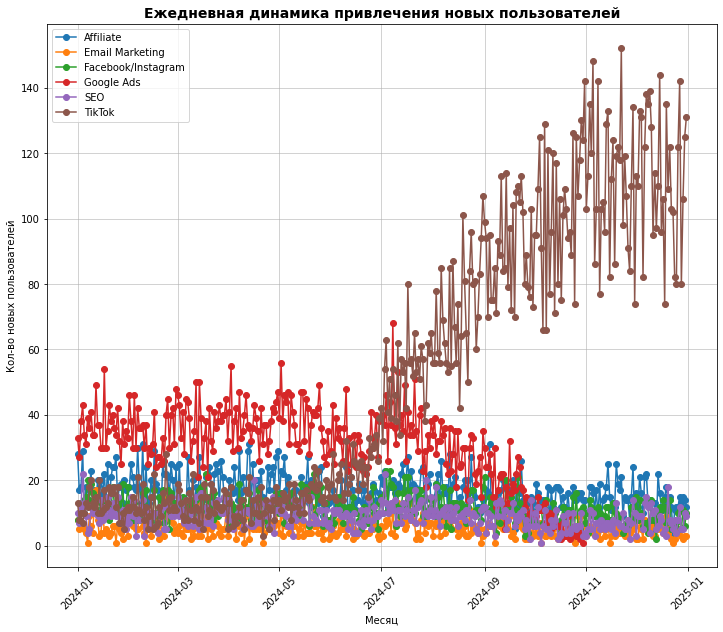

In [87]:
new_users = pa_diploma_users[pd.to_datetime(pa_diploma_users['registration_day']) <='2024-12-31'].groupby(['registration_day',
            'acq_channel'])['user_id'].nunique().reset_index(name='new_users')

plt.figure(figsize=(12, 10))

for channel in new_users['acq_channel'].unique():
    data = new_users[new_users['acq_channel'] == channel]
    plt.plot(data['registration_day'], data['new_users'], marker='o', label=channel)

plt.title('Ежедневная динамика привлечения новых пользователей',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Кол-во новых пользователей')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

In [88]:
pa_diploma_users[(pa_diploma_users['acq_channel']=='Google Ads')&
                 (pa_diploma_users['registration_date']>'2024-10-29 00:00:00')]

user_id   registration_date       os  age   device gender  \
34682    35380 2024-10-29 11:25:00      iOS   49   tablet      M   
34764    35463 2024-10-29 19:17:00    macOS   28   tablet      M   
34774    35473 2024-10-29 21:15:00  Android   46   tablet      F   
34789    35488 2024-10-29 12:00:00      iOS   39  desktop      F   
34981    35680 2024-10-30 08:29:00  Android   34   mobile      M   

                   region browser country acq_channel  campaign_id  \
34682      Другие регионы  Safari  Россия  Google Ads           11   
34764  Московская область  Safari  Россия  Google Ads           13   
34774      Другие регионы  Chrome  Россия  Google Ads           32   
34789           Краснодар    Edge  Россия  Google Ads           29   
34981     Нижний Новгород  Chrome  Россия  Google Ads           46   

      user_segment buyer_segment cohort_week cohort_month registration_day  
34682     активный       regular  2024-10-28   2024-10-01       2024-10-29  
34764       спящий        medium  2024-10-28   2024-10-01       2024-10-29  
34774      новичок        medium  2024-10-28   2024-10-01       2024-10-29  
34789     активный      one_time  2024-10-28   2024-10-01       2024-10-29  
34981          VIP      one_time  2024-10-28   2024-10-01       2024-10-30

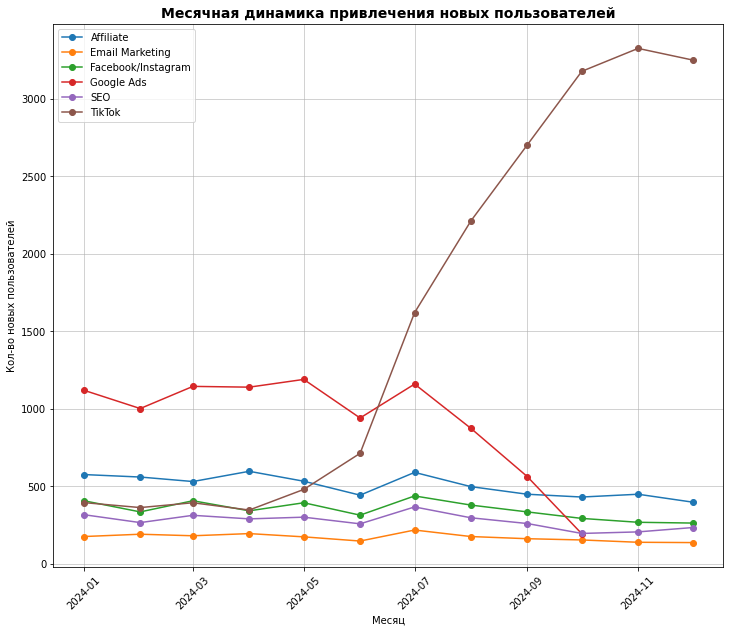

In [89]:
new_users = pa_diploma_users[pa_diploma_users['cohort_week']<'2024-12-30'].groupby(['cohort_month',
            'acq_channel'])['user_id'].nunique().reset_index(name='new_users')

plt.figure(figsize=(12, 10))

for channel in new_users['acq_channel'].unique():
    data = new_users[new_users['acq_channel'] == channel]
    plt.plot(data['cohort_month'], data['new_users'], marker='o', label=channel)

plt.title('Месячная динамика привлечения новых пользователей',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Кол-во новых пользователей')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

In [90]:
grouped_segments = pa_diploma_users.groupby(['user_segment',
                    'buyer_segment'])['user_id'].nunique().reset_index().sort_values(by='user_id', ascending=False)

grouped_segments

user_segment buyer_segment  user_id
8       новичок        medium     4131
0           VIP        medium     4119
4      активный        medium     4089
12       спящий        medium     4082
6      активный          rare     3384
10      новичок          rare     3354
2           VIP          rare     3310
14       спящий          rare     3208
7      активный       regular     1988
15       спящий       regular     1941
11      новичок       regular     1924
3           VIP       regular     1920
1           VIP      one_time     1691
5      активный      one_time     1687
13       спящий      one_time     1662
9       новичок      one_time     1661

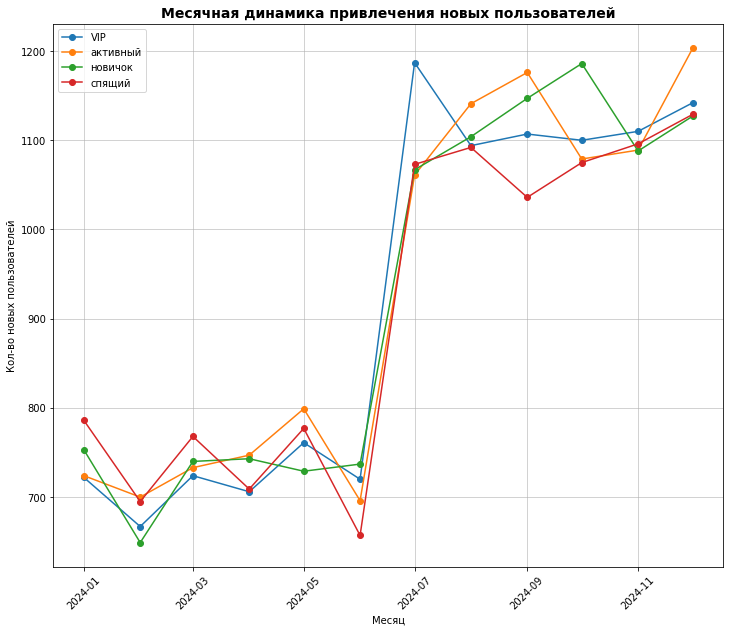

In [91]:
new_users = pa_diploma_users[pd.to_datetime(pa_diploma_users['registration_day']) <='2024-12-31'].groupby(['cohort_month',
            'user_segment'])['user_id'].nunique().reset_index(name='new_users')

plt.figure(figsize=(12, 10))

for segment in new_users['user_segment'].unique():
    data = new_users[new_users['user_segment'] == segment]
    plt.plot(data['cohort_month'], data['new_users'], marker='o', label=segment)

plt.title('Месячная динамика привлечения новых пользователей',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Кол-во новых пользователей')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

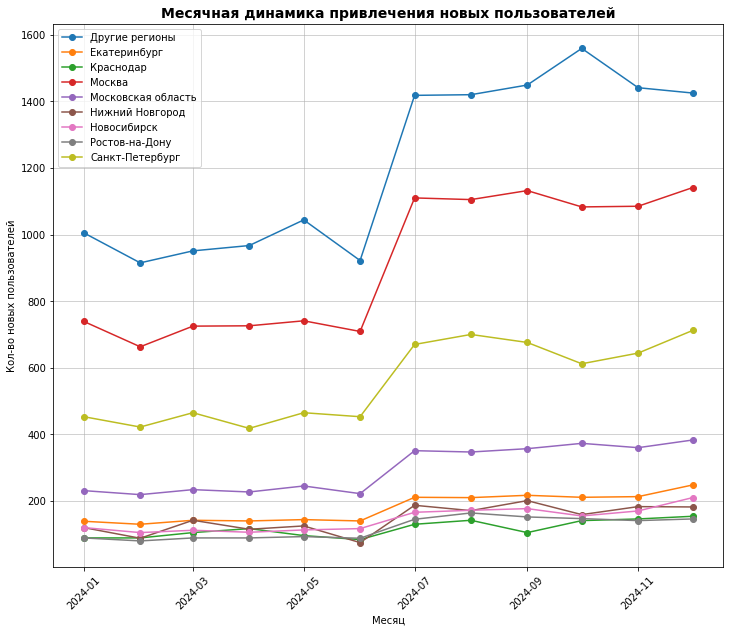

In [92]:
new_users = pa_diploma_users[pd.to_datetime(pa_diploma_users['registration_day']) <='2024-12-31'].groupby(['cohort_month',
            'region'])['user_id'].nunique().reset_index(name='new_users')

plt.figure(figsize=(12, 10))

for region in new_users['region'].unique():
    data = new_users[new_users['region'] == region]
    plt.plot(data['cohort_month'], data['new_users'], marker='o', label=region)

plt.title('Месячная динамика привлечения новых пользователей',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Кол-во новых пользователей')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

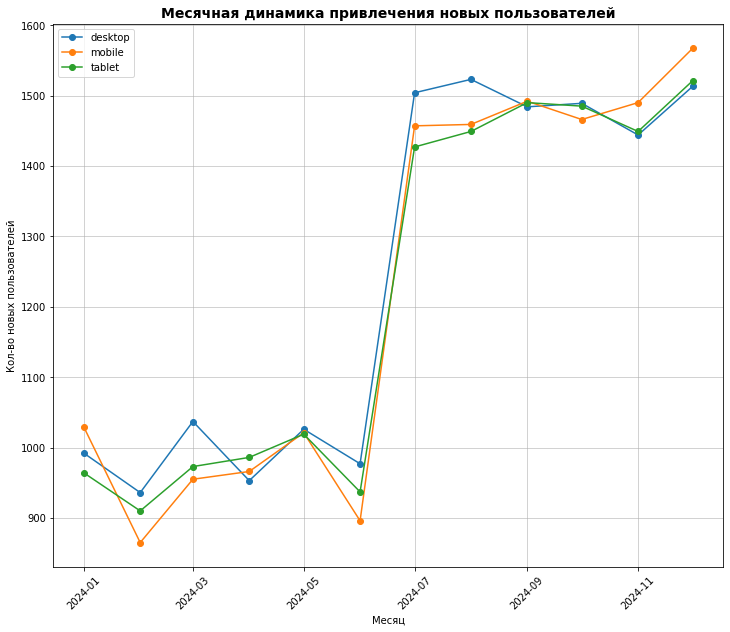

In [93]:
new_users = pa_diploma_users[pd.to_datetime(pa_diploma_users['registration_day']) <='2024-12-31'].groupby(['cohort_month',
            'device'])['user_id'].nunique().reset_index(name='new_users')

plt.figure(figsize=(12, 10))

for device in new_users['device'].unique():
    data = new_users[new_users['device'] == device]
    plt.plot(data['cohort_month'], data['new_users'], marker='o', label=device)

plt.title('Месячная динамика привлечения новых пользователей',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Кол-во новых пользователей')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

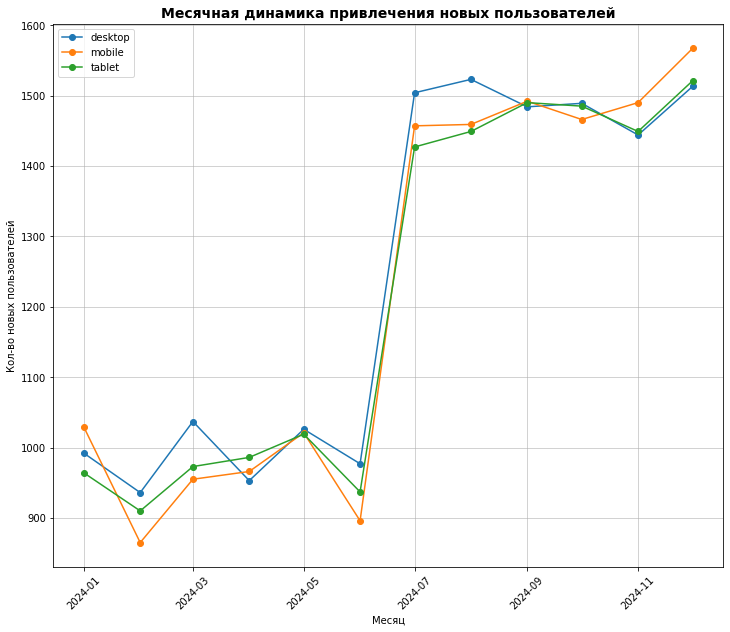

In [94]:
new_users = pa_diploma_users[pd.to_datetime(pa_diploma_users['registration_day']) <='2024-12-31'].groupby(['cohort_month',
            'device'])['user_id'].nunique().reset_index(name='new_users')

plt.figure(figsize=(12, 10))

for device in new_users['device'].unique():
    data = new_users[new_users['device'] == device]
    plt.plot(data['cohort_month'], data['new_users'], marker='o', label=device)

plt.title('Месячная динамика привлечения новых пользователей',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Кол-во новых пользователей')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

**Аномалии по сегментам.**

**Динамика привлечения новых пользователей:**

 - Наблюдается резкое увеличение количества новых пользователей у канала `'TikTok'`, резкое снижение количества новых пользователей у канала `'Google Ads'` в июле 2024 года. После 30 октрября 2024 года отсутствуют пользователи с канала `'Google Ads'`;
 - Отсутствие заметного роста у пользователей из городов Ростов-на-Дону, Новосибирск, Нижний Новгород, Краснодар, Екатеринбург;
 - Другие сегменты показывают схожие или аналогичные паттерны.

In [95]:
df_revenue = pa_diploma_users.merge(pa_diploma_orders[['user_id','revenue']], how='left', on='user_id')

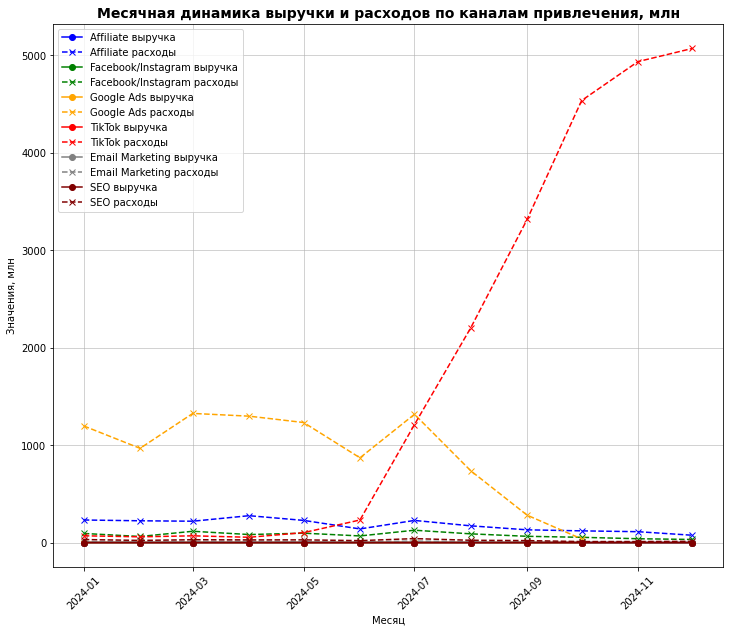

In [96]:
revenue_costs = df_revenue.merge(pa_diploma_campaign_costs, how='left', left_on=['cohort_month','acq_channel'], 
                                 right_on=['spend_month','acq_channel'])

revenue_costs = revenue_costs[revenue_costs['cohort_week']<'2024-12-30'].groupby(['cohort_month',
            'acq_channel']).agg(total_revenue=('revenue','sum'),total_cost=('budget','sum')).reset_index()

revenue_costs['total_revenue'] = round(revenue_costs['total_revenue']/1000000,2)
revenue_costs['total_cost'] = round(revenue_costs['total_cost']/1000000,2)

plt.figure(figsize=(12, 10))

channels_colors = {
   'Affiliate': 'blue',
   'Facebook/Instagram': 'green',
   'Google Ads': 'orange',
    'TikTok': 'red',
    'Email Marketing': 'grey',
    'SEO': 'maroon'
}

for channel, color in channels_colors.items():
    data = revenue_costs[revenue_costs['acq_channel'] == channel]
    plt.plot(data['cohort_month'], data['total_revenue'], marker='o', color=color, label=f'{channel} выручка')
    plt.plot(data['cohort_month'], data['total_cost'],linestyle='--', marker='x',color=color, label=f'{channel} расходы')

plt.title('Месячная динамика выручки и расходов по каналам привлечения, млн',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Значения, млн')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

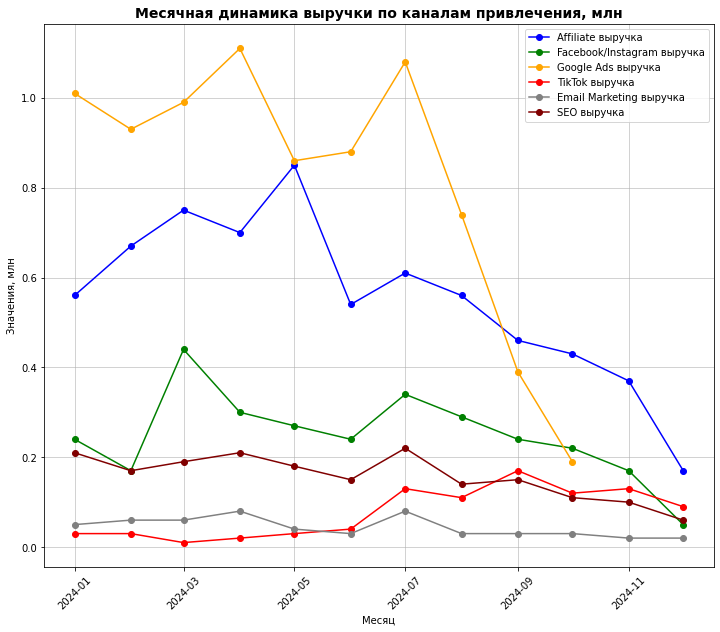

In [97]:

revenue_costs = df_revenue[df_revenue['cohort_week']<'2024-12-30'].groupby(['cohort_month',
            'acq_channel']).agg(total_revenue=('revenue','sum')).reset_index()

revenue_costs['total_revenue'] = round(revenue_costs['total_revenue']/1000000,2)

plt.figure(figsize=(12, 10))

channels_colors = {
   'Affiliate': 'blue',
   'Facebook/Instagram': 'green',
   'Google Ads': 'orange',
    'TikTok': 'red',
    'Email Marketing': 'grey',
    'SEO': 'maroon'
}

for channel, color in channels_colors.items():
    data = revenue_costs[revenue_costs['acq_channel'] == channel]
    plt.plot(data['cohort_month'], data['total_revenue'], marker='o', color=color, label=f'{channel} выручка')

plt.title('Месячная динамика выручки по каналам привлечения, млн',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Значения, млн')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

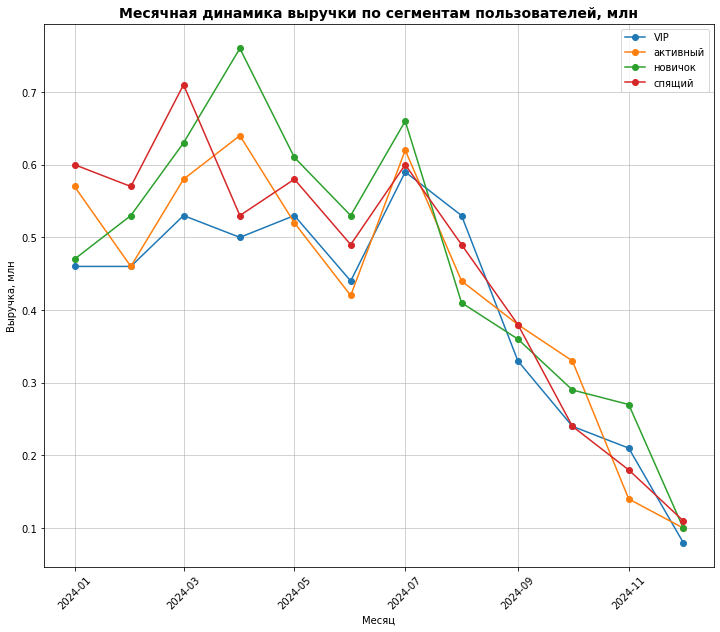

In [98]:
revenue = df_revenue[df_revenue['cohort_week']<'2024-12-30'].groupby(['cohort_month',
            'user_segment'])['revenue'].sum().reset_index(name='total_revenue')

revenue['total_revenue'] = round(revenue['total_revenue']/1000000,2)

plt.figure(figsize=(12, 10))

for segment in revenue['user_segment'].unique():
    data = revenue[revenue['user_segment'] == segment]
    plt.plot(data['cohort_month'], data['total_revenue'], marker='o', label=segment)

plt.title('Месячная динамика выручки по сегментам пользователей, млн',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Выручка, млн')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

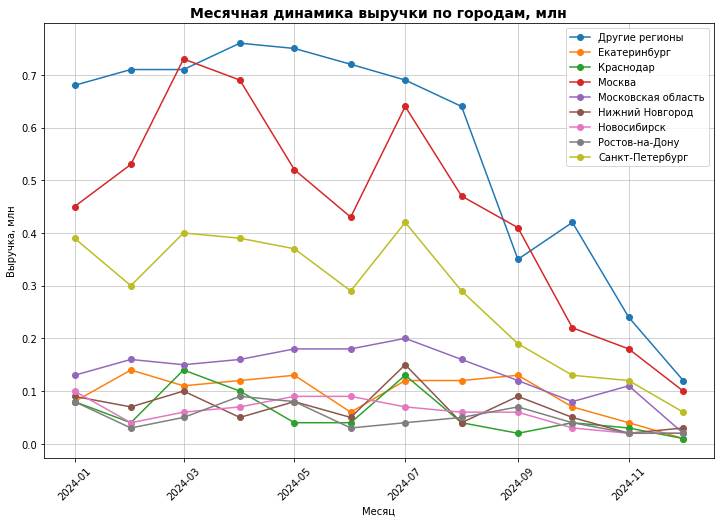

In [99]:
revenue = df_revenue[df_revenue['cohort_week']<'2024-12-30'].groupby(['cohort_month',
            'region'])['revenue'].sum().reset_index(name='total_revenue')

revenue['total_revenue'] = round(revenue['total_revenue']/1000000,2)

plt.figure(figsize=(12, 8))

for region in revenue['region'].unique():
    data = revenue[revenue['region'] == region]
    plt.plot(data['cohort_month'], data['total_revenue'], marker='o', label=region)

plt.title('Месячная динамика выручки по городам, млн',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Выручка, млн')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

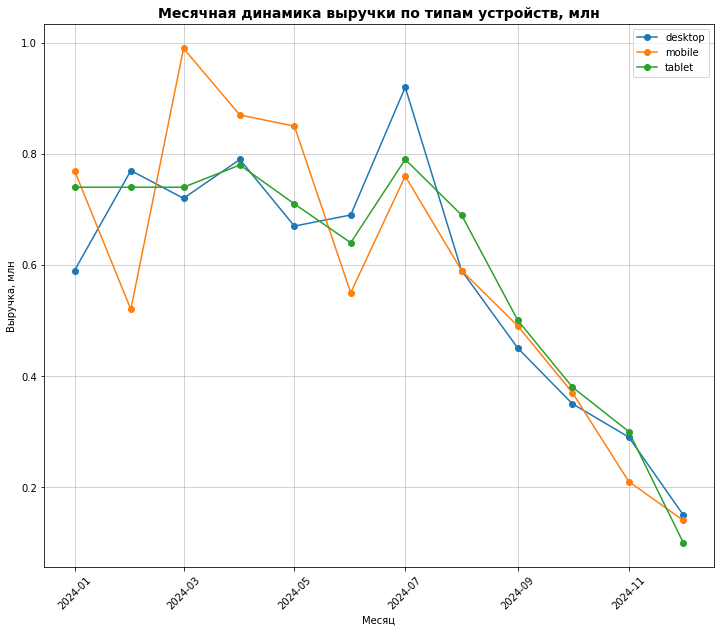

In [100]:
revenue = df_revenue[df_revenue['cohort_week']<'2024-12-30'].groupby(['cohort_month',
            'device'])['revenue'].sum().reset_index(name='total_revenue')

revenue['total_revenue'] = round(revenue['total_revenue']/1000000,2)

plt.figure(figsize=(12, 10))

for device in revenue['device'].unique():
    data = revenue[revenue['device'] == device]
    plt.plot(data['cohort_month'], data['total_revenue'], marker='o', label=device)

plt.title('Месячная динамика выручки по типам устройств, млн',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Выручка, млн')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

**Аномалии по сегментам.**

**Динамика выручки:**

 - Наблюдается резкое снижение выручки по пользователям с канала `'Google Ads'` в июле 2024 года, а также сильное снижение  выручки по пользователям с канала `'Affiliate'`, но выручка по пользователям с канала `'TikTok'` показала небольшой рост;
 - Наблюдается наиболее резкое снижение выручки по пользователям из регона `'Другие регионы'`, `'Москва'` и `'Санкт-Петербург'` с июля 2024 года, у остальных регионов общая тенденция по снижению выручки с июля 2024 года не так ярко выражена.
 - Наблюдаются провалы выручки по пользователям с мобильными устройствами в феврале и июне 2024 года и общее резкое падение с июля 2024 года.

In [101]:
funnel_order_merge = pa_diploma_orders.merge(pa_diploma_users[['user_id', 'cohort_month',
                    'acq_channel','user_segment','region','device']], how='left', on='user_id')

funnel_order_merge.head()

order_id  user_id          order_date       product_name  quantity  \
0         1        3 2024-01-19 01:52:52         Шуруповерт         2   
1         2        3 2024-01-19 01:52:52  Молоток слесарный         1   
2         3        3 2024-01-19 01:52:52    Секатор садовый         2   
3         4        3 2024-01-25 13:59:38         Шуруповерт         2   
4         5        3 2024-01-25 13:59:38         Чай черный         1   

   unit_price  total_price                    category_name order_week  \
0    5,539.13    11,078.26  Инструменты и садовый инвентарь 2024-01-15   
1   11,340.38    11,340.38  Инструменты и садовый инвентарь 2024-01-15   
2   10,892.09    21,784.18  Инструменты и садовый инвентарь 2024-01-15   
3    5,539.13    11,078.26  Инструменты и садовый инвентарь 2024-01-22   
4    2,099.59     2,099.59                 Продукты питания 2024-01-22   

  order_month first_order_month  n_period  revenue cohort_month acq_channel  \
0  2024-01-01        2024-01-01         0   553.91   2024-01-01  Google Ads   
1  2024-01-01        2024-01-01         0   567.02   2024-01-01  Google Ads   
2  2024-01-01        2024-01-01         0 1,089.21   2024-01-01  Google Ads   
3  2024-01-01        2024-01-01         0   553.91   2024-01-01  Google Ads   
4  2024-01-01        2024-01-01         0   104.98   2024-01-01  Google Ads   

  user_segment           region  device  
0          VIP  Санкт-Петербург  mobile  
1          VIP  Санкт-Петербург  mobile  
2          VIP  Санкт-Петербург  mobile  
3          VIP  Санкт-Петербург  mobile  
4          VIP  Санкт-Петербург  mobile

In [102]:
funnel_1_step = pa_diploma_users.groupby(['cohort_month','acq_channel'])['user_id'].nunique().reset_index(name='1_step')
funnel_1_step = funnel_1_step.rename(columns={'cohort_month':'month'})

funnel_order = funnel_order_merge.groupby(['cohort_month','acq_channel'])['user_id'].nunique().reset_index(name='purchase')
funnel_order = funnel_order.rename(columns={'cohort_month':'month'})

funnel_df = pd.merge(funnel_1_step, funnel_order, on=['month','acq_channel'], how='inner')

funnel_df['conversion_%'] = (funnel_df['purchase']/funnel_df['1_step']*100).round(1)

funnel_df.head()

month         acq_channel  1_step  purchase  conversion_%
0 2024-01-01           Affiliate     575       204         35.50
1 2024-01-01     Email Marketing     175        25         14.30
2 2024-01-01  Facebook/Instagram     406       117         28.80
3 2024-01-01          Google Ads    1119       388         34.70
4 2024-01-01                 SEO     316        86         27.20

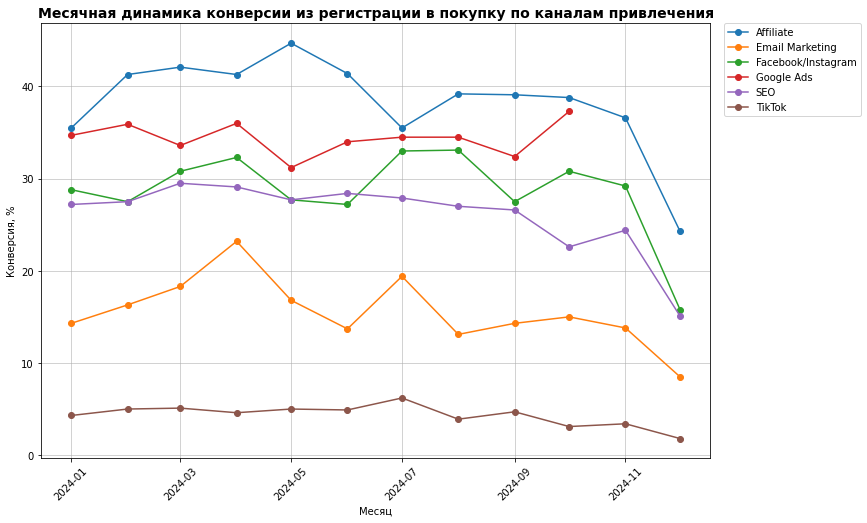

In [103]:
plt.figure(figsize=(12, 8))

for channel in funnel_df['acq_channel'].unique():
    data = funnel_df[funnel_df['acq_channel'] == channel]
    plt.plot(data['month'], data['conversion_%'], marker='o', label=channel)

plt.title('Месячная динамика конверсии из регистрации в покупку по каналам привлечения',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Конверсия, %')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

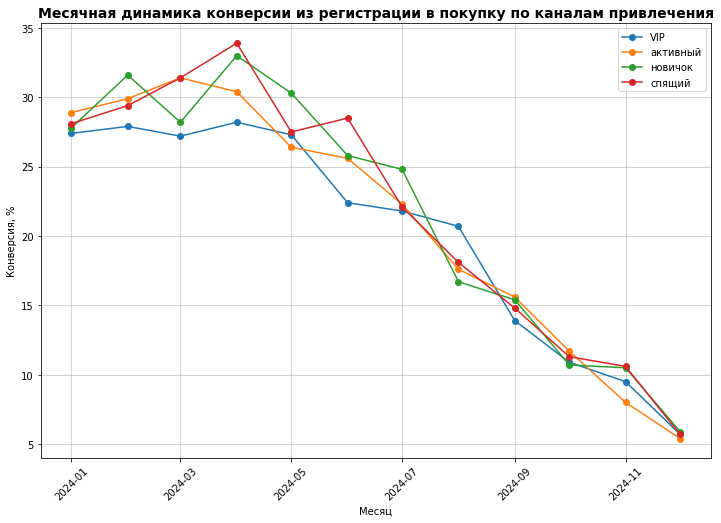

In [104]:
funnel_1_step = pa_diploma_users.groupby(['cohort_month','user_segment'])['user_id'].nunique().reset_index(name='1_step')
funnel_1_step = funnel_1_step.rename(columns={'cohort_month':'month'})

funnel_order = funnel_order_merge.groupby(['cohort_month','user_segment'])['user_id'].nunique().reset_index(name='purchase')
funnel_order = funnel_order.rename(columns={'cohort_month':'month'})

funnel_df = pd.merge(funnel_1_step, funnel_order, on=['month','user_segment'], how='inner')

funnel_df['conversion_%'] = (funnel_df['purchase']/funnel_df['1_step']*100).round(1)

plt.figure(figsize=(12, 8))

for segment in funnel_df['user_segment'].unique():
    data = funnel_df[funnel_df['user_segment'] == segment]
    plt.plot(data['month'], data['conversion_%'], marker='o', label=segment)

plt.title('Месячная динамика конверсии из регистрации в покупку по каналам привлечения',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Конверсия, %')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

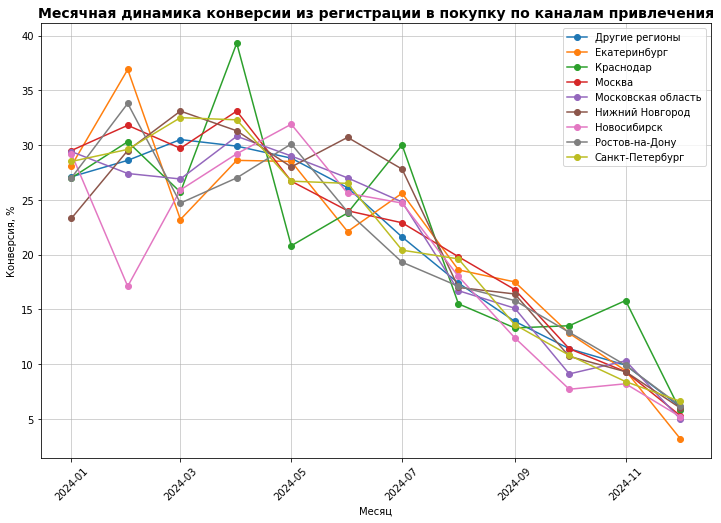

In [105]:
funnel_1_step = pa_diploma_users.groupby(['cohort_month','region'])['user_id'].nunique().reset_index(name='1_step')
funnel_1_step = funnel_1_step.rename(columns={'cohort_month':'month'})

funnel_order = funnel_order_merge.groupby(['cohort_month','region'])['user_id'].nunique().reset_index(name='purchase')
funnel_order = funnel_order.rename(columns={'cohort_month':'month'})

funnel_df = pd.merge(funnel_1_step, funnel_order, on=['month','region'], how='inner')

funnel_df['conversion_%'] = (funnel_df['purchase']/funnel_df['1_step']*100).round(1)

plt.figure(figsize=(12, 8))

for region in funnel_df['region'].unique():
    data = funnel_df[funnel_df['region'] == region]
    plt.plot(data['month'], data['conversion_%'], marker='o', label=region)

plt.title('Месячная динамика конверсии из регистрации в покупку по каналам привлечения',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Конверсия, %')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

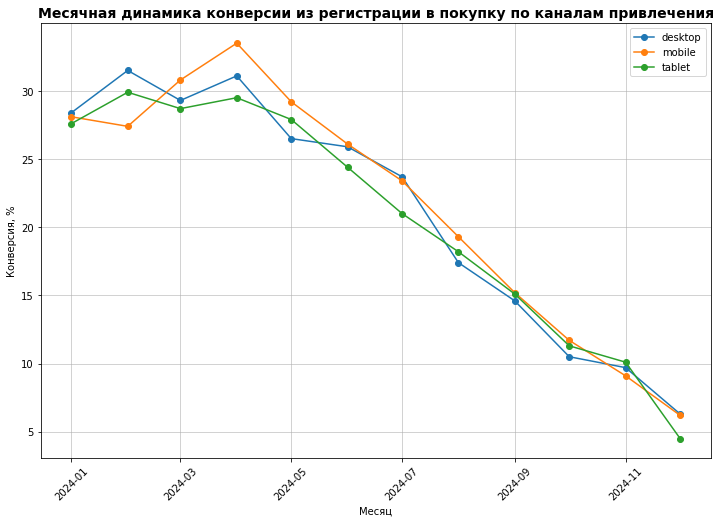

In [106]:
funnel_1_step = pa_diploma_users.groupby(['cohort_month','device'])['user_id'].nunique().reset_index(name='1_step')
funnel_1_step = funnel_1_step.rename(columns={'cohort_month':'month'})

funnel_order = funnel_order_merge.groupby(['cohort_month','device'])['user_id'].nunique().reset_index(name='purchase')
funnel_order = funnel_order.rename(columns={'cohort_month':'month'})

funnel_df = pd.merge(funnel_1_step, funnel_order, on=['month','device'], how='inner')

funnel_df['conversion_%'] = (funnel_df['purchase']/funnel_df['1_step']*100).round(1)

plt.figure(figsize=(12, 8))

for device in funnel_df['device'].unique():
    data = funnel_df[funnel_df['device'] == device]
    plt.plot(data['month'], data['conversion_%'], marker='o', label=device)

plt.title('Месячная динамика конверсии из регистрации в покупку по каналам привлечения',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Конверсия, %')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

**Аномалии по сегментам.**

**Конверсия из регистрации в покупку:**

 - Наблюдается резкое увеличение конверсии у пользователей с канала `'Google Ads'` в сентябре 2024 года, у пользоватлей с  остальных каналов наблюдается небольшая негативная тенденция по уменьшению конверсии, которая ускоряется ближе к концу года, кроме как у пользователей с канала `'TikTok'` - конверсия осталась без изменений на самом низком уровне.

In [107]:
revenue_df_acq = funnel_order_merge.groupby(['order_month','acq_channel']).agg(total_revenue=('revenue', 'sum'),
                AOV=('total_price','mean'), paid_users=('user_id','nunique')).reset_index()
revenue_df_acq = revenue_df_acq.rename(columns={'order_month': 'month'})

total_users = pa_diploma_users.groupby(['cohort_month','acq_channel'])['user_id'].nunique().reset_index(name='total_users')
total_users = total_users.rename(columns={'cohort_month': 'month'})

revenue_df_acq = revenue_df_acq.merge(total_users, how='inner', on=['month','acq_channel'])

revenue_df_acq['ARPU'] = round(revenue_df_acq['total_revenue']/revenue_df_acq['total_users'],2)

revenue_df_acq['ARPPU'] = round(revenue_df_acq['total_revenue']/revenue_df_acq['paid_users'],2)

revenue_df_acq.head()

month         acq_channel  total_revenue       AOV  paid_users  \
0 2024-01-01           Affiliate     147,274.58 12,272.88         113   
1 2024-01-01     Email Marketing       5,765.98  9,609.97           8   
2 2024-01-01  Facebook/Instagram      85,130.12 14,805.24          57   
3 2024-01-01          Google Ads     312,299.19 13,788.04         204   
4 2024-01-01                 SEO      56,262.64 12,099.49          50   

   total_users   ARPU    ARPPU  
0          575 256.13 1,303.31  
1          175  32.95   720.75  
2          406 209.68 1,493.51  
3         1119 279.09 1,530.88  
4          316 178.05 1,125.25

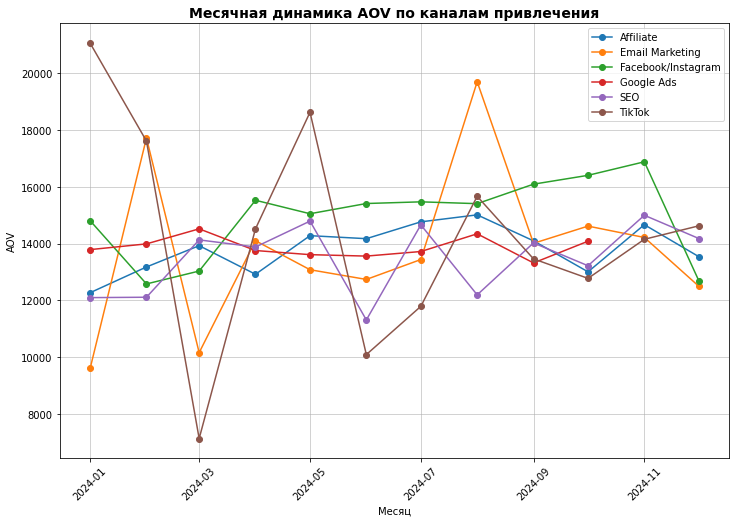

In [108]:
plt.figure(figsize=(12, 8))

for channel in revenue_df_acq['acq_channel'].unique():
    data = revenue_df_acq[revenue_df_acq['acq_channel'] == channel]
    plt.plot(data['month'], data['AOV'], marker='o', label=channel)
    
plt.title('Месячная динамика AOV по каналам привлечения',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('AOV')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

In [109]:
revenue_df_user = funnel_order_merge.groupby(['order_month','user_segment']).agg(total_revenue=('revenue', 'sum'),
                AOV=('total_price','mean'), paid_users=('user_id','nunique')).reset_index()
revenue_df_user = revenue_df_user.rename(columns={'order_month': 'month'})

total_users = pa_diploma_users.groupby(['cohort_month','user_segment'])['user_id'].nunique().reset_index(name='total_users')
total_users = total_users.rename(columns={'cohort_month': 'month'})

revenue_df_user = revenue_df_user.merge(total_users, how='inner', on=['month','user_segment'])

revenue_df_user['ARPU'] = round(revenue_df_user['total_revenue']/revenue_df_user['total_users'],2)

revenue_df_user['ARPPU'] = round(revenue_df_user['total_revenue']/revenue_df_user['paid_users'],2)

revenue_df_user.head()

month user_segment  total_revenue       AOV  paid_users  total_users  \
0 2024-01-01          VIP     164,808.67 13,508.91         112          722   
1 2024-01-01     активный     170,479.70 15,020.24         108          724   
2 2024-01-01      новичок     122,716.20 11,415.46         102          753   
3 2024-01-01       спящий     159,252.11 13,439.00         117          786   
4 2024-02-01          VIP     277,377.47 13,145.85         185          667   

    ARPU    ARPPU  
0 228.27 1,471.51  
1 235.47 1,578.52  
2 162.97 1,203.10  
3 202.61 1,361.13  
4 415.86 1,499.34

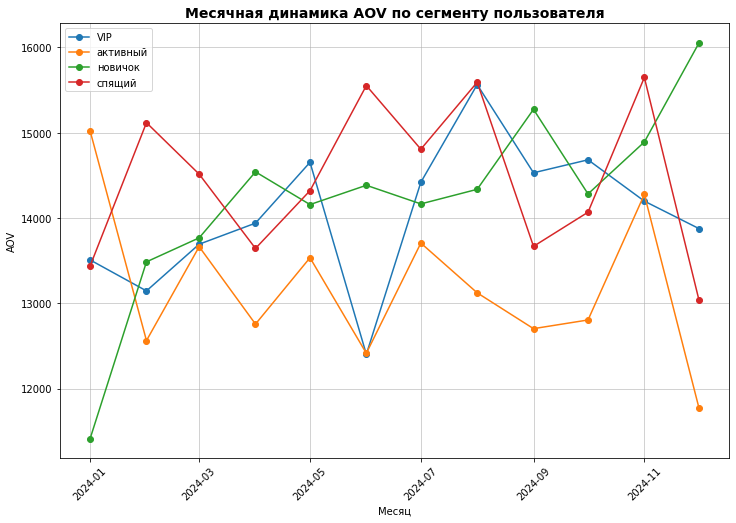

In [110]:
plt.figure(figsize=(12, 8))

for segment in revenue_df_user['user_segment'].unique():
    data = revenue_df_user[revenue_df_user['user_segment'] == segment]
    plt.plot(data['month'], data['AOV'], marker='o', label=segment)
    
plt.title('Месячная динамика AOV по сегменту пользователя',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('AOV')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

In [111]:
revenue_df_region = funnel_order_merge.groupby(['order_month','region']).agg(total_revenue=('revenue', 'sum'),
                AOV=('total_price','mean'), paid_users=('user_id','nunique')).reset_index()
revenue_df_region = revenue_df_region.rename(columns={'order_month': 'month'})

total_users = pa_diploma_users.groupby(['cohort_month','region'])['user_id'].nunique().reset_index(name='total_users')
total_users = total_users.rename(columns={'cohort_month': 'month'})

revenue_df_region = revenue_df_region.merge(total_users, how='inner', on=['month','region'])

revenue_df_region['ARPU'] = round(revenue_df_region['total_revenue']/revenue_df_region['total_users'],2)

revenue_df_region['ARPPU'] = round(revenue_df_region['total_revenue']/revenue_df_region['paid_users'],2)

revenue_df.head()

month  total_revenue       AOV  paid_users  total_users  total_costs  \
0 2024-01-01           0.62 13,375.01         439         1102         1.18   
1 2024-02-01           1.24 13,562.50         804         2079         1.06   
2 2024-03-01           1.86 13,920.37        1128         2753         1.17   
3 2024-04-01           2.07 13,714.40        1287         2961         1.15   
4 2024-05-01           2.39 14,145.67        1362         3220         1.23   

    ARPU    ARPPU  profit_ml  
0 560.12 1,406.05      -0.56  
1 595.60 1,540.12       0.18  
2 674.53 1,646.26       0.69  
3 699.62 1,609.60       0.92  
4 743.53 1,757.82       1.17

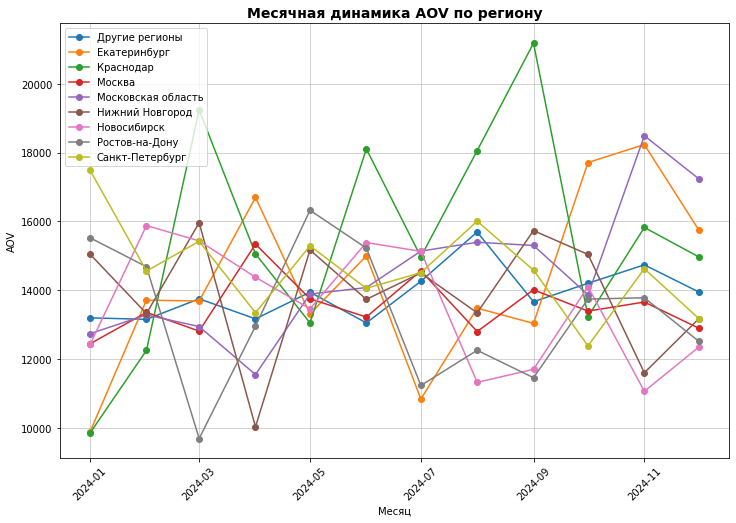

In [112]:
plt.figure(figsize=(12, 8))

for region in revenue_df_region['region'].unique():
    data = revenue_df_region[revenue_df_region['region'] == region]
    plt.plot(data['month'], data['AOV'], marker='o', label=region)
    
plt.title('Месячная динамика AOV по региону',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('AOV')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

In [113]:
revenue_df = funnel_order_merge.groupby(['order_month','device']).agg(total_revenue=('revenue', 'sum'),
                AOV=('total_price','mean'), paid_users=('user_id','nunique')).reset_index()
revenue_df = revenue_df.rename(columns={'order_month': 'month'})

total_users = pa_diploma_users.groupby(['cohort_month','device'])['user_id'].nunique().reset_index(name='total_users')
total_users = total_users.rename(columns={'cohort_month': 'month'})

revenue_df = revenue_df.merge(total_users, how='inner', on=['month','device'])

revenue_df['ARPU'] = round(revenue_df['total_revenue']/revenue_df['total_users'],2)

revenue_df['ARPPU'] = round(revenue_df['total_revenue']/revenue_df['paid_users'],2)

revenue_df.head()

month   device  total_revenue       AOV  paid_users  total_users  \
0 2024-01-01  desktop     174,287.62 11,736.54         154          992   
1 2024-01-01   mobile     254,731.23 13,996.22         153         1029   
2 2024-01-01   tablet     188,237.84 14,369.30         132          964   
3 2024-02-01  desktop     433,365.19 13,437.68         287          936   
4 2024-02-01   mobile     381,986.78 13,915.73         242          865   

    ARPU    ARPPU  
0 175.69 1,131.74  
1 247.55 1,664.91  
2 195.27 1,426.04  
3 463.00 1,509.98  
4 441.60 1,578.46

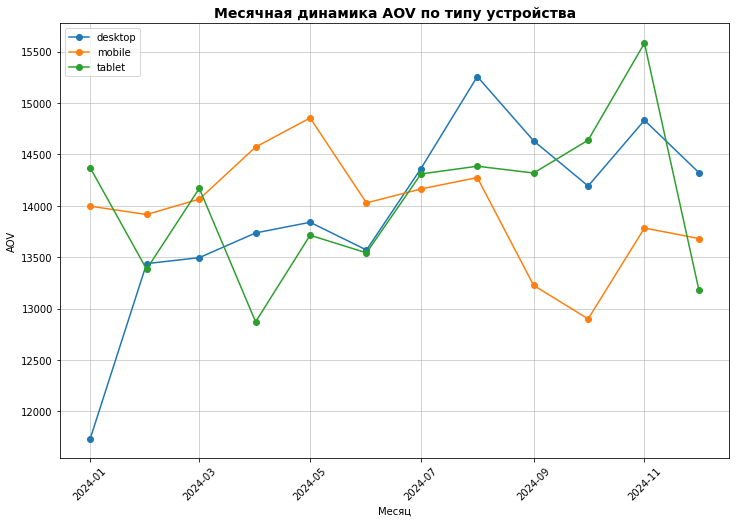

In [114]:
plt.figure(figsize=(12, 8))

for device in revenue_df['device'].unique():
    data = revenue_df[revenue_df['device'] == device]
    plt.plot(data['month'], data['AOV'], marker='o', label=device)
    
plt.title('Месячная динамика AOV по типу устройства',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('AOV')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

**Аномалии по сегментам.**

**Динамика среднего чека (`'AOV'`):**

 - Наблюдаются резкие скачки значений у пользователей с канала `'TikTok'` с общим негативным трендом, нестабильный рост с резкими скачками показывает метрика у пользователей с канала `'Email Marketing'`, размер среднего чека показывает рост до октбяря 2024 года у пользователей с канала `'Facebook/Instagram'`
 - Рост значений показывают пользователи, открывающие маркетплейс с компьютера, ухудшение метрики показывают пользователи мобильных устройств.

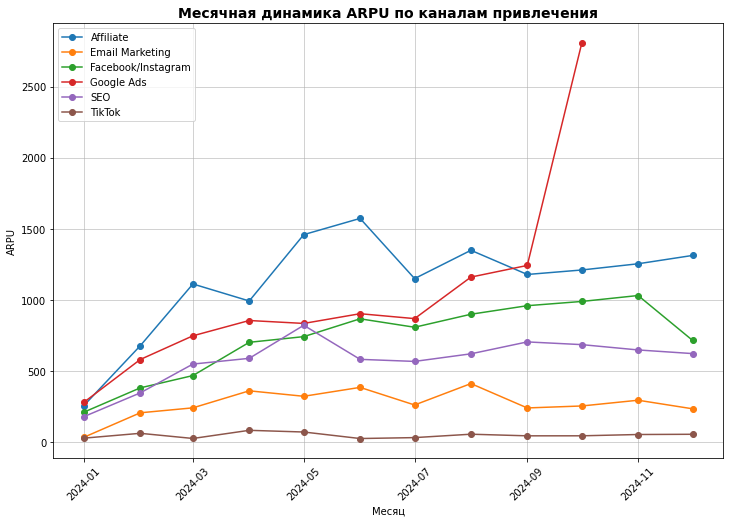

In [115]:
plt.figure(figsize=(12, 8))

for channel in revenue_df_acq['acq_channel'].unique():
    data = revenue_df_acq[revenue_df_acq['acq_channel'] == channel]
    plt.plot(data['month'], data['ARPU'], marker='o', label=channel)
    
plt.title('Месячная динамика ARPU по каналам привлечения',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('ARPU')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

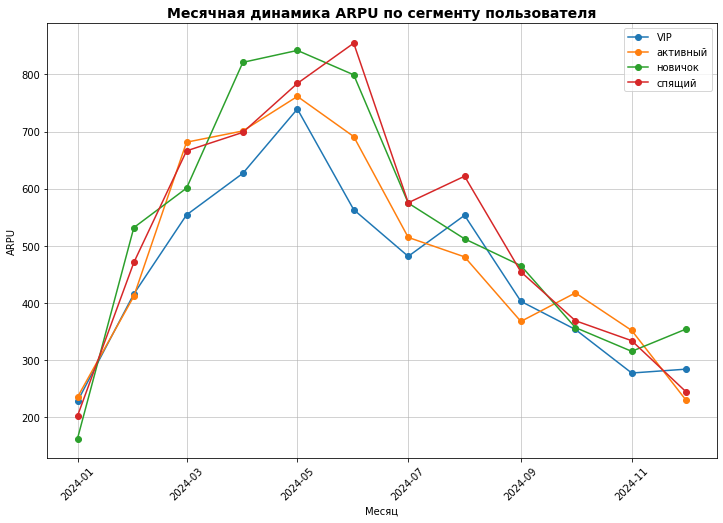

In [116]:
plt.figure(figsize=(12, 8))

for segment in revenue_df_user['user_segment'].unique():
    data = revenue_df_user[revenue_df_user['user_segment'] == segment]
    plt.plot(data['month'], data['ARPU'], marker='o', label=segment)
    
plt.title('Месячная динамика ARPU по сегменту пользователя',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('ARPU')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

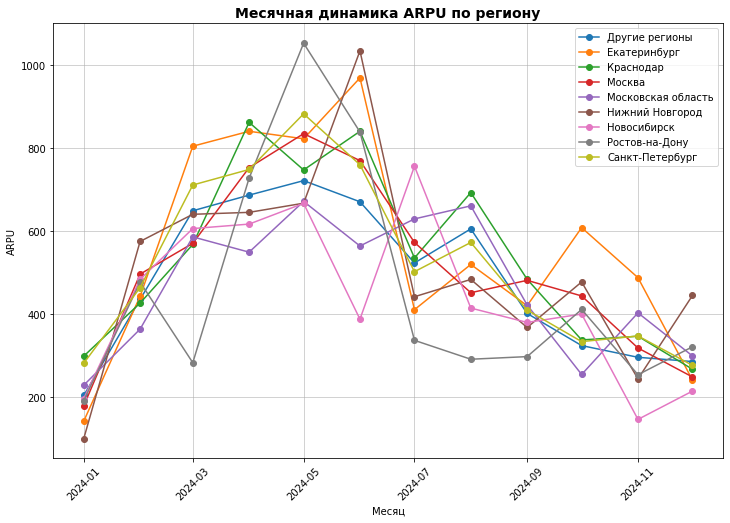

In [117]:
plt.figure(figsize=(12, 8))

for region in revenue_df_region['region'].unique():
    data = revenue_df_region[revenue_df_region['region'] == region]
    plt.plot(data['month'], data['ARPU'], marker='o', label=region)
    
plt.title('Месячная динамика ARPU по региону',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('ARPU')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

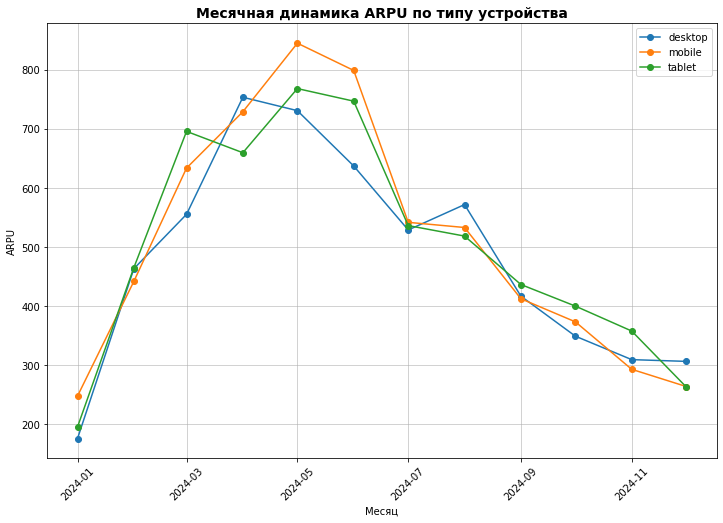

In [118]:
plt.figure(figsize=(12, 8))

for device in revenue_df['device'].unique():
    data = revenue_df[revenue_df['device'] == device]
    plt.plot(data['month'], data['ARPU'], marker='o', label=device)
    
plt.title('Месячная динамика ARPU по типу устройства',fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('ARPU')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

**Аномалии по сегментам.**

**Динамика среднего дохода на пользователя (`'ARPU'`):**

 - Наблюдается медленный рост до сентбяря 2024 года и резкий скачок значений у пользователей с канала `'Google Ads'` в октябре 2024 года, общая положительная тенденция наблюдается у всех каналов, кроме `'TikTok'` (значений остаются неизменными) и резкое падение у канала `'Facebook/Instagram'` в декабре 2024 года.

**По результатам рассмотрения ключевых и вспомогательных метрик, сфокусируемся на анализе в разрезе канала привлечения (`'TikTok'`, `'Google Ads'`, `'Facebook/Instagram'` и `'Affiliate'`) по метрикам `'Retention'`, `'LTV'`, `'CAC'` и `'ROI'`**

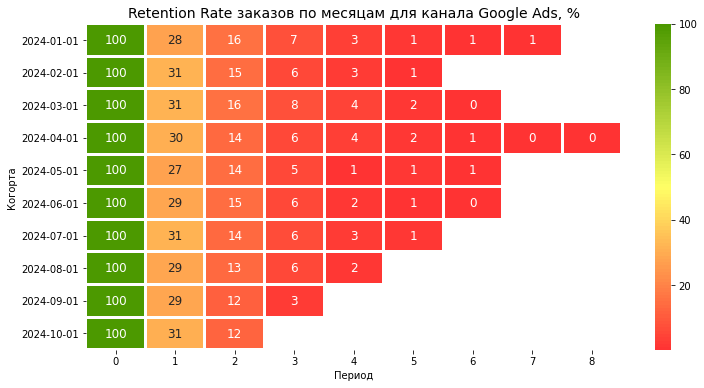

In [119]:
# 'Google Ads'

cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)
funnel_order_merge['cohort_month'] = funnel_order_merge['cohort_month'].astype('str')


df_pivot = funnel_order_merge[funnel_order_merge['acq_channel']=='Google Ads'].pivot_table(index='cohort_month', 
                            columns='n_period', values='user_id', aggfunc='nunique')

df_pivot_retention = df_pivot.div(df_pivot[0], axis=0) * 100

plt.figure(figsize=(12, 6))

sns.heatmap(df_pivot_retention, cmap=cmap, annot=True, fmt='.0f', linewidths=2, annot_kws={"size": 12})

plt.title('Retention Rate заказов по месяцам для канала Google Ads, %', fontsize=14)
plt.xlabel('Период')
plt.ylabel('Когорта')

plt.show()

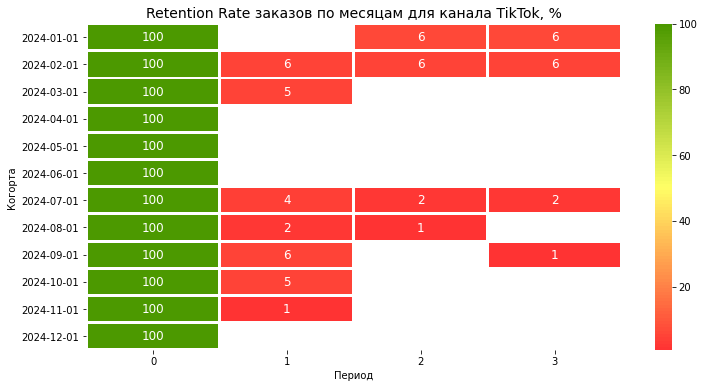

In [120]:
# 'TikTok'

cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)
funnel_order_merge['cohort_month'] = funnel_order_merge['cohort_month'].astype('str')


df_pivot = funnel_order_merge[funnel_order_merge['acq_channel']=='TikTok'].pivot_table(index='cohort_month', 
                            columns='n_period', values='user_id', aggfunc='nunique')

df_pivot_retention = df_pivot.div(df_pivot[0], axis=0) * 100

plt.figure(figsize=(12, 6))

sns.heatmap(df_pivot_retention, cmap=cmap, annot=True, fmt='.0f', linewidths=2, annot_kws={"size": 12})

plt.title('Retention Rate заказов по месяцам для канала TikTok, %', fontsize=14)
plt.xlabel('Период')
plt.ylabel('Когорта')

plt.show()

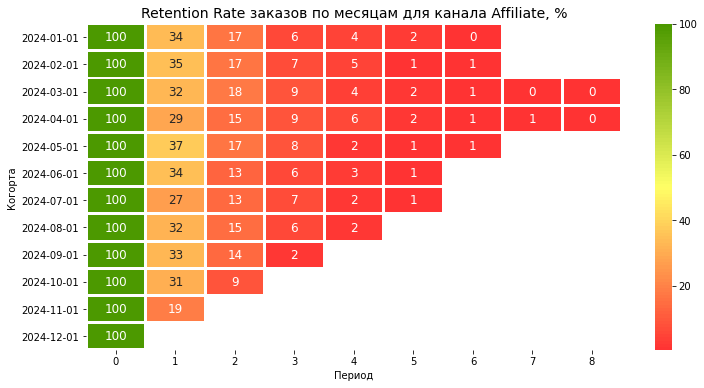

In [121]:
# 'Affiliate'

cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)
funnel_order_merge['cohort_month'] = funnel_order_merge['cohort_month'].astype('str')


df_pivot = funnel_order_merge[funnel_order_merge['acq_channel']=='Affiliate'].pivot_table(index='cohort_month', 
                            columns='n_period', values='user_id', aggfunc='nunique')

df_pivot_retention = df_pivot.div(df_pivot[0], axis=0) * 100

plt.figure(figsize=(12, 6))

sns.heatmap(df_pivot_retention, cmap=cmap, annot=True, fmt='.0f', linewidths=2, annot_kws={"size": 12})

plt.title('Retention Rate заказов по месяцам для канала Affiliate, %', fontsize=14)
plt.xlabel('Период')
plt.ylabel('Когорта')

plt.show()

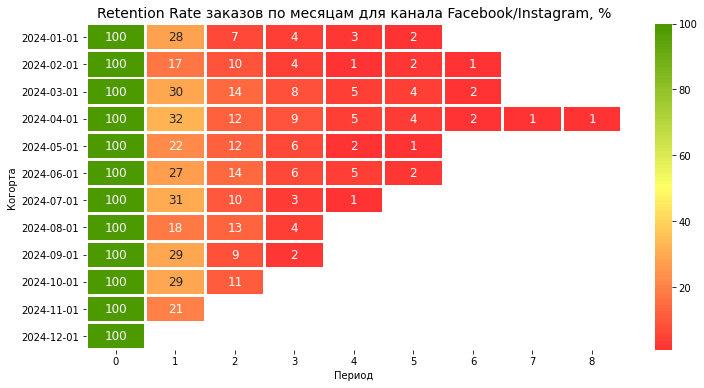

In [122]:
# 'Facebook/Instagram'

cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)
funnel_order_merge['cohort_month'] = funnel_order_merge['cohort_month'].astype('str')


df_pivot = funnel_order_merge[funnel_order_merge['acq_channel']=='Facebook/Instagram'].pivot_table(index='cohort_month', 
                            columns='n_period', values='user_id', aggfunc='nunique')

df_pivot_retention = df_pivot.div(df_pivot[0], axis=0) * 100

plt.figure(figsize=(12, 6))

sns.heatmap(df_pivot_retention, cmap=cmap, annot=True, fmt='.0f', linewidths=2, annot_kws={"size": 12})

plt.title('Retention Rate заказов по месяцам для канала Facebook/Instagram, %', fontsize=14)
plt.xlabel('Период')
plt.ylabel('Когорта')

plt.show()

**Retention Rate:**

Пользователи с канала `'TikTok'` показывают наихудшие результаты по удержанию, по остальным каналам результаты схожие.

In [123]:
funnel_events_merge = pa_diploma_events.merge(pa_diploma_users[['user_id',
                    'acq_channel']], how='left', on='user_id')

funnel_events_merge.head()

event_id  session_id  user_id          event_date      event_type   os  \
0      3132         479      100 2024-01-01 15:23:56       page_view  iOS   
1      3133         479      100 2024-01-01 15:24:01    product_view  iOS   
2      3134         479      100 2024-01-01 15:24:10   product_click  iOS   
3      3135         479      100 2024-01-01 15:25:10     add_to_cart  iOS   
4      3136         479      100 2024-01-01 15:25:46  checkout_start  iOS   

   device  event_index user_segment          product_name event_week  \
0  mobile            1      regular                   NaN 2024-01-01   
1  mobile            2      regular  Шорты для тренировок 2024-01-01   
2  mobile            3      regular        Куртка детская 2024-01-01   
3  mobile            4      regular  Балетки классические 2024-01-01   
4  mobile            5      regular                   NaN 2024-01-01   

  event_month acq_channel  
0  2024-01-01   Affiliate  
1  2024-01-01   Affiliate  
2  2024-01-01   Affiliate  
3  2024-01-01   Affiliate  
4  2024-01-01   Affiliate

In [124]:
# 'Google Ads'
funnel_steps = ['page_view', 'product_view', 'product_click', 'add_to_cart', 'checkout_start', 'checkout_complete']

funnel_df_steps = funnel_events_merge[(funnel_events_merge['event_type'].isin(funnel_steps))&
                                     (funnel_events_merge['acq_channel']=='Google Ads')]

funnel_counts = funnel_df_steps.groupby('event_type')['user_id'].nunique().reindex(funnel_steps)

funnel_df = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts.values
})

funnel_df['conversion_from_first_%'] = (funnel_df['users']/funnel_df['users'].iloc[0]*100).round(1)
funnel_df['conversion_from_previous_%'] = (funnel_df['users']/funnel_df['users'].shift(1)*100).round(1)

funnel_df.head(8)

step  users  conversion_from_first_%  \
0          page_view   5611                   100.00   
1       product_view   5607                    99.90   
2      product_click   5561                    99.10   
3        add_to_cart   5344                    95.20   
4     checkout_start   4676                    83.30   
5  checkout_complete   4105                    73.20   

   conversion_from_previous_%  
0                         NaN  
1                       99.90  
2                       99.20  
3                       96.10  
4                       87.50  
5                       87.80

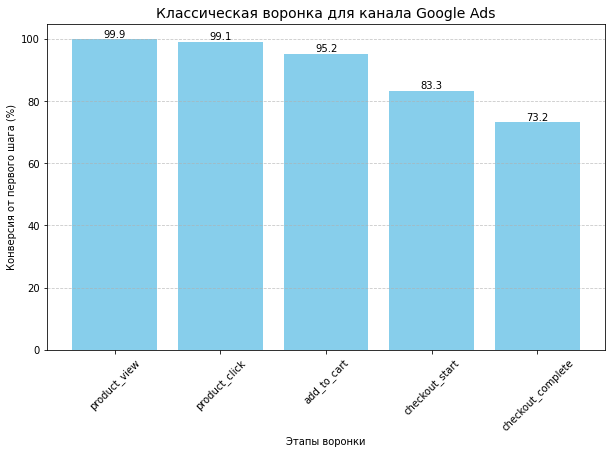

In [125]:
plt.figure(figsize=(10, 6))

plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_first_%'][1:], color='skyblue')

for i, v in enumerate(funnel_df['conversion_from_first_%'][1:]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Классическая воронка для канала Google Ads', fontsize=14)
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.grid(axis='x', linestyle='--')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

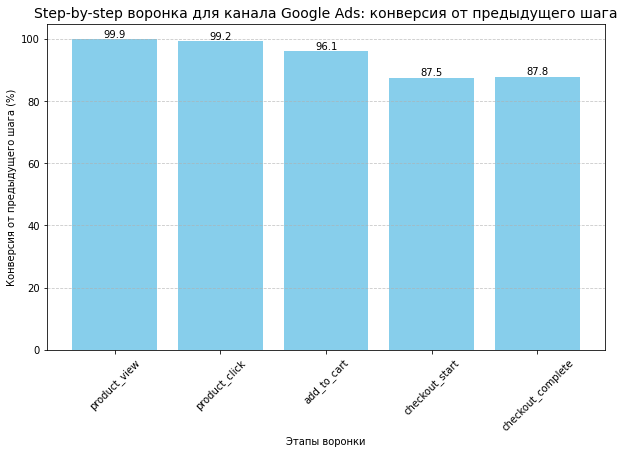

In [126]:
plt.figure(figsize=(10, 6))

plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_previous_%'][1:], color='skyblue')

for i, v in enumerate(funnel_df['conversion_from_previous_%'][1:]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Step-by-step воронка для канала Google Ads: конверсия от предыдущего шага', fontsize=14)
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.grid(axis='x', linestyle='--')
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [127]:
# 'TikTok'
funnel_steps = ['page_view', 'product_view', 'product_click', 'add_to_cart', 'checkout_start', 'checkout_complete']

funnel_df_steps = funnel_events_merge[(funnel_events_merge['event_type'].isin(funnel_steps))&
                                     (funnel_events_merge['acq_channel']=='TikTok')]

funnel_counts = funnel_df_steps.groupby('event_type')['user_id'].nunique().reindex(funnel_steps)

funnel_df = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts.values
})

funnel_df['conversion_from_first_%'] = (funnel_df['users']/funnel_df['users'].iloc[0]*100).round(1)
funnel_df['conversion_from_previous_%'] = (funnel_df['users']/funnel_df['users'].shift(1)*100).round(1)

funnel_df.head(8)

step  users  conversion_from_first_%  \
0          page_view   6651                   100.00   
1       product_view   6631                    99.70   
2      product_click   6438                    96.80   
3        add_to_cart   5649                    84.90   
4     checkout_start   3849                    57.90   
5  checkout_complete   2633                    39.60   

   conversion_from_previous_%  
0                         NaN  
1                       99.70  
2                       97.10  
3                       87.70  
4                       68.10  
5                       68.40

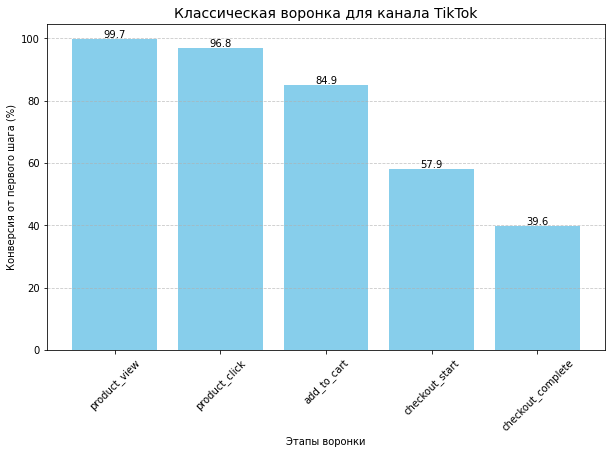

In [128]:
plt.figure(figsize=(10, 6))

plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_first_%'][1:], color='skyblue')

for i, v in enumerate(funnel_df['conversion_from_first_%'][1:]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Классическая воронка для канала TikTok', fontsize=14)
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.grid(axis='x', linestyle='--')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

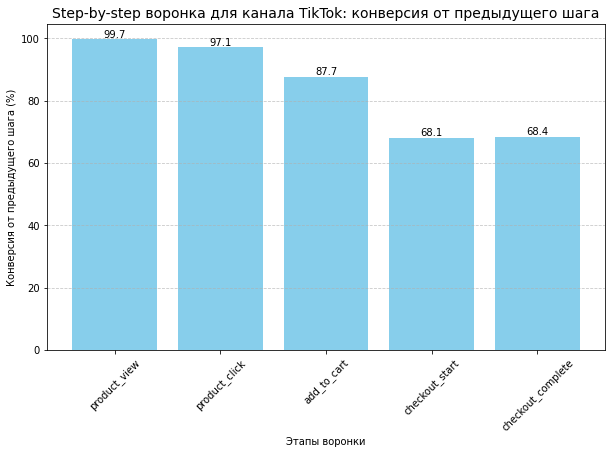

In [129]:
plt.figure(figsize=(10, 6))

plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_previous_%'][1:], color='skyblue')

for i, v in enumerate(funnel_df['conversion_from_previous_%'][1:]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Step-by-step воронка для канала TikTok: конверсия от предыдущего шага', fontsize=14)
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.grid(axis='x', linestyle='--')
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [130]:
# 'Facebook/Instagram'
funnel_steps = ['page_view', 'product_view', 'product_click', 'add_to_cart', 'checkout_start', 'checkout_complete']

funnel_df_steps = funnel_events_merge[(funnel_events_merge['event_type'].isin(funnel_steps))&
                                     (funnel_events_merge['acq_channel']=='Facebook/Instagram')]

funnel_counts = funnel_df_steps.groupby('event_type')['user_id'].nunique().reindex(funnel_steps)

funnel_df = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts.values
})

funnel_df['conversion_from_first_%'] = (funnel_df['users']/funnel_df['users'].iloc[0]*100).round(1)
funnel_df['conversion_from_previous_%'] = (funnel_df['users']/funnel_df['users'].shift(1)*100).round(1)

funnel_df.head(8)

step  users  conversion_from_first_%  \
0          page_view   2189                   100.00   
1       product_view   2189                   100.00   
2      product_click   2162                    98.80   
3        add_to_cart   2062                    94.20   
4     checkout_start   1734                    79.20   
5  checkout_complete   1467                    67.00   

   conversion_from_previous_%  
0                         NaN  
1                      100.00  
2                       98.80  
3                       95.40  
4                       84.10  
5                       84.60

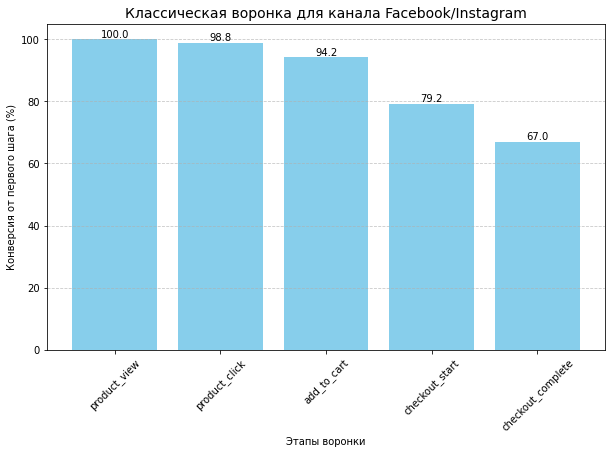

In [131]:
plt.figure(figsize=(10, 6))

plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_first_%'][1:], color='skyblue')

for i, v in enumerate(funnel_df['conversion_from_first_%'][1:]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Классическая воронка для канала Facebook/Instagram', fontsize=14)
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.grid(axis='x', linestyle='--')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

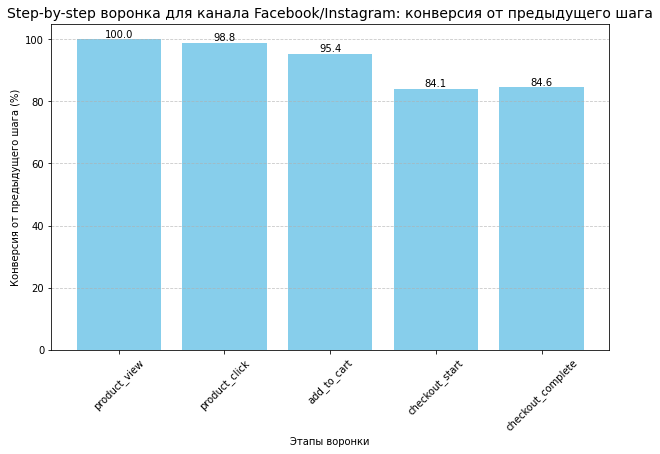

In [132]:
plt.figure(figsize=(10, 6))

plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_previous_%'][1:], color='skyblue')

for i, v in enumerate(funnel_df['conversion_from_previous_%'][1:]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Step-by-step воронка для канала Facebook/Instagram: конверсия от предыдущего шага', fontsize=14)
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.grid(axis='x', linestyle='--')
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [133]:
# 'Affiliate'
funnel_steps = ['page_view', 'product_view', 'product_click', 'add_to_cart', 'checkout_start', 'checkout_complete']

funnel_df_steps = funnel_events_merge[(funnel_events_merge['event_type'].isin(funnel_steps))&
                                     (funnel_events_merge['acq_channel']=='Affiliate')]

funnel_counts = funnel_df_steps.groupby('event_type')['user_id'].nunique().reindex(funnel_steps)

funnel_df = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts.values
})

funnel_df['conversion_from_first_%'] = (funnel_df['users']/funnel_df['users'].iloc[0]*100).round(1)
funnel_df['conversion_from_previous_%'] = (funnel_df['users']/funnel_df['users'].shift(1)*100).round(1)

funnel_df.head(8)

step  users  conversion_from_first_%  \
0          page_view   3676                   100.00   
1       product_view   3674                    99.90   
2      product_click   3638                    99.00   
3        add_to_cart   3531                    96.10   
4     checkout_start   3136                    85.30   
5  checkout_complete   2774                    75.50   

   conversion_from_previous_%  
0                         NaN  
1                       99.90  
2                       99.00  
3                       97.10  
4                       88.80  
5                       88.50

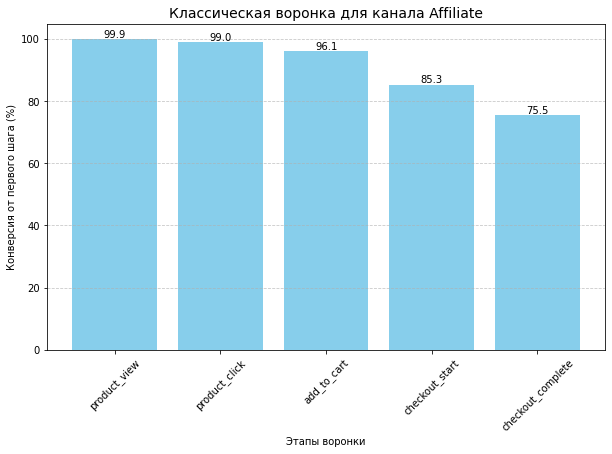

In [134]:
plt.figure(figsize=(10, 6))

plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_first_%'][1:], color='skyblue')

for i, v in enumerate(funnel_df['conversion_from_first_%'][1:]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Классическая воронка для канала Affiliate', fontsize=14)
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.grid(axis='x', linestyle='--')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

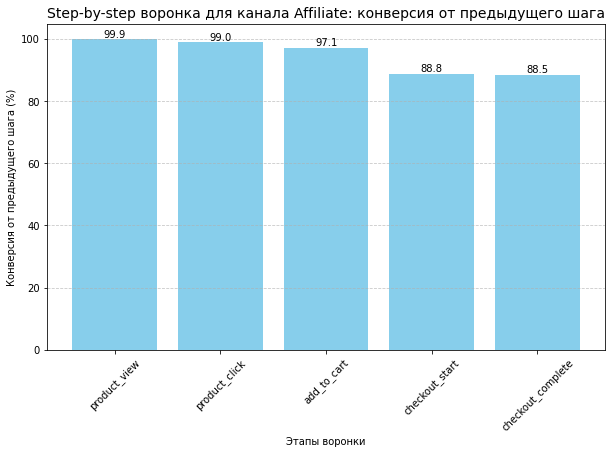

In [135]:
plt.figure(figsize=(10, 6))

plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_previous_%'][1:], color='skyblue')

for i, v in enumerate(funnel_df['conversion_from_previous_%'][1:]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Step-by-step воронка для канала Affiliate: конверсия от предыдущего шага', fontsize=14)
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.grid(axis='x', linestyle='--')
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

**Воронка конверсии от первого посещения до завершения оформления заказа:**

Проблемы с конверсией показывают пользователи с канала `'TikTok'`: в класической воронке - на шаге начало оформления заказа (58%) и окончание оформления заказа (40%), в воронке `'step-by-step'` - на шаге начало оформления заказа (68%) и окончание оформления заказа (68%).

In [136]:
raw_ltv = pa_diploma_orders_merge.sort_values(by=['user_id', 'cohort_month'])
raw_ltv = raw_ltv.groupby(['cohort_month','acq_channel'])['revenue'].sum().reset_index(name='total_revenue')

total_users = pa_diploma_users.groupby(['cohort_month','acq_channel'])['user_id'].nunique().reset_index(name='total_users')

costs = pa_diploma_campaign_costs.groupby(['spend_month', 'acq_channel'])['budget'].sum().reset_index(name='total_costs')
costs = costs.rename(columns={'spend_month': 'cohort_month'})

ltv_df = raw_ltv.merge(total_users, how='inner', on=['cohort_month','acq_channel'])
ltv_df = ltv_df.merge(costs, how='inner', on=['cohort_month','acq_channel'])

ltv_df = ltv_df.assign(LTV=lambda x: x['total_revenue']/x['total_users'],CAC=lambda x: x['total_costs']/x['total_users'],
         ROI = lambda x: (x['LTV']-x['CAC'])/x['CAC']*100)

ltv_df.head()

cohort_month         acq_channel  total_revenue  total_users  total_costs  \
0   2024-01-01           Affiliate     557,986.88          575   179,343.39   
1   2024-01-01     Email Marketing      53,930.00          175    44,263.61   
2   2024-01-01  Facebook/Instagram     240,774.27          406   152,268.48   
3   2024-01-01          Google Ads   1,008,161.81         1119   559,875.81   
4   2024-01-01                 SEO     209,583.39          316    59,683.73   

     LTV    CAC    ROI  
0 970.41 311.90 211.13  
1 308.17 252.93  21.84  
2 593.04 375.05  58.12  
3 900.95 500.34  80.07  
4 663.24 188.87 251.16

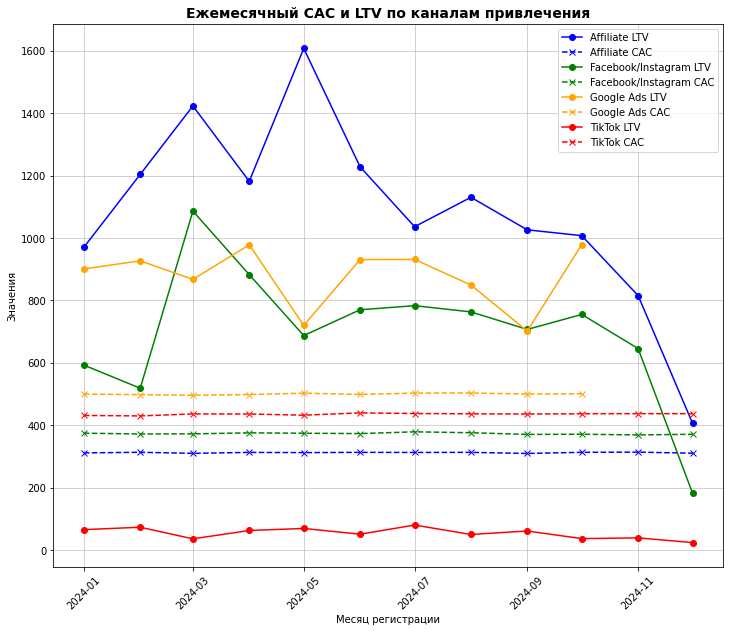

In [137]:
plt.figure(figsize=(12, 10))

channels_colors = {
   'Affiliate': 'blue',
   'Facebook/Instagram': 'green',
   'Google Ads': 'orange',
   'TikTok': 'red'
}

for channel, color in channels_colors.items():
    data = ltv_df[ltv_df['acq_channel'] == channel]
    plt.plot(data['cohort_month'], data['LTV'], marker='o', color=color, label=f'{channel} LTV')
    plt.plot(data['cohort_month'], data['CAC'],  marker='x',color=color, linestyle='--', label=f'{channel} CAC')

plt.title('Ежемесячный CAC и LTV по каналам привлечения',fontsize=14, fontweight='bold')
plt.xlabel('Месяц регистрации')
plt.ylabel('Значения')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.show()

**Ежемесячный `'LTV'` и `'CAC'`:**

Наиболее убыточен канал `'TikTok'`, значения `'LTV'` находятся значительно ниже `'CAC'`, также негативную тенденцию (пересечение точки окупаемости) показывают каналы `'Facebook/Instagram'` и `'Affiliate'` в декабре 2024 года.

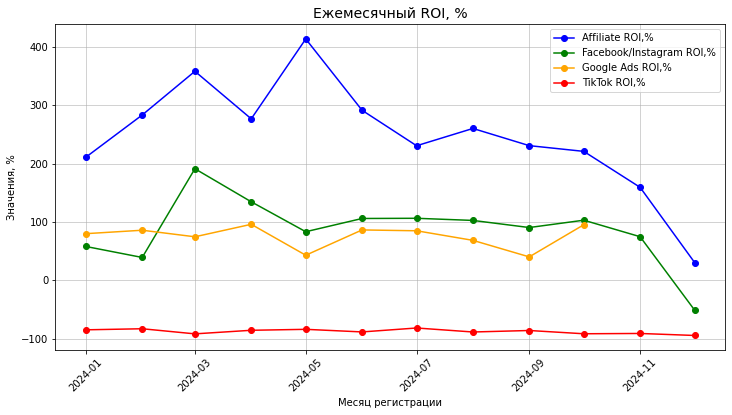

In [138]:
plt.subplots(figsize=(12,6))
for channel, color in channels_colors.items():
    data = ltv_df[ltv_df['acq_channel'] == channel]
    plt.plot(data['cohort_month'], data['ROI'], marker='o', color=color, label=f'{channel} ROI,%')

plt.title('Ежемесячный ROI, %', fontsize=14)
plt.xlabel('Месяц регистрации')
plt.ylabel('Значения, %')
plt.xticks(rotation=45)
plt.grid(alpha=0.7)
plt.legend()
plt.show()

**Ежемесячный `'ROI'`:**

Наиболее убыточен канал `'TikTok'`, его значения `'ROI'` находятся ниже нуля, наилучшую прибыльность показывает канал `'Affiliate'`, но и там прослеживается спад в ноябре-декабре 2024 года. Канал `'Google Ads'` показывается стабльный уровень метрики на протяжении всего периода наблюдений.

In [139]:
raw_ltv_2 = pa_diploma_orders_merge.sort_values(by=['user_id', 'cohort_month'])
raw_ltv_2 = (raw_ltv_2.groupby(['cohort_month','n_period', 'acq_channel'])['revenue'].sum()
             .reset_index(name='period_revenue').sort_values(['cohort_month','acq_channel','n_period']))

raw_ltv_2['total_revenue'] = raw_ltv_2.groupby(['cohort_month','acq_channel'])['period_revenue'].cumsum()

total_users = pa_diploma_users.groupby(['cohort_month','acq_channel'])['user_id'].nunique().reset_index(name='total_users')

costs = pa_diploma_campaign_costs.groupby(['spend_month', 'acq_channel'])['budget'].sum().reset_index(name='total_costs')
costs = costs.rename(columns={'spend_month': 'cohort_month'})

ltv_df_2 = raw_ltv_2.merge(total_users, how='inner', on=['cohort_month','acq_channel'])
ltv_df_2 = ltv_df_2.merge(costs, how='inner', on=['cohort_month','acq_channel'])

ltv_df_2 = ltv_df_2.assign(LTV=lambda x: x['total_revenue']/x['total_users'],CAC=lambda x: x['total_costs']/x['total_users'],
         ROI = lambda x: (x['LTV']-x['CAC'])/x['CAC']*100)

ltv_df_2.head()

cohort_month  n_period acq_channel  period_revenue  total_revenue  \
0   2024-01-01         0   Affiliate      268,573.81     268,573.81   
1   2024-01-01         1   Affiliate      162,775.64     431,349.44   
2   2024-01-01         2   Affiliate       73,043.73     504,393.19   
3   2024-01-01         3   Affiliate       32,808.90     537,202.06   
4   2024-01-01         4   Affiliate       11,363.16     548,565.25   

   total_users  total_costs    LTV    CAC    ROI  
0          575   179,343.39 467.08 311.90  49.75  
1          575   179,343.39 750.17 311.90 140.52  
2          575   179,343.39 877.21 311.90 181.24  
3          575   179,343.39 934.26 311.90 199.54  
4          575   179,343.39 954.03 311.90 205.87

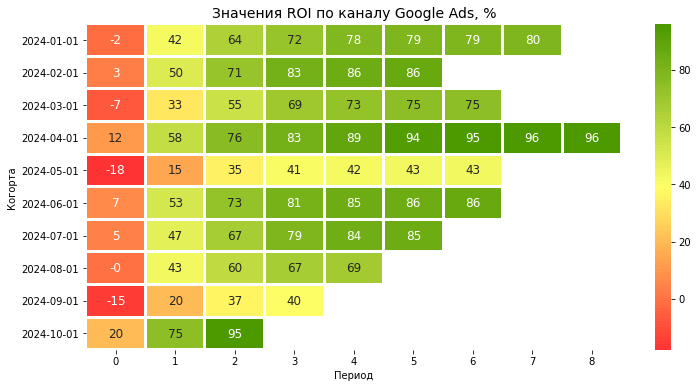

In [140]:
# Google Ads

cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)
ltv_df_2['cohort_month'] = ltv_df_2['cohort_month'].astype('str')


df_pivot = ltv_df_2[ltv_df_2['acq_channel']=='Google Ads'].pivot_table(index='cohort_month', 
                                                                       columns='n_period', values='ROI')

plt.figure(figsize=(12, 6))

sns.heatmap(df_pivot, cmap=cmap, annot=True, fmt='.0f', linewidths=2, annot_kws={"size": 12})

plt.title('Значения ROI по каналу Google Ads, %', fontsize=14)
plt.xlabel('Период')
plt.ylabel('Когорта')

plt.show()

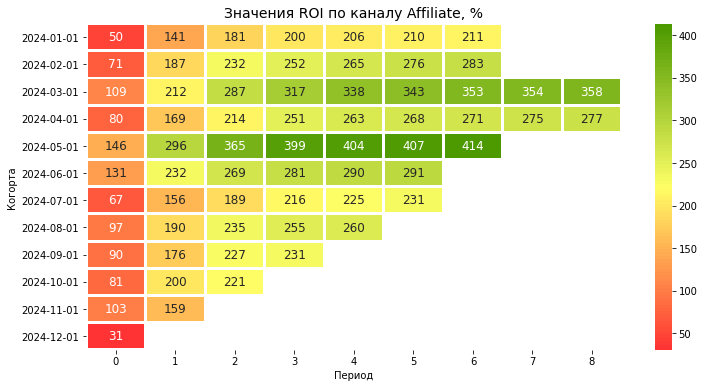

In [141]:
# Affiliate

cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)
ltv_df_2['cohort_month'] = ltv_df_2['cohort_month'].astype('str')


df_pivot = ltv_df_2[ltv_df_2['acq_channel']=='Affiliate'].pivot_table(index='cohort_month', 
                                                                       columns='n_period', values='ROI')

plt.figure(figsize=(12, 6))

sns.heatmap(df_pivot, cmap=cmap, annot=True, fmt='.0f', linewidths=2, annot_kws={"size": 12})

plt.title('Значения ROI по каналу Affiliate, %', fontsize=14)
plt.xlabel('Период')
plt.ylabel('Когорта')

plt.show()

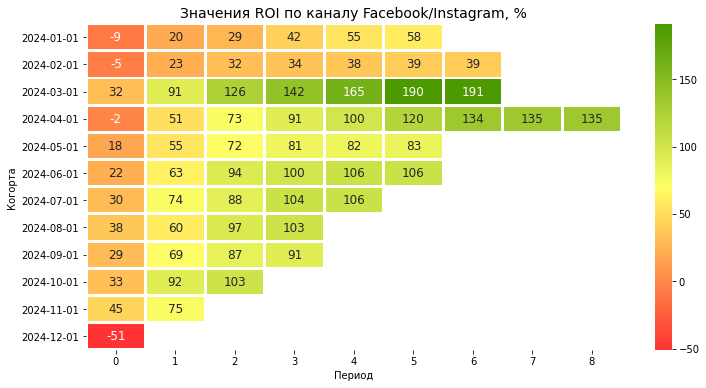

In [142]:
# Facebook/Instagram

cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)
ltv_df_2['cohort_month'] = ltv_df_2['cohort_month'].astype('str')


df_pivot = ltv_df_2[ltv_df_2['acq_channel']=='Facebook/Instagram'].pivot_table(index='cohort_month', 
                                                                       columns='n_period', values='ROI')

plt.figure(figsize=(12, 6))

sns.heatmap(df_pivot, cmap=cmap, annot=True, fmt='.0f', linewidths=2, annot_kws={"size": 12})

plt.title('Значения ROI по каналу Facebook/Instagram, %', fontsize=14)
plt.xlabel('Период')
plt.ylabel('Когорта')

plt.show()

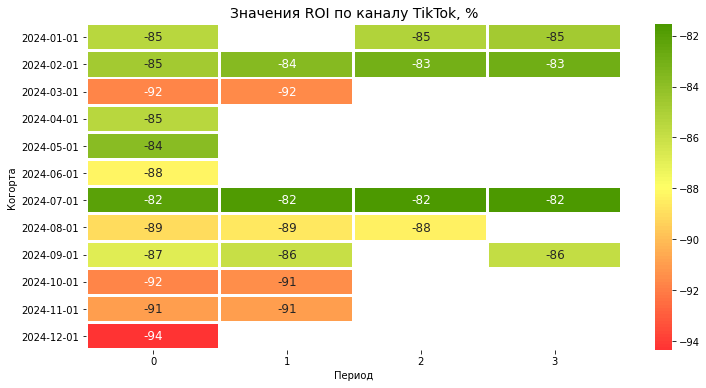

In [143]:
# TikTok

cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)
ltv_df_2['cohort_month'] = ltv_df_2['cohort_month'].astype('str')


df_pivot = ltv_df_2[ltv_df_2['acq_channel']=='TikTok'].pivot_table(index='cohort_month', 
                                                                       columns='n_period', values='ROI')

plt.figure(figsize=(12, 6))

sns.heatmap(df_pivot, cmap=cmap, annot=True, fmt='.0f', linewidths=2, annot_kws={"size": 12})

plt.title('Значения ROI по каналу TikTok, %', fontsize=14)
plt.xlabel('Период')
plt.ylabel('Когорта')

plt.show()

**Значений `'ROI'` по когортам месяца регистрации:**

У канала `'TikTok'` наблюдается множество пропусков, которые говорят о том, что пользователи с этого канала не становятся постоянными пользователями, а приобретают товары только периодически, наилучшие показатели наблюдаются у канала `'Affiliate'`, однако всё равно окупаемость не сохраняется.

## Выводы по этапу 4

**По ключевым и вспомогательным метрикам наблюдается следующая картина:**

 **1. Динамика привлечения новых пользователей:**
 
 - Наблюдается резкое увеличение количества новых пользователей у канала `'TikTok'`, резкое снижение количества новых пользователей у канала `'Google Ads'` в июле 2024 года. После 30 октрября 2024 года отсутствуют пользователи с канала `'Google Ads'`;
 - Отсутствие заметного роста у пользователей из городов Ростов-на-Дону, Новосибирск, Нижний Новгород, Краснодар, Екатеринбург.
 
**2. Динамика выручки:**
 
 - Наблюдается резкое снижение выручки по пользователям с канала `'Google Ads'` в июле 2024 года, а также сильное снижение  выручки по пользователям с канала `'Affiliate'`, но выручка по пользователям с канала `'TikTok'` показала небольшой рост;
 - Наблюдается наиболее резкое снижение выручки по пользователям из регона `'Другие регионы'`, `'Москва'` и `'Санкт-Петербург'` с июля 2024 года, у остальных регионов общая тенденция по снижению выручки с июля 2024 года не так ярко выражена.
 - Наблюдаются провалы выручки по пользователям с мобильными устройствами в феврале и июне 2024 года и общее резкое падение с июля 2024 года;
 - Расходы намного превышают выручку, особенно по каналу `'TikTok'`.
 
**3. Конверсия из регистрации в покупку:**
  
 - Наблюдается резкое увеличение конверсии у пользователей с канала `'Google Ads'` в сентябре 2024 года, у пользоватлей с  остальных каналов наблюдается небольшая положительная тенденция по увеличению конверсии, кроме как у пользователей с канала `'TikTok'` - конверсия осталась без изменений.
 
**4. Динамика среднего чека (`'AOV'`):**
 - Наблюдаются резкие скачки значений у пользователей с канала `'TikTok'` с общим негативным трендом, нестабильный рост с резкими скачками показывает метрика у пользователей с канала `'Email Marketing'`, размер среднего чека показывает рост до октбяря 2024 года у пользователей с канала `'Facebook/Instagram'`
 - Рост значений показывают пользователи, открывающие маркетплейс с компьютера, ухудшение метрики показывают пользователи мобильных устройств.
 
**5. Динамика среднего дохода на пользователя (`'ARPU'`):**
  
 - Наблюдается медленный рост до сентбяря 2024 года и резкий скачок значений у пользователей с канала `'Google Ads'` в октябре 2024 года, общая положительная тенденция наблюдается у всех каналов, кроме `'TikTok'` (значений остаются неизменными) и резкое падение у канала `'Facebook/Instagram'` в декабре 2024 года.


**Группируя наблюдения по метрикам по каналу привлечения можно выделить следующие аномалии:**

 - **Канал `'TikTok'`:** пользователи  показывают наихудшие результаты по удержанию (Retention Rate). Также есть проблемы с конверсией: в класической воронке - на шаге начало оформления заказа (58%) и окончание оформления заказа (40%), в воронке `'step-by-step'` - на шаге начало оформления заказа (68%) и окончание оформления заказа (68%). Наиболее убыточный канал - значения `'LTV'` находятся значительно ниже `'CAC'`, значения `'ROI'` находятся ниже нуля. У значений `'ROI'` по когортам месяца регистрации наблюдается множество пропусков, которые говорят о том, что пользователи с этого канала не становятся постоянными пользователями, а приобретают товары только периодически и также показывают убыточность.
 - **Канал `'Google Ads'`:**  показывается стабльный уровень ежемесячного  `'ROI'` на протяжении всего периода наблюдений. 
 - **Канал `'Affiliate'`:** негативная тенденция (пересечение точки окупаемости) по ежемесячным значениям `'LTV'` и `'CAC'` наблюдается в декабре 2024 года. Наилучшую прибыльность показывает по ежемесячным значениям `'ROI'`, но и там прослеживается спад в ноябре-декабре 2024 года. Наилучшие показатели наблюдаются у ежемесячного `'ROI'` по когортам месяца регистрации, однако всё равно окупаемость не сохраняется.
 - **Канал `'Facebook/Instagram'`:** негативная тенденция (пересечение точки окупаемости) по ежемесячным значениям `'LTV'` и `'CAC'` наблюдается  в декабре 2024 года.

### Гипотезы

**Гипотеза 1:**

Привлечение более вовлеченных пользователей с канала `'TikTok'` и стимулирование их покупок приведет к увеличению показателей прибыли.

**Гипотеза 2:**

Увеличение бюджета на привлечение новых пользователей с канала `'Google Ads'` приведет к увеличению показателей прибыли.

**Гипотеза 3:**

Усовершенствование пользовательского опыта взаимодействия на этапе оплаты с мобильной версией приложения увеличит выручку.

## 5. Подготовка эксперимента и подведение его результатов

Для улучшения конверсии в покупку было принято решение повысить вовлеченность пользователей, привлеченнных через канала TikTok. В качестве способа повышения вовлеченности было принято решение предоставлять приветственный бонус на первую покупку пользователям, привлеченным через данный канал.

**Цель эксперимента** - Проверить, влияет ли предоставление бонуса на первую покупку на конверсию и выручку среди пользователей TikTok.

 **Гипотеза:** Предоставление бонуса на первую покупку новым пользователям, привлеченным через TikTok, приведет к увеличению конверсии в первую покупку.

**Тип эксперимента:** Сплит-роллинг (rolling split)  
**Канал:** Только пользователи, пришедшие с TikTok  
**Группы:**  
  - **Контрольная (A):** пользователи TikTok без бонуса;  
  - **Тестовая (B):** пользователи TikTok с бонусом на первую покупку.
    
**Распределение:** Равномерное распределение новых пользователей TikTok между группами по дате регистрации  
**Период проведения:** 3 недели (фиксировано).

**Ключевая метрика:**

- *Конверсия в первую покупку* — доля пользователей, зарегистрировавшихся с TikTok и совершивших первую покупку  
  - *Цель:* увеличить конверсию с помощью бонуса  
  - *Критерий успеха:* статистически значимый рост конверсии в тестовой группе

**Вспомогательные метрики:**

- *ARPU* (средняя выручка на пользователя TikTok)  
- *ARPPU* (средняя выручка на покупателя TikTok)  
- *AOV* (средний чек TikTok)

**Барьерная метрика:**

- *Общая выручка от пользователей TikTok*

**Целевая аудитория:** только пользователи TikTok  
**Размеры групп:** определяются по фактическому трафику TikTok за период эксперимента  
**Комментарий:** запуск без предварительного расчёта мощности и MDE из-за срочности задачи

In [145]:
display(pa_diploma_AB_split_users.head())
display(pa_diploma_AB_split_users.info())

user_id      group
0    44965    control
1    44967    control
2    44968    control
3    44969  treatment
4    44970    control

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  2968 non-null   int64 
 1   group    2968 non-null   object
dtypes: int64(1), object(1)
memory usage: 46.5+ KB


None

In [146]:
display(pa_diploma_events_AB.head())
display(pa_diploma_events_AB.info())

event_id  session_id  user_id           event_date      event_type   os  \
0      3132         479      100  2024-01-01 15:23:56       page_view  iOS   
1      3133         479      100  2024-01-01 15:24:01    product_view  iOS   
2      3134         479      100  2024-01-01 15:24:10   product_click  iOS   
3      3135         479      100  2024-01-01 15:25:10     add_to_cart  iOS   
4      3136         479      100  2024-01-01 15:25:46  checkout_start  iOS   

   device  event_index user_segment          product_name  event_week  \
0  mobile            1      regular                   NaN  2024-01-01   
1  mobile            2      regular  Шорты для тренировок  2024-01-01   
2  mobile            3      regular        Куртка детская  2024-01-01   
3  mobile            4      regular  Балетки классические  2024-01-01   
4  mobile            5      regular                   NaN  2024-01-01   

  event_month  
0  2024-01-01  
1  2024-01-01  
2  2024-01-01  
3  2024-01-01  
4  2024-01-01

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831231 entries, 0 to 831230
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   event_id      831231 non-null  int64 
 1   session_id    831231 non-null  int64 
 2   user_id       831231 non-null  int64 
 3   event_date    831231 non-null  object
 4   event_type    831231 non-null  object
 5   os            831231 non-null  object
 6   device        831231 non-null  object
 7   event_index   831231 non-null  int64 
 8   user_segment  831231 non-null  object
 9   product_name  409054 non-null  object
 10  event_week    831231 non-null  object
 11  event_month   831231 non-null  object
dtypes: int64(4), object(8)
memory usage: 76.1+ MB


None

In [147]:
display(pa_diploma_orders_AB.head())
display(pa_diploma_orders_AB.info())

order_id  user_id               order_date       product_name  quantity  \
0         1        3  2024-01-19 01:52:52.000         Шуруповерт         2   
1         2        3  2024-01-19 01:52:52.000  Молоток слесарный         1   
2         3        3  2024-01-19 01:52:52.000    Секатор садовый         2   
3         4        3  2024-01-25 13:59:38.000         Шуруповерт         2   
4         5        3  2024-01-25 13:59:38.000         Чай черный         1   

   unit_price  total_price                    category_name  order_week  \
0    5,539.13    11,078.26  Инструменты и садовый инвентарь  2024-01-15   
1   11,340.38    11,340.38  Инструменты и садовый инвентарь  2024-01-15   
2   10,892.09    21,784.18  Инструменты и садовый инвентарь  2024-01-15   
3    5,539.13    11,078.26  Инструменты и садовый инвентарь  2024-01-22   
4    2,099.59     2,099.59                 Продукты питания  2024-01-22   

  order_month  
0  2024-01-01  
1  2024-01-01  
2  2024-01-01  
3  2024-01-01  
4  2024-01-01

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33280 entries, 0 to 33279
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       33280 non-null  int64  
 1   user_id        33280 non-null  int64  
 2   order_date     33280 non-null  object 
 3   product_name   33280 non-null  object 
 4   quantity       33280 non-null  int64  
 5   unit_price     33280 non-null  float64
 6   total_price    33280 non-null  float64
 7   category_name  33280 non-null  object 
 8   order_week     33280 non-null  object 
 9   order_month    33280 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.5+ MB


None

In [148]:
display(pa_diploma_users_AB.head())
display(pa_diploma_users_AB.info())

user_id    registration_date       os  age   device gender  \
0       18  2024-01-01 05:26:00  Android   49   mobile      M   
1       22  2024-01-01 17:13:00      iOS   50   tablet      M   
2       26  2024-01-01 21:15:00      iOS   60  desktop      F   
3       33  2024-01-01 14:43:00      iOS   31  desktop      M   
4       39  2024-01-01 01:13:00  Android   44   tablet      M   

            region  browser country acq_channel  campaign_id user_segment  \
0     Екатеринбург     Edge  Россия      TikTok        10.00       спящий   
1  Санкт-Петербург   Chrome  Россия      TikTok        43.00          VIP   
2           Москва  Firefox  Россия      TikTok        27.00     активный   
3     Екатеринбург  Firefox  Россия      TikTok        15.00      новичок   
4  Санкт-Петербург  Firefox  Россия      TikTok        15.00       спящий   

  buyer_segment cohort_week cohort_month  
0      one_time  2024-01-01   2024-01-01  
1      one_time  2024-01-01   2024-01-01  
2          rare  2024-01-01   2024-01-01  
3          rare  2024-01-01   2024-01-01  
4          rare  2024-01-01   2024-01-01

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22196 entries, 0 to 22195
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            22196 non-null  int64  
 1   registration_date  22196 non-null  object 
 2   os                 22196 non-null  object 
 3   age                22196 non-null  int64  
 4   device             22196 non-null  object 
 5   gender             22196 non-null  object 
 6   region             22196 non-null  object 
 7   browser            22196 non-null  object 
 8   country            22196 non-null  object 
 9   acq_channel        22196 non-null  object 
 10  campaign_id        22196 non-null  float64
 11  user_segment       22196 non-null  object 
 12  buyer_segment      22196 non-null  object 
 13  cohort_week        22196 non-null  object 
 14  cohort_month       22196 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 2.5+ MB


None

In [149]:
display(pa_diploma_sessions_AB.head())
display(pa_diploma_sessions_AB.info())

session_id  user_id            session_start       os  device  region  \
0         705      160  2024-01-12 02:30:37.000  Windows  mobile  Москва   
1         706      160  2024-01-10 06:04:41.000  Windows  mobile  Москва   
2         707      160  2024-01-23 03:31:16.000  Windows  mobile  Москва   
3         708      160  2024-01-18 13:43:45.000  Windows  mobile  Москва   
4         709      160  2024-01-21 01:09:58.000  Windows  mobile  Москва   

  browser country entry_path     path_start utm_source screen_size  \
0  Safari  Россия      /home  /recommend/10    unknown    768x1024   
1  Safari  Россия      /home        /sale/2    unknown     375x667   
2  Safari  Россия  /checkout      /click/20    unknown    768x1024   
3  Safari  Россия  /category   /campaign/20    unknown    768x1024   
4  Safari  Россия     /promo        /sale/3    unknown    1366x768   

   scroll_depth user_segment  utm_campaign_id session_week session_month  
0            51      regular            14.00   2024-01-08    2024-01-01  
1            71      regular            14.00   2024-01-08    2024-01-01  
2            84      regular            14.00   2024-01-22    2024-01-01  
3            20      regular            14.00   2024-01-15    2024-01-01  
4            88      regular            14.00   2024-01-15    2024-01-01

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127407 entries, 0 to 127406
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   session_id       127407 non-null  int64  
 1   user_id          127407 non-null  int64  
 2   session_start    127407 non-null  object 
 3   os               127407 non-null  object 
 4   device           127407 non-null  object 
 5   region           127407 non-null  object 
 6   browser          127407 non-null  object 
 7   country          127407 non-null  object 
 8   entry_path       127407 non-null  object 
 9   path_start       127407 non-null  object 
 10  utm_source       127407 non-null  object 
 11  screen_size      127407 non-null  object 
 12  scroll_depth     127407 non-null  int64  
 13  user_segment     127407 non-null  object 
 14  utm_campaign_id  127079 non-null  float64
 15  session_week     127407 non-null  object 
 16  session_month    127407 non-null  obje

None

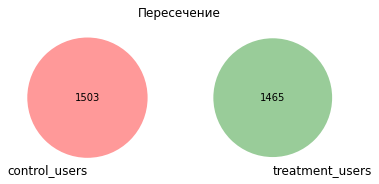

In [150]:
control_users = set(pa_diploma_AB_split_users[pa_diploma_AB_split_users['group']=='control']['user_id'].unique())
treatment_users = set(pa_diploma_AB_split_users[pa_diploma_AB_split_users['group']=='treatment']['user_id'].unique())

# Строим диаграмму Венна для проверки пересечения пользователей
venn2([control_users, treatment_users], set_labels=('control_users', 'treatment_users'))

plt.title("Пересечение")
plt.show()

In [151]:
print(pa_diploma_users_AB['registration_date'].agg(['min','max']))

min    2024-01-01 01:13:00
max    2025-01-26 23:41:00
Name: registration_date, dtype: object


In [152]:
pa_diploma_users_AB_merge = pa_diploma_users_AB.merge(pa_diploma_AB_split_users, on='user_id', how='inner')

pa_diploma_orders_AB_merge = pa_diploma_orders_AB.merge(pa_diploma_users_AB[['user_id',
                                 'cohort_week', 'registration_date']], on='user_id', how='inner')
pa_diploma_orders_AB_merge = pa_diploma_orders_AB_merge.merge(pa_diploma_AB_split_users, on='user_id', how='inner')
pa_diploma_orders_AB_merge['revenue'] = pa_diploma_orders_AB_merge['total_price']*0.05

**Нулевая гипотеза (Н0):** 

Конверсия из регистрации в заказ в контрольной группе будет одинаковая с конверсией в тестовой группе.

**Альтернативная гипотеза (Н1):** 

Конверсия из регистрации в заказ в тестовой группе будет выше чем в контрольной группе и эта разница будет статистически значима.

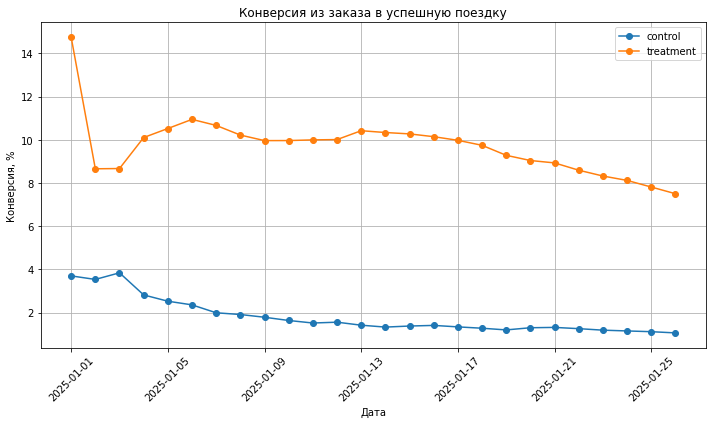

In [153]:
pa_diploma_users_AB_merge['registration_date'] = pd.to_datetime(pa_diploma_users_AB_merge['registration_date'])
pa_diploma_orders_AB_merge['registration_date'] = pd.to_datetime(pa_diploma_orders_AB_merge['registration_date'])

records = []

date_list = pd.to_datetime(pa_diploma_users_AB_merge['registration_date']).dt.date.unique()
date_list.sort()

for current_date in date_list:
   current_date = pd.to_datetime(current_date).date()
   registrations_to_date = pa_diploma_users_AB_merge[pa_diploma_users_AB_merge['registration_date'].dt.date <= current_date]
   orders_to_date = pa_diploma_orders_AB_merge[pa_diploma_orders_AB_merge['registration_date'].dt.date <= current_date]
    
   total_registrations_by_group = registrations_to_date.groupby('group')['user_id'].nunique().reset_index(name='total_registrations')
   
   orders_by_group = orders_to_date.groupby('group')['user_id'].nunique().reset_index(name='total_orders')

   df_merged_orders = pd.merge(total_registrations_by_group, orders_by_group, on='group', how='inner')
   df_merged_orders['conversion'] = 100*df_merged_orders['total_orders']/df_merged_orders['total_registrations']

   df_merged_orders['date'] = current_date
   records.append(df_merged_orders)

conversion_df = pd.concat(records)

plt.figure(figsize=(10, 6))
for group in conversion_df['group'].unique():
   group_data = conversion_df[conversion_df['group']==group]
   plt.plot( group_data['date'],group_data['conversion']  , marker='o', label=group)
plt.title('Конверсия из регистрации в заказ')
plt.xlabel('Дата')
plt.ylabel('Конверсия, %')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [154]:
reg =pa_diploma_users_AB_merge.groupby('group')['user_id'].nunique()
f1  = pa_diploma_orders_AB_merge.groupby('group')['user_id'].nunique()

rates = (f1 / reg * 100).round(2)

count = [ f1['control'], f1['treatment'] ]
nobs  = [ reg['control'], reg['treatment'] ]
_, pval = proportions_ztest(count, nobs, alternative='two-sided')

abs_lift = rates['treatment'] - rates['control']
rel_lift = (rates['treatment'] / rates['control'] - 1) * 100

results_df = pd.DataFrame([{
   'Group A':                'control',
   'Group B':                'treatment',
   'p-value':                 round(pval,4),
   'CR_to_purchase_%_A':  rates['control'],
   'CR_to_purchase_%_B': rates['treatment'],
   'Absolute Lift (%)':      round(abs_lift,2),
   'Relative Lift (%)':      round(rel_lift,1)
}])

display(results_df)
print(f"Различие статистически значимо: {pval<0.05}")

Group A    Group B  p-value  CR_to_purchase_%_A  CR_to_purchase_%_B  \
0  control  treatment     0.00                1.06                7.51   

   Absolute Lift (%)  Relative Lift (%)  
0               6.45             608.50

Различие статистически значимо: True


**Нулевая гипотеза (Н0):** 

Средняя выручка на пользователя с канала ТикТок в контрольной группе будет одинакового размера с выручкой в тестовой группе.

**Альтернативная гипотеза (Н1):** 

редняя выручка на пользователя с канала ТикТок в тестовой группе будет выше, чем выручка в контрольной группе и эта разница будет статистически значима.

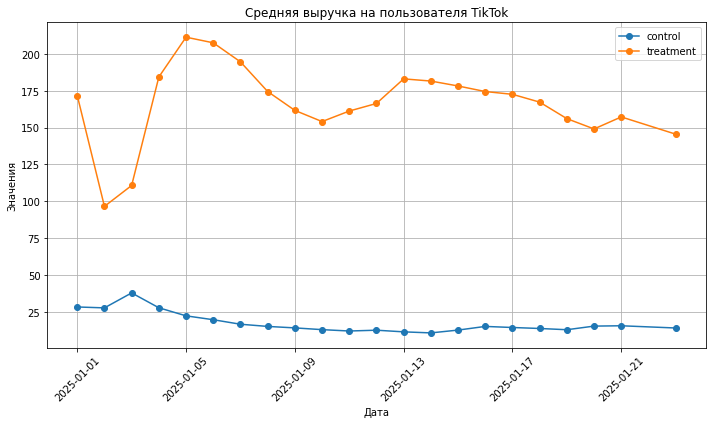

In [155]:
pa_diploma_users_AB_merge['registration_date'] = pd.to_datetime(pa_diploma_users_AB_merge['registration_date'])
pa_diploma_orders_AB_merge['registration_date'] = pd.to_datetime(pa_diploma_orders_AB_merge['registration_date'])

records = []

date_list = pd.to_datetime(pa_diploma_orders_AB_merge['registration_date']).dt.date.unique()
date_list.sort()

for current_date in date_list:
   current_date = pd.to_datetime(current_date).date()
   revenue_to_date = pa_diploma_orders_AB_merge[pa_diploma_orders_AB_merge['registration_date'].dt.date <= current_date]
   users_to_date = pa_diploma_users_AB_merge[pa_diploma_users_AB_merge['registration_date'].dt.date <= current_date]
    
   total_revenue_by_group = revenue_to_date.groupby('group')['revenue'].sum().reset_index(name='total_revenue')
   
   users_by_group = users_to_date.groupby('group')['user_id'].nunique().reset_index(name='total_users')

   df_merged_revenue = pd.merge(total_revenue_by_group, users_by_group, on='group', how='inner')
   df_merged_revenue['ARPU'] = df_merged_revenue['total_revenue']/df_merged_revenue['total_users']

   df_merged_revenue['date'] = current_date
   records.append(df_merged_revenue)

conversion_df = pd.concat(records)

plt.figure(figsize=(10, 6))
for group in conversion_df['group'].unique():
   group_data = conversion_df[conversion_df['group']==group]
   plt.plot( group_data['date'],group_data['ARPU']  , marker='o', label=group)
plt.title('Средняя выручка на пользователя TikTok')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [156]:
rev_per_user = pa_diploma_orders_AB_merge.groupby('user_id')['revenue'].sum().rename('revenue')
per_user = pa_diploma_users_AB_merge.merge(rev_per_user, left_on='user_id', right_index=True, how='left')
per_user['revenue'] = per_user['revenue'].fillna(0)

groups = sorted(per_user['group'].unique())

group_data = {g: per_user.loc[per_user['group'] == g, 'revenue'].astype(float) for g in groups}

results = []

for i in range(len(groups)):
   for j in range(i + 1, len(groups)):
        g1, g2 = groups[i], groups[j]
        a = group_data[g1]
        b = group_data[g2]

        mean1 = a.mean()          
        mean2 = b.mean()          
        abs_lift = mean2 - mean1
        rel_lift = (mean2/mean1 - 1) * 100

        _, p_value = ttest_ind(a, b, equal_var=False)

        results.append({
           'Group A': g1,
           'Group B': g2,
           'p-value': p_value,
           'Mean A': mean1,
           'Mean B': mean2,
           'Absolute Lift': abs_lift,
           'Relative Lift (%)': rel_lift
       })

results_df = pd.DataFrame(results)

display(results_df)
print(f"Различие статистически значимо: {pval<0.05}")

Group A    Group B  p-value  Mean A  Mean B  Absolute Lift  \
0  control  treatment     0.00   12.59  131.25         118.66   

   Relative Lift (%)  
0             942.71

Различие статистически значимо: True


**Нулевая гипотеза (Н0):** 

Средняя выручка на покупателя с канала ТикТок в контрольной группе будет одинакового размера с выручкой в тестовой группе.

**Альтернативная гипотеза (Н1):** 

редняя выручка на покупателя с канала ТикТок в тестовой группе будет выше, чем выручка в контрольной группе и эта разница будет статистически значима.

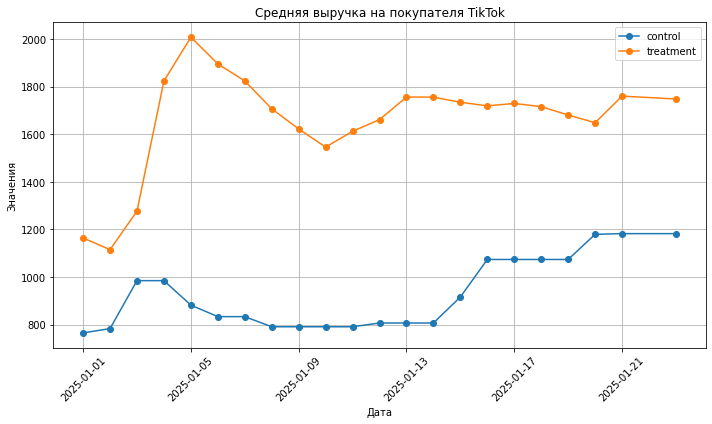

In [157]:
records = []

date_list = pd.to_datetime(pa_diploma_orders_AB_merge['registration_date']).dt.date.unique()
date_list.sort()

for current_date in date_list:
   current_date = pd.to_datetime(current_date).date()
   revenue_to_date = pa_diploma_orders_AB_merge[pa_diploma_orders_AB_merge['registration_date'].dt.date <= current_date]
   buyers_to_date = pa_diploma_orders_AB_merge[pa_diploma_orders_AB_merge['registration_date'].dt.date <= current_date]
    
   total_revenue_by_group = revenue_to_date.groupby('group')['revenue'].sum().reset_index(name='total_revenue')
   
   users_by_group = buyers_to_date.groupby('group')['user_id'].nunique().reset_index(name='total_buyers')

   df_merged_revenue = pd.merge(total_revenue_by_group, users_by_group, on='group', how='inner')
   df_merged_revenue['ARPPU'] = df_merged_revenue['total_revenue']/df_merged_revenue['total_buyers']

   df_merged_revenue['date'] = current_date
   records.append(df_merged_revenue)

conversion_df = pd.concat(records)

plt.figure(figsize=(10, 6))
for group in conversion_df['group'].unique():
   group_data = conversion_df[conversion_df['group']==group]
   plt.plot( group_data['date'],group_data['ARPPU']  , marker='o', label=group)
plt.title('Средняя выручка на покупателя TikTok')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [158]:
groups = sorted(conversion_df['group'].unique())

group_data = {g: conversion_df.loc[conversion_df['group'] == g, 'ARPPU'].astype(float) for g in groups}

results = []

for i in range(len(groups)):
   for j in range(i + 1, len(groups)):
        g1, g2 = groups[i], groups[j]
        a = group_data[g1]
        b = group_data[g2]

        mean1 = a.mean()          
        mean2 = b.mean()          
        abs_lift = mean2 - mean1
        rel_lift = (mean2/mean1 - 1) * 100

        _, p_value = ttest_ind(a, b, equal_var=False)

        results.append({
           'Group A': g1,
           'Group B': g2,
           'p-value': p_value,
           'Mean A': mean1,
           'Mean B': mean2,
           'Absolute Lift': abs_lift,
           'Relative Lift (%)': rel_lift
       })

results_df = pd.DataFrame(results)

display(results_df)
print(f"Различие статистически значимо: {p_value<0.05}")

Group A    Group B  p-value  Mean A   Mean B  Absolute Lift  \
0  control  treatment     0.00  927.75 1,659.27         731.52   

   Relative Lift (%)  
0              78.85

Различие статистически значимо: True


**Нулевая гипотеза (Н0):** 

Средний чек в контрольной группе будет одинакового размера со средним чеком в тестовой группе.

**Альтернативная гипотеза (Н1):** 

Средний чек в тестовой группе будет выше размера среднего чека в контрольной группе и эта разница будет статистически значима.

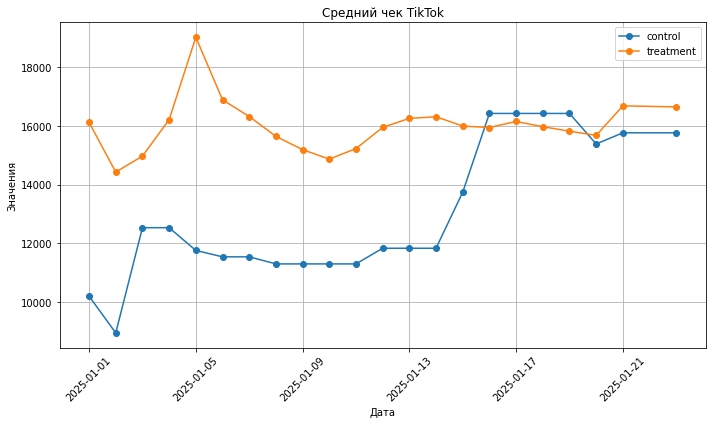

In [159]:
records = []

date_list = pd.to_datetime(pa_diploma_orders_AB_merge['registration_date']).dt.date.unique()
date_list.sort()

for current_date in date_list:
   current_date = pd.to_datetime(current_date).date()
   aov_to_date = pa_diploma_orders_AB_merge[pa_diploma_orders_AB_merge['registration_date'].dt.date <= current_date]
   orders_to_date = pa_diploma_orders_AB_merge[pa_diploma_orders_AB_merge['registration_date'].dt.date <= current_date]
    
   aov_by_group = aov_to_date.groupby('group')['total_price'].sum().reset_index(name='total_price')
   
   orders_by_group = orders_to_date.groupby('group')['order_id'].nunique().reset_index(name='total_orders')

   df_merged_revenue = pd.merge(aov_by_group, orders_by_group, on='group', how='inner')
   df_merged_revenue['AOV'] = df_merged_revenue['total_price']/df_merged_revenue['total_orders']

   df_merged_revenue['date'] = current_date
   records.append(df_merged_revenue)

conversion_df = pd.concat(records)

plt.figure(figsize=(10, 6))
for group in conversion_df['group'].unique():
   group_data = conversion_df[conversion_df['group']==group]
   plt.plot( group_data['date'],group_data['AOV']  , marker='o', label=group)
plt.title('Cредний чек TikTok')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [160]:
groups = sorted(conversion_df['group'].unique())

group_data = {g: conversion_df.loc[conversion_df['group'] == g, 'AOV'].astype(float) for g in groups}

results = []

for i in range(len(groups)):
   for j in range(i + 1, len(groups)):
        g1, g2 = groups[i], groups[j]
        a = group_data[g1]
        b = group_data[g2]

        mean1 = a.mean()          
        mean2 = b.mean()          
        abs_lift = mean2 - mean1
        rel_lift = (mean2/mean1 - 1) * 100

        _, p_value = ttest_ind(a, b, equal_var=False)

        results.append({
           'Group A': g1,
           'Group B': g2,
           'p-value': p_value,
           'Mean A': mean1,
           'Mean B': mean2,
           'Absolute Lift': abs_lift,
           'Relative Lift (%)': rel_lift
       })

results_df = pd.DataFrame(results)

display(results_df)
print(f"Различие статистически значимо: {p_value<0.05}")

Group A    Group B  p-value    Mean A    Mean B  Absolute Lift  \
0  control  treatment     0.00 13,007.24 16,014.04       3,006.81   

   Relative Lift (%)  
0              23.12

Различие статистически значимо: True


**Нулевая гипотеза (Н0):** 

Общая выручка с пользователей в контрольной группе будет одинакового размера с общей выручкой в тестовой группе.

**Альтернативная гипотеза (Н1):** 

Общая выручка в тестовой группе будет выше общей выручки в контрольной группе и эта разница будет статистически значима.

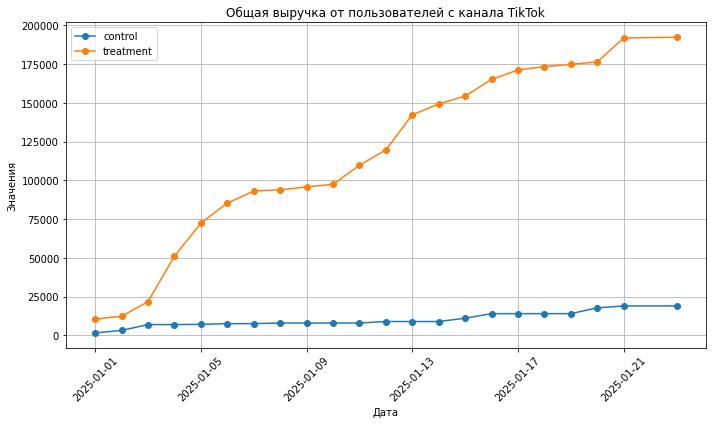

In [161]:
records = []

date_list = pd.to_datetime(pa_diploma_orders_AB_merge['registration_date']).dt.date.unique()
date_list.sort()

for current_date in date_list:
   current_date = pd.to_datetime(current_date).date()
   revenue_to_date = pa_diploma_orders_AB_merge[pa_diploma_orders_AB_merge['registration_date'].dt.date <= current_date]
    
   revenue_by_group = revenue_to_date.groupby('group')['revenue'].sum().reset_index(name='total_revenue')
   revenue_by_group['date'] = current_date
   records.append(revenue_by_group)

conversion_df = pd.concat(records)

plt.figure(figsize=(10, 6))
for group in conversion_df['group'].unique():
   group_data = conversion_df[conversion_df['group']==group]
   plt.plot( group_data['date'],group_data['total_revenue']  , marker='o', label=group)
plt.title('Общая выручка от пользователей с канала TikTok')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [162]:
groups = sorted(conversion_df['group'].unique())
group_data = {
    group: conversion_df[conversion_df['group'] == group]['total_revenue']
    for group in groups
}

# Анализ
results = []
for i in range(len(groups)):
    for j in range(i + 1, len(groups)):
        group1 = groups[i]
        group2 = groups[j]

        mean1 = group_data[group1].mean()
        mean2 = group_data[group2].mean()
        absolute_lift = mean2 - mean1
        relative_lift = (mean2 / mean1 - 1) * 100

        _, p_value = ttest_ind(group_data[group1], group_data[group2], equal_var=False)

        results.append({
            'Group A': group1,
            'Group B': group2,
            'p-value': p_value,
            'Mean A': mean1,
            'Mean B': mean2,
            'Absolute Lift': absolute_lift,
            'Relative Lift (%)': relative_lift
        })

results_df = pd.DataFrame(results)

display(results_df)
print(f"Различие статистически значимо: {pval<0.05}")

Group A    Group B  p-value    Mean A     Mean B  Absolute Lift  \
0  control  treatment     0.00 10,053.02 116,048.62     105,995.60   

   Relative Lift (%)  
0           1,054.37

Различие статистически значимо: True


## Выводы по этапу 5

**Ключевая метрика:**

- Тест показал статистически значимый рост конверсии в тестовой группе после введения фичи с бонусом. **Вывод:** цель достигнута.

**Вспомогательные метрики:**

- *ARPU* (средняя выручка на пользователя TikTok) - есть статистически значимый рост выручки в тестовой группе.  
- *ARPPU* (средняя выручка на покупателя TikTok) - есть статистически значимый рост выручки в тестовой группе. 
- *AOV* (средний чек TikTok) - несмотря на статистически значимый рост средних значений среднего чека в тестовой группе, в последнюю неделю наблюдается сближение значений по тестовой и контрольной группам, что может говорить о том, что влияние фичи в долгосрочной перспективе будет снижатся по данной метрике.

**Вывод:** цель достигнута, но стоит уделить дополнительное внимание (мониторить) метрику по среднему чеку.

**Барьерная метрика:**

- *Общая выручка от пользователей TikTok* - есть статистически значимый рост выручки в тестовой группе. 

**Вывод:** цель не ухудшает показатели барьерной метрики, можно внедрять фичу.

**Проблемы эксперимента:**

1. В анализ не попадают метрики, которые оценивают прямую вовлеченность пользователей с канала, в качестве дополнительной барьерной метрики стоило рассмотреть `'Retention Rate'`, а также в качестве вспомогательных метрик посмотреть значения коэффициента `'Stickiness'`.
2. Также не была учтена сезонность бизнеса - янверь не лучшее время для проведения оценки вовлеченности покупателей, т.к. поведение пользователей в новогодние праздники может отличатся от поведения в другие периоды. Это косвено подтверждается постепенным снижением разницы в значениях у ключевой метрики (конверсия в заказ) и вспомогательных метрик (средная выручка на пользователя, средняя выручка на покупателя, средний чек).
3. Слишком короткий период проведения эксперимента - согласно историческим данным, пользователю требовалось около 2 недель на совершение первой покупки и в эксперименте участвовали пользователи, у которых не было данного окна.

**Рекомендации:**

Внедрение фичи не ухудшило пользовательский опыт, однако стоит внимательно мониторить изменение всех метрик после внедрения фичи, чтобы не пропустить момент, если фича перестанет показывать ожидаемый результат.